# Bulldozers Price Prediction Project using Machine Learning

## 1. Problem Definition
> How well can we predict the future sale price of bylldozers, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the KAggle Bluebook for Bulldozers competition:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

There are 3 mean datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean square log error) between the actual and predicted auction prices.

For more on the evaluation of this prokect check:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

Note: the goal for most regression evaluation metrics is to minimize the error. Our goal here will be to build a machine learning model that minimizes RMSLE.

## 4. Features

Kaggle provides a data dictionary of all the features for the dataset.  It is called Data Dictionary.xlsx

## Import Tools

In [176]:
# import visualizing and plotting tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning tools
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, learning_curve, validation_curve
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

## Data exploration (exploratory data analysis, EDA)

The goal here is to find out more about the data and become a subject metter expert on the dataset you are working with

1. What questions are we trying to solve?
2. What kind of data do we have?
3. What is missing from the data how do you deal with it?
4. Where are the outliers? Do we care?
5. How can you add, change, or remove features to get more out of the data?

### Opening data and exploring

In [2]:
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False) # do not minimize space in RAM
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
dic = pd.read_excel("bluebook-for-bulldozers/Data Dictionary.xlsx")
dic.head()

c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Variable,Description,Unnamed: 2
0,SalesID,unique identifier of a particular sale of a ...,NaN
1,MachineID,identifier for a particular machine; machin...,NaN
2,ModelID,identifier for a unique machine model (i.e. ...,NaN
3,datasource,source of the sale record; some sources are...,NaN
4,auctioneerID,"identifier of a particular auctioneer, i.e. ...",NaN


In [5]:
df_appendix = pd.read_csv("bluebook-for-bulldozers/Machine_Appendix.csv")
df_appendix.head()

,MachineID,ModelID,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,fiProductClassDesc,ProductGroup,ProductGroupDesc,MfgYear,fiManufacturerID,fiManufacturerDesc,PrimarySizeBasis,PrimaryLower,PrimaryUpper
0,113,1355,350L,350,NaN,NaN,L,"Hydraulic Excavator, Track - 50.0 to 66.0 Metr...",TEX,Track Excavators,1994.0,26,Caterpillar,Weight - Metric Tons,50.0,66.0
1,434,3538,416C,416,C,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,BL,Backhoe Loaders,1997.0,26,Caterpillar,Standard Digging Depth - Ft,14.0,15.0
2,534,3538,416C,416,C,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,BL,Backhoe Loaders,1998.0,26,Caterpillar,Standard Digging Depth - Ft,14.0,15.0
3,718,3538,416C,416,C,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,BL,Backhoe Loaders,2000.0,26,Caterpillar,Standard Digging Depth - Ft,14.0,15.0
4,1753,1580,D5GLGP,D5,G,NaN,LGP,"Track Type Tractor, Dozer - 85.0 to 105.0 Hors...",TTT,Track Type Tractors,2006.0,26,Caterpillar,Horsepower,85.0,105.0


In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

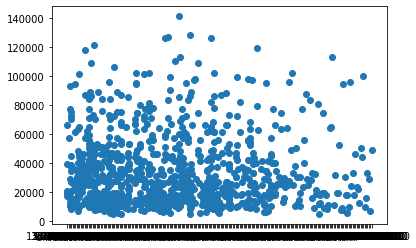

In [7]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [8]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

<AxesSubplot:ylabel='Frequency'>

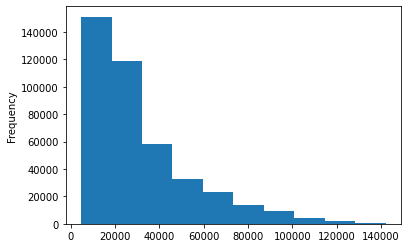

In [9]:
df.SalePrice.plot.hist()
# most prices are below 20000 dollars

In [10]:
df.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
saledate                     object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter


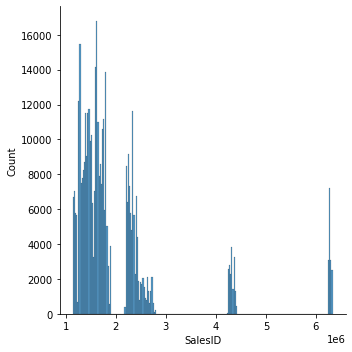

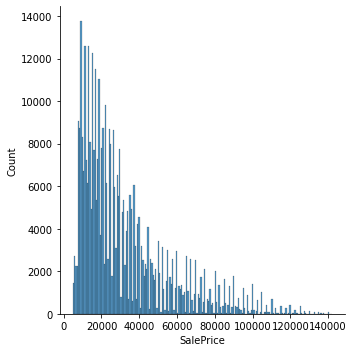

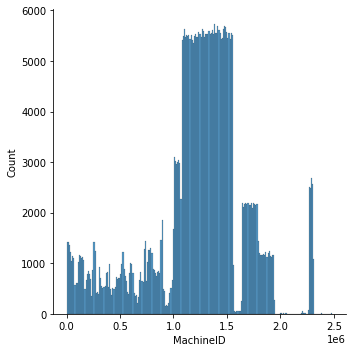

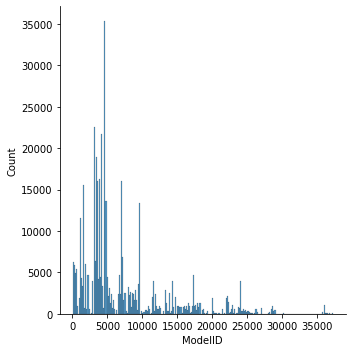

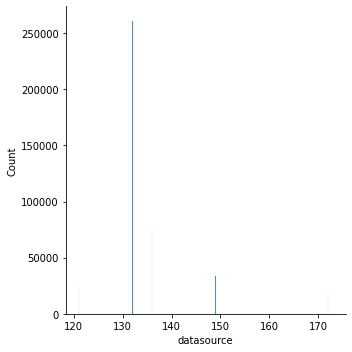

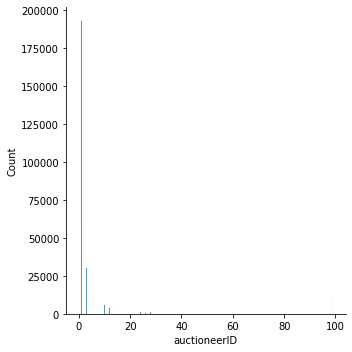

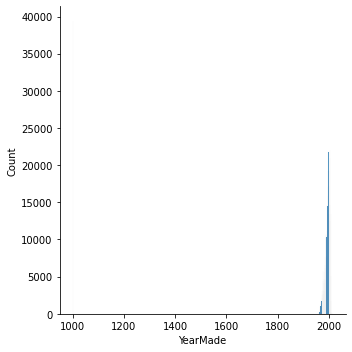

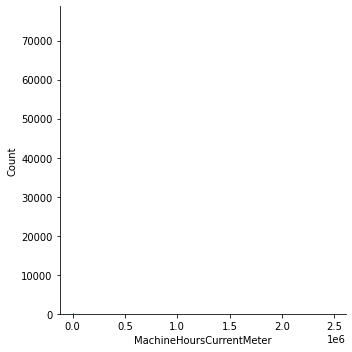

In [11]:
# Plotting everything in function of their counts (distribution)
for col in df.select_dtypes(np.number):
    print(col)
    sns.displot(df[col])   

SalesID


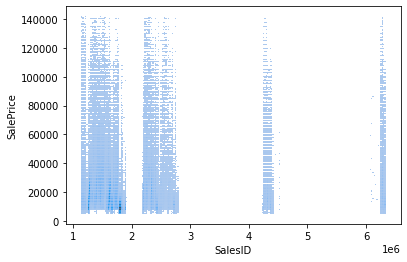

SalePrice


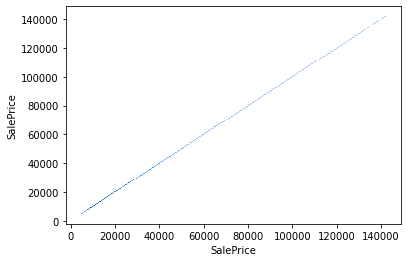

MachineID


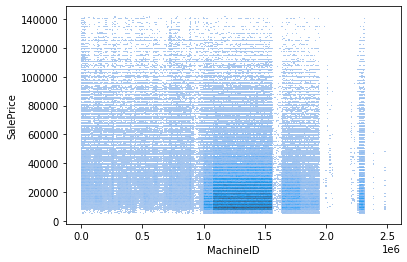

ModelID


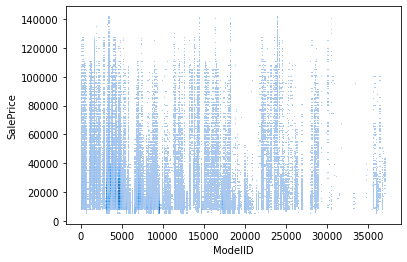

datasource


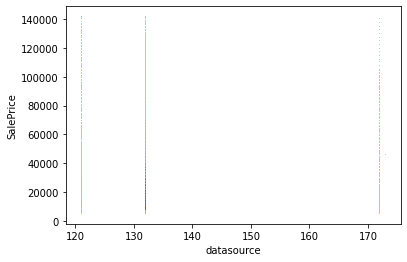

auctioneerID


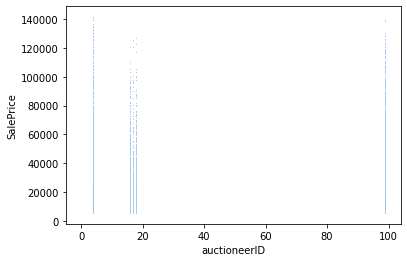

YearMade


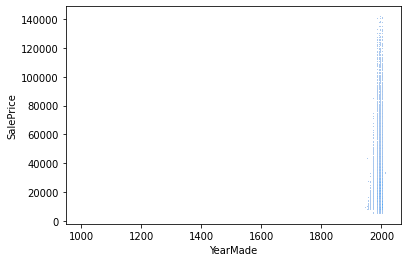

MachineHoursCurrentMeter


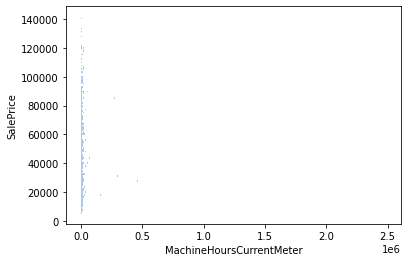

In [12]:
# Plotting everything in function of target
for col in df.select_dtypes(np.number):
    print(col)
    sns.histplot(data=df, x=df[col], y=df.SalePrice)  
    plt.show()

In [ ]:
# sns.pairplot(df, hue="SalePrice")

### Parsing dates

When worling with time series data, we want to enrich the time and date component as much as possible.

We can do it using `parse_dates` of Pandas.

In [13]:
df.saledate.dtype

dtype('O')

In [14]:
# Import data again but this time using parse_dates
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
            low_memory=False, 
            parse_dates=["saledate"])

In [15]:
df.saledate.dtype

dtype('<M8[ns]')

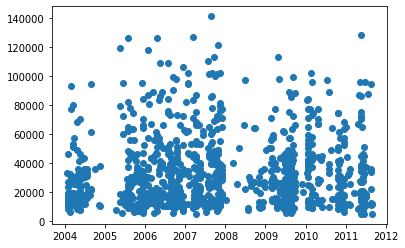

In [16]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [17]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [19]:
df.saledate.head(20)
# would be easier if it was in order

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series data, it is a good idea to sort it by date.

In [20]:
# Put it in order of date
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20) 
# now in order, on the left, the row index

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

When manipulating the data, we can always go back to the original

In [21]:
# Make a copy
df_tmp = df.copy()

### Add datetime parameters for `saledate`column

In [22]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.day_of_week
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.day_of_year

In [23]:
df_tmp.saledate.dt.day

205615    17
274835    31
141296    31
212552    31
62755     31
          ..
410879    28
412476    28
411927    28
407124    28
409203    28
Name: saledate, Length: 412698, dtype: int64

In [24]:
df_tmp.saledate.dt.year

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saledate, Length: 412698, dtype: int64

In [25]:
df_tmp.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [26]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [27]:
# we dont need saledate anymore
df_tmp.drop("saledate", axis=1, inplace=True)

In [28]:
# Check the values of different columns
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [29]:
df_tmp.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleDay', 'saleDayOfWeek', 'saleDayOfYear'],
      dtype

SalesID


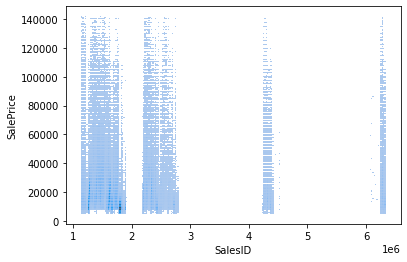

SalePrice


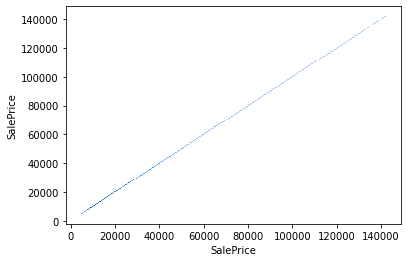

MachineID


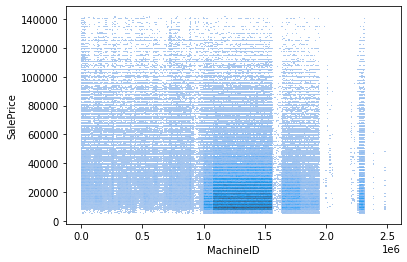

ModelID


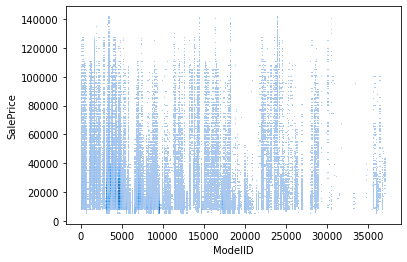

datasource


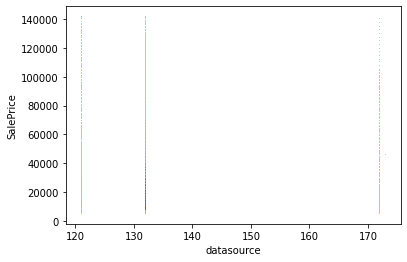

auctioneerID


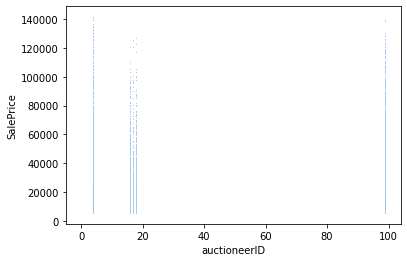

YearMade


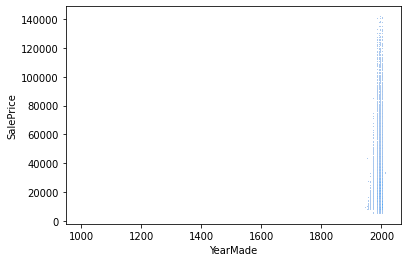

MachineHoursCurrentMeter


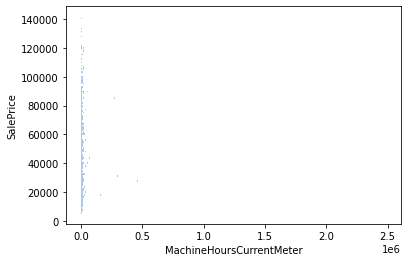

UsageBand


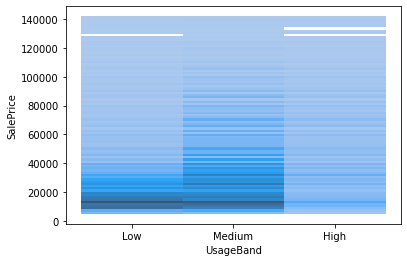

fiModelDesc


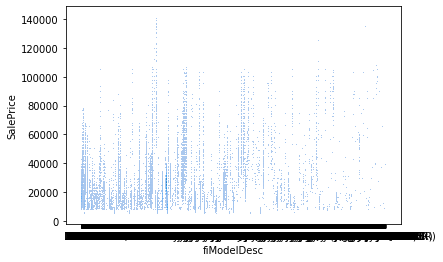

fiBaseModel


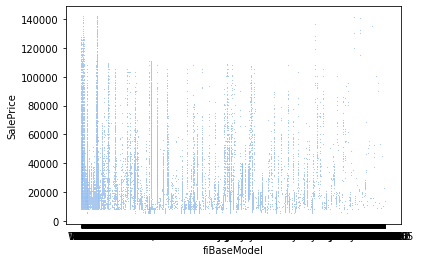

fiSecondaryDesc


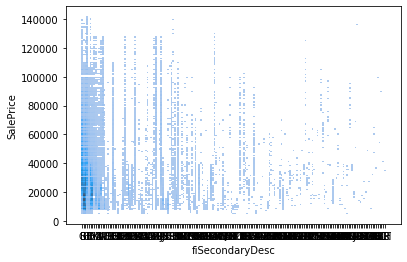

fiModelSeries


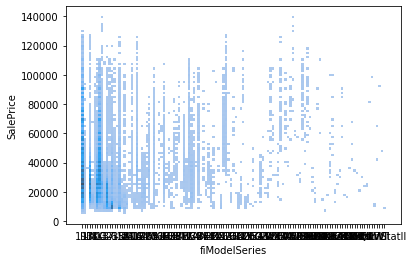

fiModelDescriptor


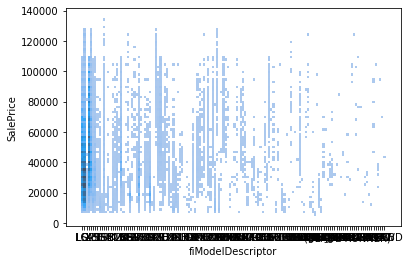

ProductSize


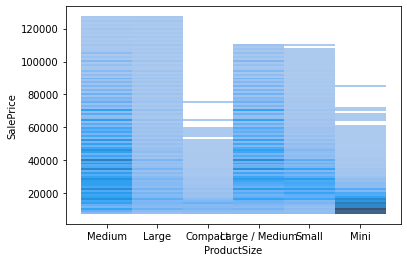

fiProductClassDesc


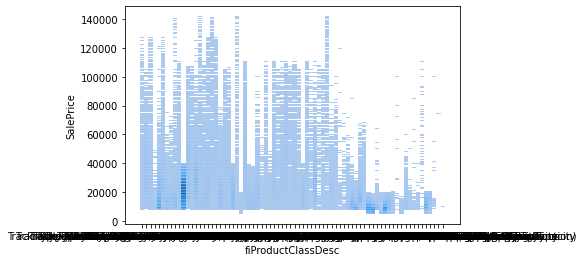

state


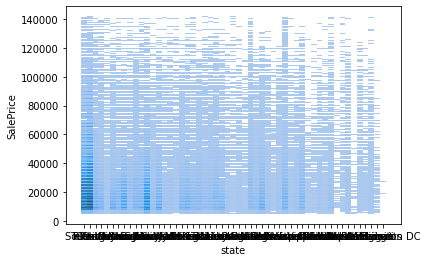

ProductGroup


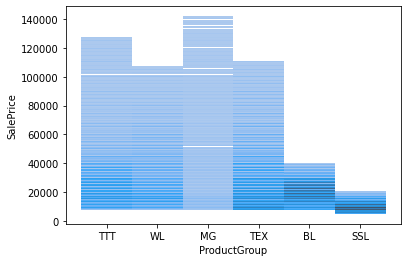

ProductGroupDesc


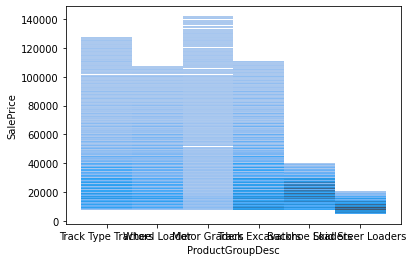

Drive_System


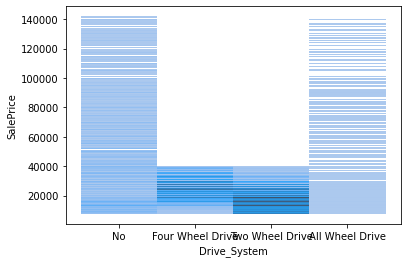

Enclosure


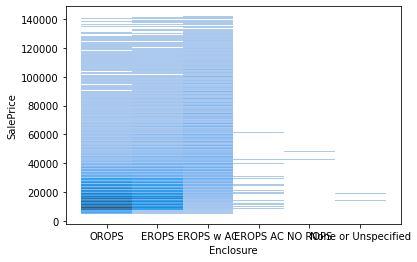

Forks


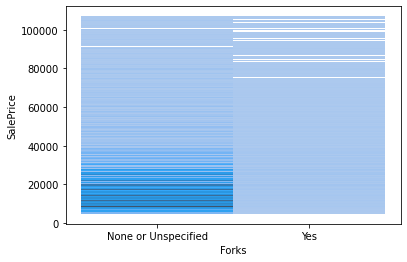

Pad_Type


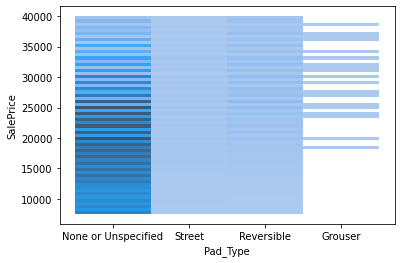

Ride_Control


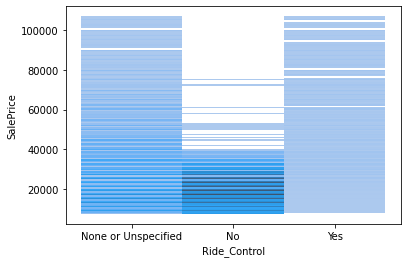

Stick


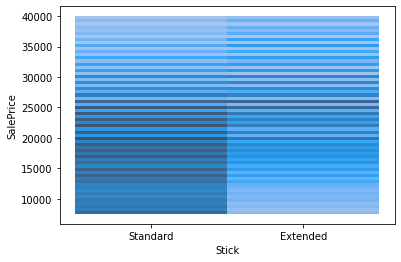

Transmission


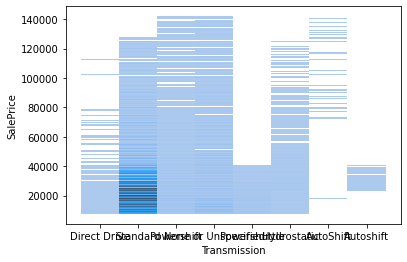

Turbocharged


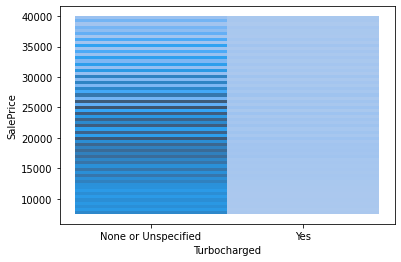

Blade_Extension


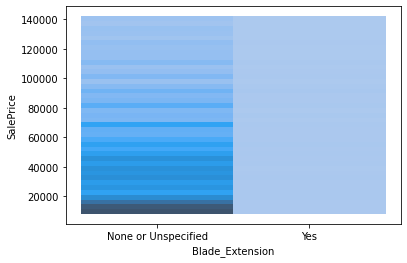

Blade_Width


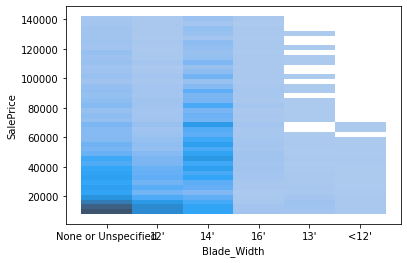

Enclosure_Type


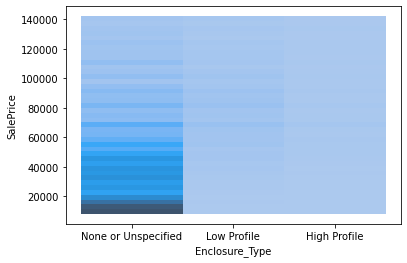

Engine_Horsepower


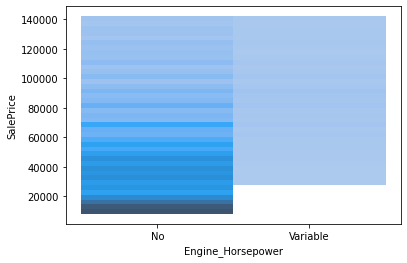

Hydraulics


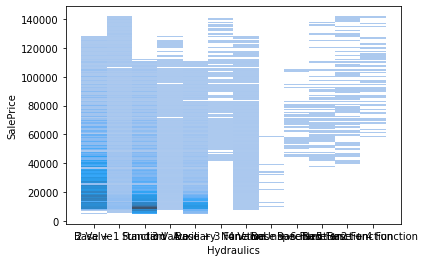

Pushblock


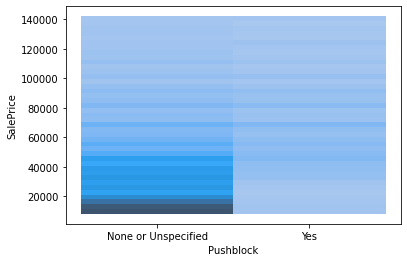

Ripper


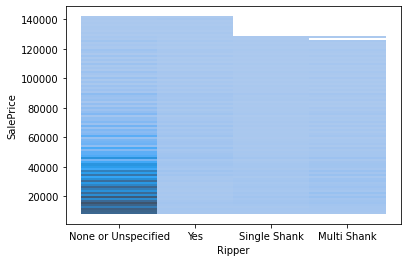

Scarifier


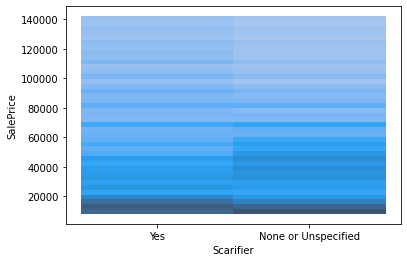

Tip_Control


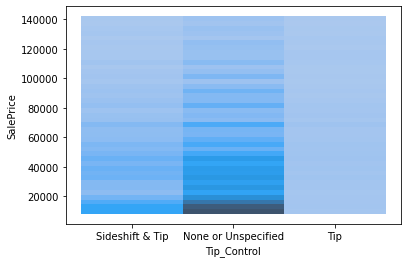

Tire_Size


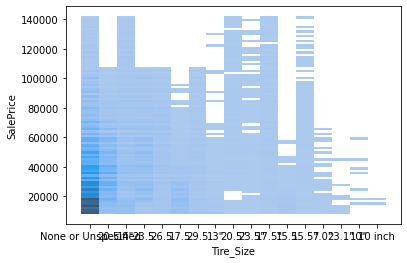

Coupler


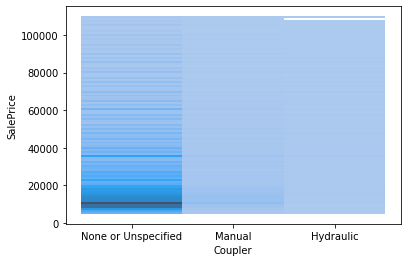

Coupler_System


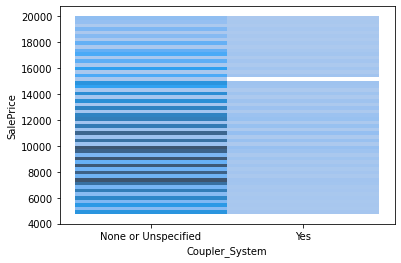

Grouser_Tracks


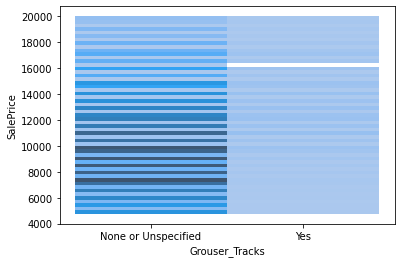

Hydraulics_Flow


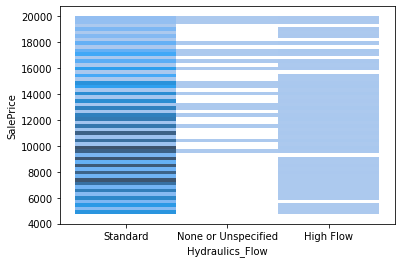

Track_Type


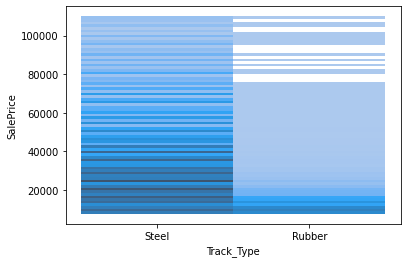

Undercarriage_Pad_Width


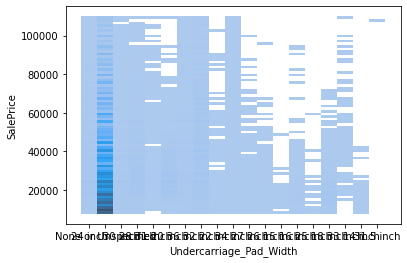

Stick_Length


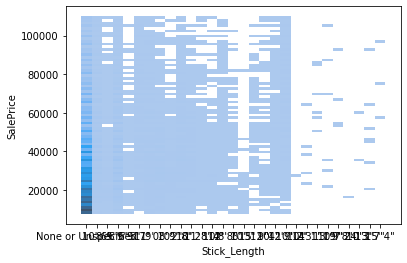

Thumb


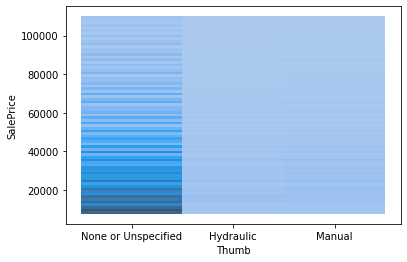

Pattern_Changer


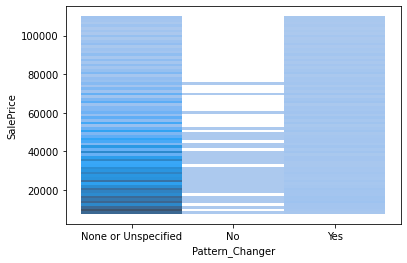

Grouser_Type


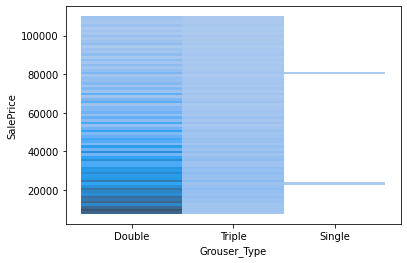

Backhoe_Mounting


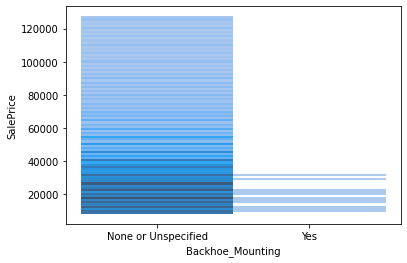

Blade_Type


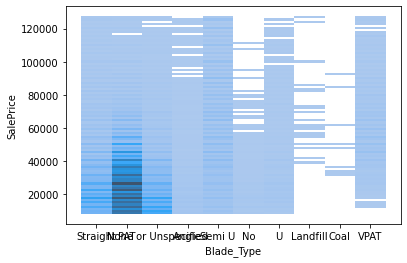

Travel_Controls


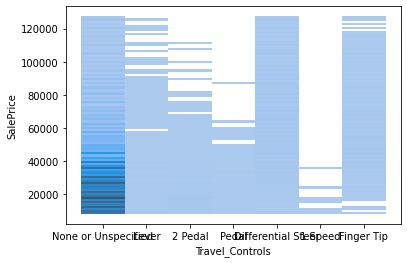

Differential_Type


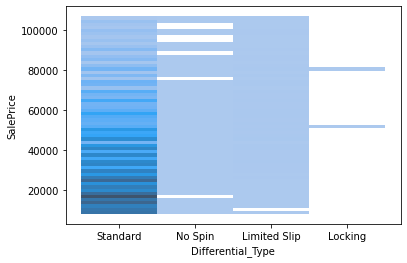

Steering_Controls


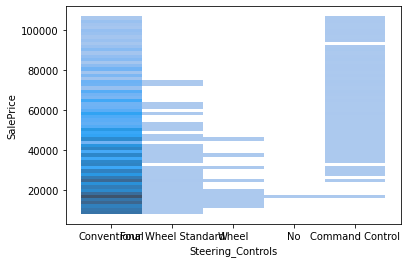

saleYear


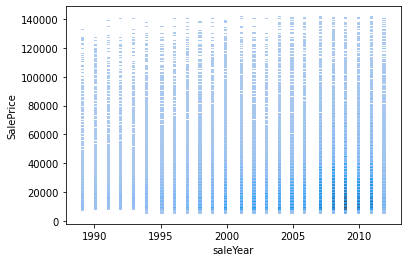

saleMonth


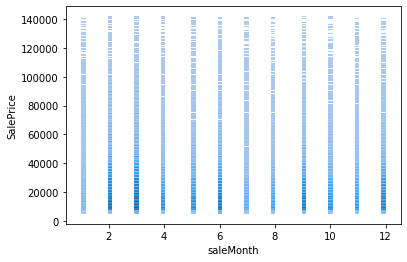

saleDay


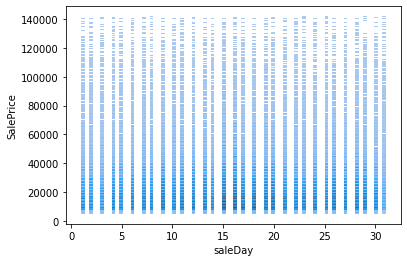

saleDayOfWeek


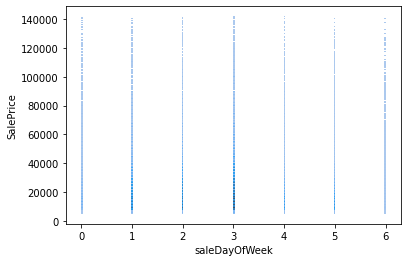

saleDayOfYear


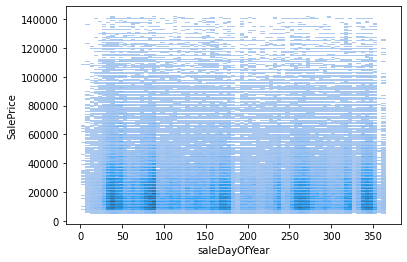

In [30]:
# Plotting everything in function of target
for col in df_tmp:
# select_dtypes(np.number):
    print(col)
    sns.histplot(data=df_tmp, x=df_tmp[col], y=df_tmp.SalePrice)  
    plt.show()

## 5. Model driven EDA
- Lets start a model so we can evaluate where to go from here

In [31]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [32]:
 df_tmp["UsageBand"].dtype

dtype('O')

- Model does not work because some of the data is object and there are many missing data (NaN)

In [33]:
# Lets build a Machine Learning Model
model = RandomForestRegressor(n_jobs=-1, # using as many cores as available in the computer
                              random_state=42)

model.fit(df_tmp.drop("SalePrice", axis=1), df.SalePrice)

# DOES NOT WORK - we have object and missing data

ValueError: could not convert string to float: 'Low'

In [34]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Converting string to categories 

One way we can turn all of our data into numbers is by converting them into Pandascategories

We can check the different datatypes available in Pandas here:
https://pandas.pydata.org/pandas-docs/version/0.22/api.html#data-types-related-functionality

In [35]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [36]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [37]:
df_tmp.select_dtypes("object").columns

Index(['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [38]:
# an example of df.items()
random_dict = {"key1":"hello",
               "key2":"world!"}

for key, value in random_dict.items():
    print(f"this is a key: {key}",
          f"this is a value: {value}")

this is a key: key1 this is a value: hello
this is a key: key2 this is a value: world!


In [39]:
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [40]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [41]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [42]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [43]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to Pandas categories, we now have a way of access all of our data inthe form of numbers.

But we still have a lot of missing data!

In [44]:
# Check missind data
(df_tmp.isnull().sum()/len(df_tmp))*100

SalesID                      0.000000
SalePrice                    0.000000
MachineID                    0.000000
ModelID                      0.000000
datasource                   0.000000
auctioneerID                 4.879113
YearMade                     0.000000
MachineHoursCurrentMeter    64.258610
UsageBand                   82.149174
fiModelDesc                  0.000000
fiBaseModel                  0.000000
fiSecondaryDesc             34.099269
fiModelSeries               85.784520
fiModelDescriptor           81.871490
ProductSize                 52.485110
fiProductClassDesc           0.000000
state                        0.000000
ProductGroup                 0.000000
ProductGroupDesc             0.000000
Drive_System                74.051970
Enclosure                    0.080931
Forks                       52.092087
Pad_Type                    80.349796
Ride_Control                62.992794
Stick                       80.349796
Transmission                54.444412
Turbocharged

### Save preprocessed data to a new .csv

In [45]:
# Export current tmp dataframe
df_tmp.to_csv("bluebook-for-bulldozers/train_tmp.csv",
             index=False)

In [46]:
# Import preprocessed data
df_tmp = pd.read_csv("bluebook-for-bulldozers/train_tmp.csv",
               low_memory=False)

In [47]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [48]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill missing values

### Fill numerical missing values first

In [49]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [50]:
df_tmp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [51]:
# Check for which numeric column have null value
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [52]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary bool column which tells us if the data was missing before
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [53]:
# Demonstrate why we are using median: median is more robust to outliers
hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [54]:
# Check if there is any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
            # nothing prints, no more null

In [55]:
df_tmp.dtypes

SalesID                                  int64
SalePrice                              float64
MachineID                                int64
ModelID                                  int64
datasource                               int64
auctioneerID                           float64
YearMade                                 int64
MachineHoursCurrentMeter               float64
UsageBand                               object
fiModelDesc                             object
fiBaseModel                             object
fiSecondaryDesc                         object
fiModelSeries                           object
fiModelDescriptor                       object
ProductSize                             object
fiProductClassDesc                      object
state                                   object
ProductGroup                            object
ProductGroupDesc                        object
Drive_System                            object
Enclosure                               object
Forks        

In [56]:
df_tmp.select_dtypes(include=['float64', 'int64']).isnull().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
saleYear                    0
saleMonth                   0
saleDay                     0
saleDayOfWeek               0
saleDayOfYear               0
dtype: int64

In [57]:
# Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()
# we filled 20136 places with the median

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [58]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical varibles into numbers

In [59]:
# Check for columns which are not numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [60]:
# Turns categorical varibles into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary bool coluln to indicate wheater a sample had a missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Fill missing numeric values with median
        df_tmp[label] = pd.Categorical(content).codes +1 # so all numbers are positive

In [61]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [62]:
pd.Categorical(df_tmp["state"]).codes+1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [63]:
pd.Categorical(df_tmp["UsageBand"]).codes # missing values are negative one

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [64]:
pd.Categorical(df_tmp["UsageBand"]).codes+1 # like this they become zero

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [65]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [66]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [67]:
df_tmp.isna().sum()[:50] # no more missing values!

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

### Trying again to model

Now that all of data is numeric and categorical and has no missing values, lets build a model

In [68]:
df_tmp.head() 

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [69]:
len(df_tmp)

412698

In [70]:
%%time
# Instantiate a Baseline model
model = RandomForestRegressor(n_jobs=-1, # using as many cores as available in the computer
                              random_state=42)

model.fit(df_tmp.drop("SalePrice", axis=1), df.SalePrice)

# Wall time : 13 hours and 20 minutes!

KeyboardInterrupt: 

In [140]:
# Score the model
model.score(df_tmp.drop("SalePrice", axis=1), df.SalePrice)
# 0.98754! But wait, we valuated on the same data! Thats why

0.9875468079970562

**Question:** Why isn't the metric reliable?
- Because we evaluated on the exact same data
- We need to split the TrainandValid.csv (now df_tmp) into Train and Valid
- Following Kaggle instructions: 
    * Train goes until the end of 2011; 
    * Validation set goes from January 1, 2012 - April 30, 2012

### Splitting data into train/validation sets

In [71]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [72]:
df_tmp.saleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [73]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [74]:
# Split data into X and y (features and labels)
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [75]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Building an evaluation function

In [76]:
# Create an evaluation function (competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error betweeen predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create fucntion to vealuate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE":   mean_absolute_error(y_train, train_preds),
              "Valid MAE":      mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE":    rmsle(y_valid, val_preds),
              "Training R^2":   r2_score(y_train, train_preds),
              "Valid R^2":      r2_score(y_valid, val_preds)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)


In [78]:
%%time
# This takes toooo long, so lets not use it
model = RandomForestRegressor(n_jobs=-1, 
                             random_state=42)

model.fit(X_train, y_train)

KeyboardInterrupt: 

In [79]:
len(X_train) # too big!

401125

In [80]:
# Change max_smaples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=500)

In [81]:
%%time
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(X_train, y_train)

Wall time: 4.08 s


RandomForestRegressor(max_samples=500, n_jobs=-1, random_state=42)

In [83]:
# Lets use the created function to evaluate the model
show_scores(model)

{'Training MAE': 8610.203726195077,
 'Valid MAE': 10349.002759008035,
 'Training RMSLE': 0.38034437548746003,
 'Valid RMSLE': 0.42317748858596604,
 'Training R^2': 0.7030793192676038,
 'Valid R^2': 0.6987800643309503}

### Hyperparameter tuning with RandomizedSearchCV

In [84]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestREgressor hyperparameters
rf_grid = {"n_estimators":      np.arange(10, 100, 10),
           "max_depth":         [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf":  np.arange(1, 20, 2),
           "max_features":      [0.5, 1, "sqrt", "auto"],
           "max_samples":       [500]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 52.2 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [500],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [85]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_samples': 500,
 'max_features': 'auto',
 'max_depth': 10}

In [86]:
rs_model.best_score_

0.5110439374712497

In [87]:
# Evaluate the RandomSearchCV model
show_scores(rs_model)

{'Training MAE': 10212.00716635945,
 'Valid MAE': 12122.782576181615,
 'Training RMSLE': 0.4373611710078723,
 'Valid RMSLE': 0.467851221426655,
 'Training R^2': 0.579469932160947,
 'Valid R^2': 0.5709390495529058}

### Train a model with the best hyperparamters using:

In [96]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None, 
                                    random_state=42)

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 48.9 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [97]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.2452416398953833,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

In [98]:
# Scores on rs_model (only trained on ~10000 examples)
show_scores(rs_model)

{'Training MAE': 10212.00716635945,
 'Valid MAE': 12122.782576181615,
 'Training RMSLE': 0.4373611710078723,
 'Valid RMSLE': 0.467851221426655,
 'Training R^2': 0.579469932160947,
 'Valid R^2': 0.5709390495529058}

## Make predictions on the test.csv

In [99]:
# Import the best data
df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


### Preprocessing the data (getting test dataset in the same format as training set)

In [100]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    # extracting the dates
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.day_of_week
    df["saleDayOfYear"] = df.saledate.dt.day_of_year
    
    # we dont need saledate column in the df anymore
    df.drop("saledate", axis=1, inplace=True)
    
    for label, content in df.items():
        # Fill numeric rows with the median
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary bool column which tells us if the data was missing before
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
        # Fill categorical missind data and 
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary bool coluln to indicate wheater a sample had a missing value
            df[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df[label] = pd.Categorical(content).codes +1 # so all numbers are positive
            
    return df

In [101]:
df_test = preprocess_data(df_test)

In [102]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [103]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [104]:
# Lets try to model, but X_train has 102 columns and df_test has 101 coumns
# and df_test does nto have the SalesPrice column
# test_preds = ideal_model.predict(df_test)

# we can find how the columns differ using sets!
set(X_train.columns) - set(df_test.columns)
# if df_test does not have this column, means nothing was missing in auctioneerID

{'auctioneerID_is_missing'}

In [105]:
# Manually adjust the auctioneerID_is_missing - but all False
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally, the df_test is ready! With 102 columns, same as X_train!

In [106]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [107]:
test_preds

array([20614.36780887, 19897.80170658, 44852.21959446, ...,
       14296.98620472, 22164.85757662, 31683.80063427])

In [108]:
# Format predictions into the sama format as Kaggle instructions
df_preds = pd.DataFrame() # empty df
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = test_preds

df_preds

,SalesID,SalePrice
0,1227829,20614.367809
1,1227844,19897.801707
2,1227847,44852.219594
3,1227848,68346.325323
4,1227863,39487.349708
...,...,...
12452,6643171,46466.092910
12453,6643173,17500.493352
12454,6643184,14296.986205
12455,6643186,22164.857577


In [109]:
# Export prediction df
df_preds.to_csv("test_predictions.csv", index=None)

## Feature Importance

Seeks to figure out which different attributes of the data were most important when it comes to predicting the target varible (SalePrice)

In [110]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [111]:
len(ideal_model.feature_importances_) # same as df_test columns, each columns a number

102

In [112]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    # Plot the df
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set(xlabel="Features Importances", ylabel="Features")
    ax.invert_yaxis()

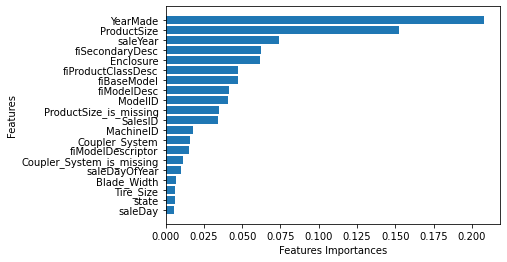

In [113]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [114]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [115]:
df.ProductSize.value_counts()

Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64

In [116]:
df.Enclosure.value_counts()

OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: Enclosure, dtype: int64

## Lets now try other models:
- CatBoost.ai
- XGBoost.ai

### CatBoostRegressor

In [118]:
from catboost import CatBoostRegressor

In [124]:
# Split data into X and y (features and labels)
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

In [119]:
# Building a simple CatBoostRefressor model to start
model = CatBoostRegressor()

# fit the model on train set
model.fit(X_train, y_train)

Learning rate set to 0.10556
0:	learn: 21817.1970684	total: 281ms	remaining: 4m 40s
1:	learn: 20745.6747962	total: 367ms	remaining: 3m 3s
2:	learn: 19899.9610080	total: 455ms	remaining: 2m 31s
3:	learn: 19138.8790606	total: 545ms	remaining: 2m 15s
4:	learn: 18481.0326901	total: 621ms	remaining: 2m 3s
5:	learn: 17937.7572802	total: 710ms	remaining: 1m 57s
6:	learn: 17387.9034897	total: 779ms	remaining: 1m 50s
7:	learn: 16940.5551014	total: 853ms	remaining: 1m 45s
8:	learn: 16564.8479011	total: 927ms	remaining: 1m 42s
9:	learn: 16167.9520806	total: 1s	remaining: 1m 39s
10:	learn: 15849.8792805	total: 1.07s	remaining: 1m 36s
11:	learn: 15567.3684542	total: 1.13s	remaining: 1m 33s
12:	learn: 15274.0181281	total: 1.2s	remaining: 1m 31s
13:	learn: 14978.5412091	total: 1.27s	remaining: 1m 29s
14:	learn: 14753.1459752	total: 1.34s	remaining: 1m 28s
15:	learn: 14533.9154011	total: 1.41s	remaining: 1m 26s
16:	learn: 14303.7309509	total: 1.49s	remaining: 1m 25s
17:	learn: 14101.3077624	total: 1.5

149:	learn: 9242.2351898	total: 11.3s	remaining: 1m 3s
150:	learn: 9229.0463645	total: 11.4s	remaining: 1m 3s
151:	learn: 9221.6407031	total: 11.4s	remaining: 1m 3s
152:	learn: 9213.6105441	total: 11.5s	remaining: 1m 3s
153:	learn: 9207.1361307	total: 11.6s	remaining: 1m 3s
154:	learn: 9202.4617254	total: 11.6s	remaining: 1m 3s
155:	learn: 9195.2830158	total: 11.7s	remaining: 1m 3s
156:	learn: 9186.7347629	total: 11.8s	remaining: 1m 3s
157:	learn: 9175.4644797	total: 11.8s	remaining: 1m 3s
158:	learn: 9163.1158747	total: 11.9s	remaining: 1m 3s
159:	learn: 9156.8616858	total: 12s	remaining: 1m 3s
160:	learn: 9147.6344856	total: 12.1s	remaining: 1m 3s
161:	learn: 9137.8332723	total: 12.2s	remaining: 1m 2s
162:	learn: 9130.2723555	total: 12.2s	remaining: 1m 2s
163:	learn: 9121.1481218	total: 12.3s	remaining: 1m 2s
164:	learn: 9114.6341174	total: 12.4s	remaining: 1m 2s
165:	learn: 9107.0779289	total: 12.4s	remaining: 1m 2s
166:	learn: 9101.0292486	total: 12.5s	remaining: 1m 2s
167:	learn: 

302:	learn: 8353.3902514	total: 22.2s	remaining: 51s
303:	learn: 8349.8736523	total: 22.3s	remaining: 51s
304:	learn: 8346.9883365	total: 22.3s	remaining: 50.9s
305:	learn: 8342.9057696	total: 22.4s	remaining: 50.8s
306:	learn: 8338.5742028	total: 22.5s	remaining: 50.7s
307:	learn: 8334.7825865	total: 22.6s	remaining: 50.7s
308:	learn: 8329.8740757	total: 22.6s	remaining: 50.6s
309:	learn: 8327.2119263	total: 22.7s	remaining: 50.5s
310:	learn: 8323.0724144	total: 22.8s	remaining: 50.4s
311:	learn: 8319.4549712	total: 22.8s	remaining: 50.3s
312:	learn: 8315.8993592	total: 22.9s	remaining: 50.3s
313:	learn: 8313.0090784	total: 23s	remaining: 50.2s
314:	learn: 8307.7304117	total: 23s	remaining: 50.1s
315:	learn: 8304.0219135	total: 23.1s	remaining: 50s
316:	learn: 8301.6776534	total: 23.2s	remaining: 49.9s
317:	learn: 8297.8825108	total: 23.2s	remaining: 49.9s
318:	learn: 8295.4942311	total: 23.3s	remaining: 49.8s
319:	learn: 8292.8242157	total: 23.4s	remaining: 49.7s
320:	learn: 8289.249

454:	learn: 7944.6467070	total: 33.1s	remaining: 39.6s
455:	learn: 7941.5753843	total: 33.2s	remaining: 39.6s
456:	learn: 7940.4918208	total: 33.2s	remaining: 39.5s
457:	learn: 7938.7987027	total: 33.3s	remaining: 39.4s
458:	learn: 7937.2010715	total: 33.4s	remaining: 39.3s
459:	learn: 7935.7421436	total: 33.4s	remaining: 39.3s
460:	learn: 7933.0697833	total: 33.5s	remaining: 39.2s
461:	learn: 7931.7341265	total: 33.6s	remaining: 39.1s
462:	learn: 7930.4028867	total: 33.6s	remaining: 39s
463:	learn: 7929.0298437	total: 33.7s	remaining: 38.9s
464:	learn: 7927.1300351	total: 33.8s	remaining: 38.9s
465:	learn: 7925.1186359	total: 33.8s	remaining: 38.8s
466:	learn: 7922.8148183	total: 33.9s	remaining: 38.7s
467:	learn: 7920.2015330	total: 34s	remaining: 38.6s
468:	learn: 7917.5529361	total: 34.1s	remaining: 38.6s
469:	learn: 7915.8220064	total: 34.2s	remaining: 38.5s
470:	learn: 7913.9450085	total: 34.2s	remaining: 38.5s
471:	learn: 7912.5367856	total: 34.3s	remaining: 38.4s
472:	learn: 79

606:	learn: 7689.8066933	total: 44s	remaining: 28.5s
607:	learn: 7688.2746507	total: 44.1s	remaining: 28.4s
608:	learn: 7687.2119952	total: 44.2s	remaining: 28.4s
609:	learn: 7686.2790754	total: 44.3s	remaining: 28.3s
610:	learn: 7684.9620848	total: 44.3s	remaining: 28.2s
611:	learn: 7683.4494754	total: 44.4s	remaining: 28.1s
612:	learn: 7681.6008326	total: 44.4s	remaining: 28.1s
613:	learn: 7678.3787088	total: 44.6s	remaining: 28s
614:	learn: 7676.7106112	total: 44.6s	remaining: 27.9s
615:	learn: 7675.4043526	total: 44.7s	remaining: 27.9s
616:	learn: 7674.1352714	total: 44.8s	remaining: 27.8s
617:	learn: 7672.2540007	total: 44.9s	remaining: 27.7s
618:	learn: 7670.8203763	total: 44.9s	remaining: 27.7s
619:	learn: 7669.3029362	total: 45s	remaining: 27.6s
620:	learn: 7668.2082113	total: 45.1s	remaining: 27.5s
621:	learn: 7666.8615606	total: 45.1s	remaining: 27.4s
622:	learn: 7664.8203485	total: 45.2s	remaining: 27.4s
623:	learn: 7662.9593959	total: 45.3s	remaining: 27.3s
624:	learn: 7661

757:	learn: 7505.4275945	total: 55.5s	remaining: 17.7s
758:	learn: 7504.7426615	total: 55.6s	remaining: 17.6s
759:	learn: 7503.7076659	total: 55.7s	remaining: 17.6s
760:	learn: 7502.6432736	total: 55.8s	remaining: 17.5s
761:	learn: 7501.7806724	total: 55.8s	remaining: 17.4s
762:	learn: 7500.7199288	total: 55.9s	remaining: 17.4s
763:	learn: 7500.0742444	total: 56s	remaining: 17.3s
764:	learn: 7498.6989949	total: 56.1s	remaining: 17.2s
765:	learn: 7497.6180259	total: 56.1s	remaining: 17.1s
766:	learn: 7496.8829471	total: 56.2s	remaining: 17.1s
767:	learn: 7496.0945329	total: 56.3s	remaining: 17s
768:	learn: 7495.0631830	total: 56.3s	remaining: 16.9s
769:	learn: 7493.8654868	total: 56.4s	remaining: 16.8s
770:	learn: 7493.2564936	total: 56.5s	remaining: 16.8s
771:	learn: 7492.3799533	total: 56.5s	remaining: 16.7s
772:	learn: 7490.4201955	total: 56.6s	remaining: 16.6s
773:	learn: 7488.7412061	total: 56.7s	remaining: 16.6s
774:	learn: 7487.9243235	total: 56.8s	remaining: 16.5s
775:	learn: 74

909:	learn: 7360.4821956	total: 1m 6s	remaining: 6.57s
910:	learn: 7359.4969498	total: 1m 6s	remaining: 6.5s
911:	learn: 7357.8662794	total: 1m 6s	remaining: 6.43s
912:	learn: 7357.0330685	total: 1m 6s	remaining: 6.35s
913:	learn: 7356.0845661	total: 1m 6s	remaining: 6.28s
914:	learn: 7355.6023681	total: 1m 6s	remaining: 6.21s
915:	learn: 7355.0159374	total: 1m 6s	remaining: 6.14s
916:	learn: 7353.8841583	total: 1m 6s	remaining: 6.06s
917:	learn: 7353.1132719	total: 1m 7s	remaining: 5.99s
918:	learn: 7352.3557754	total: 1m 7s	remaining: 5.92s
919:	learn: 7351.6399377	total: 1m 7s	remaining: 5.84s
920:	learn: 7350.2371667	total: 1m 7s	remaining: 5.77s
921:	learn: 7349.2154306	total: 1m 7s	remaining: 5.7s
922:	learn: 7348.1204509	total: 1m 7s	remaining: 5.63s
923:	learn: 7346.9649916	total: 1m 7s	remaining: 5.55s
924:	learn: 7346.0439425	total: 1m 7s	remaining: 5.48s
925:	learn: 7345.5760309	total: 1m 7s	remaining: 5.41s
926:	learn: 7344.9970191	total: 1m 7s	remaining: 5.33s
927:	learn: 

In [151]:
# make predictions on train set
train_preds = model.predict(X_train)

# make predictions on validation set
val_preds = model.predict(X_valid)

scores = {"Training MAE":   mean_absolute_error(y_train, train_preds),
          "Valid MAE":      mean_absolute_error(y_valid, val_preds),
          "Training RMSLE": rmsle(y_train, abs(train_preds)),
          "Valid RMSLE":    rmsle(y_valid, val_preds),
          "Training R^2":   r2_score(y_train, train_preds),
          "Valid R^2":      r2_score(y_valid, val_preds)}

In [138]:
# there are some negative values in train_preds
if (train_preds< 0).any() :
    print("found negative")

found negative


In [157]:
# these are the negative values of train preds
for i in np.where((train_preds < 0)==True):
    print(train_preds[i])

[-1407.902542   -1917.19233716 -2244.41019171  -834.27302634
  -142.77998851   -78.02231861  -657.12733362 -5589.55948002]


In [155]:
# scores for simple CatBoostRegressor model
scores

{'Training MAE': 4810.620750036821,
 'Valid MAE': 6137.268141809315,
 'Training RMSLE': 0.24086323932765444,
 'Valid RMSLE': 0.25926902860666445,
 'Training R^2': 0.8999631923177192,
 'Valid R^2': 0.877700511196048}

### Tuning hyperparameters of CatBoostRegressor using GridSearchCV

In [158]:
# Different hyperparams for our CatBoostRegressor Model
catboost_grid = {"iterations": np.arange(2, 30),
                 "learning_rate": [0.1, 0.5, 1.0],
                 "depth": [1, 2, 3]}

# Setup grid hyperparams search for CatBoostRegressor
gs_catboost = GridSearchCV(CatBoostRegressor(),
                         param_grid=catboost_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparm search model
gs_catboost.fit(X_train, y_train)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
0:	learn: 22937.6005495	total: 30.1ms	remaining: 30.1ms
1:	learn: 22698.5345246	total: 55.4ms	remaining: 0us
0:	learn: 23132.2795472	total: 29.3ms	remaining: 29.3ms
1:	learn: 22904.5449793	total: 54.2ms	remaining: 0us
0:	learn: 22643.0779233	total: 29.9ms	remaining: 29.9ms
1:	learn: 22426.3003327	total: 56.3ms	remaining: 0us
0:	learn: 22613.4078020	total: 34.1ms	remaining: 34.1ms
1:	learn: 22400.2626316	total: 62.2ms	remaining: 0us
0:	learn: 22541.0154775	total: 29.2ms	remaining: 29.2ms
1:	learn: 22337.0904368	total: 55.3ms	remaining: 0us
0:	learn: 22165.0299413	total: 29.8ms	remaining: 29.8ms
1:	learn: 21427.2064490	total: 55.4ms	remaining: 0us
0:	learn: 22314.2153603	total: 28.8ms	remaining: 28.8ms
1:	learn: 21616.0095327	total: 55.2ms	remaining: 0us
0:	learn: 21843.9557718	total: 37.5ms	remaining: 37.5ms
1:	learn: 21100.7074196	total: 68.5ms	remaining: 0us
0:	learn: 21827.8387727	total: 35.7ms	remaining: 35.7ms
1:	learn

0:	learn: 22613.4078020	total: 30.9ms	remaining: 124ms
1:	learn: 22400.2626316	total: 58.4ms	remaining: 87.6ms
2:	learn: 22205.2278843	total: 85.1ms	remaining: 56.7ms
3:	learn: 22009.8949909	total: 114ms	remaining: 28.6ms
4:	learn: 21826.1299131	total: 140ms	remaining: 0us
0:	learn: 22541.0154775	total: 37.8ms	remaining: 151ms
1:	learn: 22337.0904368	total: 73.5ms	remaining: 110ms
2:	learn: 22139.6642360	total: 101ms	remaining: 67.6ms
3:	learn: 21951.0353590	total: 130ms	remaining: 32.4ms
4:	learn: 21777.4529772	total: 155ms	remaining: 0us
0:	learn: 22165.0299413	total: 30.1ms	remaining: 120ms
1:	learn: 21427.2064490	total: 56.8ms	remaining: 85.2ms
2:	learn: 20672.0484215	total: 85.3ms	remaining: 56.8ms
3:	learn: 20077.4672574	total: 109ms	remaining: 27.3ms
4:	learn: 19468.5549938	total: 134ms	remaining: 0us
0:	learn: 22314.2153603	total: 34.6ms	remaining: 138ms
1:	learn: 21616.0095327	total: 65.8ms	remaining: 98.7ms
2:	learn: 20940.2566294	total: 95.4ms	remaining: 63.6ms
3:	learn: 203

0:	learn: 23132.2795472	total: 34.2ms	remaining: 205ms
1:	learn: 22904.5449793	total: 65.6ms	remaining: 164ms
2:	learn: 22701.2537340	total: 98.1ms	remaining: 131ms
3:	learn: 22509.1415707	total: 130ms	remaining: 97.6ms
4:	learn: 22336.6999525	total: 160ms	remaining: 64.1ms
5:	learn: 22176.6707146	total: 191ms	remaining: 31.9ms
6:	learn: 22017.4475386	total: 223ms	remaining: 0us
0:	learn: 22643.0779233	total: 33.1ms	remaining: 199ms
1:	learn: 22426.3003327	total: 61.4ms	remaining: 154ms
2:	learn: 22230.6450930	total: 90ms	remaining: 120ms
3:	learn: 22050.1591191	total: 118ms	remaining: 88.5ms
4:	learn: 21869.9280242	total: 146ms	remaining: 58.4ms
5:	learn: 21710.0595872	total: 173ms	remaining: 28.9ms
6:	learn: 21550.6634805	total: 201ms	remaining: 0us
0:	learn: 22613.4078020	total: 31ms	remaining: 186ms
1:	learn: 22400.2626316	total: 60.4ms	remaining: 151ms
2:	learn: 22205.2278843	total: 88.5ms	remaining: 118ms
3:	learn: 22009.8949909	total: 117ms	remaining: 87.6ms
4:	learn: 21826.1299

0:	learn: 21843.9557718	total: 29.8ms	remaining: 209ms
1:	learn: 21100.7074196	total: 61.5ms	remaining: 184ms
2:	learn: 20469.1589389	total: 101ms	remaining: 168ms
3:	learn: 19873.2807680	total: 133ms	remaining: 133ms
4:	learn: 19426.6508798	total: 159ms	remaining: 95.6ms
5:	learn: 19027.2392498	total: 183ms	remaining: 61ms
6:	learn: 18603.9666392	total: 211ms	remaining: 30.2ms
7:	learn: 18196.2455288	total: 236ms	remaining: 0us
0:	learn: 21827.8387727	total: 40.3ms	remaining: 282ms
1:	learn: 21015.6747688	total: 68.7ms	remaining: 206ms
2:	learn: 20339.8923028	total: 101ms	remaining: 169ms
3:	learn: 19802.4691181	total: 128ms	remaining: 128ms
4:	learn: 19309.9379469	total: 155ms	remaining: 92.7ms
5:	learn: 18793.8308857	total: 181ms	remaining: 60.4ms
6:	learn: 18391.5420754	total: 206ms	remaining: 29.4ms
7:	learn: 18075.6952043	total: 230ms	remaining: 0us
0:	learn: 21789.8255221	total: 41.8ms	remaining: 293ms
1:	learn: 20998.1346119	total: 76.5ms	remaining: 229ms
2:	learn: 20306.232227

7:	learn: 18052.4568718	total: 243ms	remaining: 30.4ms
8:	learn: 17750.8053460	total: 272ms	remaining: 0us
0:	learn: 21811.2816068	total: 34.2ms	remaining: 273ms
1:	learn: 20751.4916101	total: 63.2ms	remaining: 221ms
2:	learn: 19857.4672997	total: 90.6ms	remaining: 181ms
3:	learn: 18821.9830269	total: 118ms	remaining: 147ms
4:	learn: 18205.0506553	total: 143ms	remaining: 115ms
5:	learn: 17315.4323388	total: 167ms	remaining: 83.4ms
6:	learn: 16696.6702950	total: 191ms	remaining: 54.6ms
7:	learn: 16256.0508189	total: 218ms	remaining: 27.2ms
8:	learn: 15952.1682538	total: 249ms	remaining: 0us
0:	learn: 21939.1433196	total: 29.7ms	remaining: 237ms
1:	learn: 20938.9582250	total: 60.9ms	remaining: 213ms
2:	learn: 20107.3345492	total: 86.9ms	remaining: 174ms
3:	learn: 19163.9024161	total: 115ms	remaining: 144ms
4:	learn: 18622.3805205	total: 147ms	remaining: 118ms
5:	learn: 17864.6038953	total: 171ms	remaining: 85.5ms
6:	learn: 17366.7484335	total: 200ms	remaining: 57.3ms
7:	learn: 16974.1857

8:	learn: 15952.1682538	total: 249ms	remaining: 27.7ms
9:	learn: 15759.4986935	total: 276ms	remaining: 0us
0:	learn: 21939.1433196	total: 31ms	remaining: 279ms
1:	learn: 20938.9582250	total: 63.9ms	remaining: 256ms
2:	learn: 20107.3345492	total: 93.7ms	remaining: 219ms
3:	learn: 19163.9024161	total: 121ms	remaining: 182ms
4:	learn: 18622.3805205	total: 146ms	remaining: 146ms
5:	learn: 17864.6038953	total: 172ms	remaining: 115ms
6:	learn: 17366.7484335	total: 196ms	remaining: 84ms
7:	learn: 16974.1857191	total: 222ms	remaining: 55.5ms
8:	learn: 16699.7458143	total: 248ms	remaining: 27.6ms
9:	learn: 16501.2341693	total: 273ms	remaining: 0us
0:	learn: 21477.5891989	total: 30ms	remaining: 270ms
1:	learn: 20404.7247576	total: 60.8ms	remaining: 243ms
2:	learn: 19672.2250497	total: 89ms	remaining: 208ms
3:	learn: 19048.0377908	total: 117ms	remaining: 176ms
4:	learn: 18307.8425972	total: 144ms	remaining: 144ms
5:	learn: 17787.9395344	total: 169ms	remaining: 112ms
6:	learn: 17192.7929215	total:

0:	learn: 21811.2816068	total: 31.4ms	remaining: 314ms
1:	learn: 20751.4916101	total: 64ms	remaining: 288ms
2:	learn: 19857.4672997	total: 94.6ms	remaining: 252ms
3:	learn: 18821.9830269	total: 123ms	remaining: 215ms
4:	learn: 18205.0506553	total: 149ms	remaining: 179ms
5:	learn: 17315.4323388	total: 174ms	remaining: 145ms
6:	learn: 16696.6702950	total: 198ms	remaining: 113ms
7:	learn: 16256.0508189	total: 225ms	remaining: 84.4ms
8:	learn: 15952.1682538	total: 252ms	remaining: 56ms
9:	learn: 15759.4986935	total: 277ms	remaining: 27.7ms
10:	learn: 15518.3256758	total: 305ms	remaining: 0us
0:	learn: 21939.1433196	total: 38.9ms	remaining: 389ms
1:	learn: 20938.9582250	total: 76.9ms	remaining: 346ms
2:	learn: 20107.3345492	total: 103ms	remaining: 275ms
3:	learn: 19163.9024161	total: 134ms	remaining: 235ms
4:	learn: 18622.3805205	total: 163ms	remaining: 195ms
5:	learn: 17864.6038953	total: 195ms	remaining: 162ms
6:	learn: 17366.7484335	total: 229ms	remaining: 131ms
7:	learn: 16974.1857191	t

0:	learn: 21827.8387727	total: 38.7ms	remaining: 426ms
1:	learn: 21015.6747688	total: 66.6ms	remaining: 333ms
2:	learn: 20339.8923028	total: 93.1ms	remaining: 279ms
3:	learn: 19802.4691181	total: 123ms	remaining: 246ms
4:	learn: 19309.9379469	total: 154ms	remaining: 216ms
5:	learn: 18793.8308857	total: 178ms	remaining: 178ms
6:	learn: 18391.5420754	total: 202ms	remaining: 144ms
7:	learn: 18075.6952043	total: 230ms	remaining: 115ms
8:	learn: 17824.5523142	total: 255ms	remaining: 85.1ms
9:	learn: 17593.4395526	total: 281ms	remaining: 56.2ms
10:	learn: 17356.5917974	total: 305ms	remaining: 27.7ms
11:	learn: 17134.5579414	total: 330ms	remaining: 0us
0:	learn: 21789.8255221	total: 31.3ms	remaining: 345ms
1:	learn: 20998.1346119	total: 58.5ms	remaining: 292ms
2:	learn: 20306.2322275	total: 90.4ms	remaining: 271ms
3:	learn: 19770.3915984	total: 122ms	remaining: 244ms
4:	learn: 19276.4209617	total: 146ms	remaining: 205ms
5:	learn: 18758.3931602	total: 176ms	remaining: 176ms
6:	learn: 18374.243

8:	learn: 17743.2433655	total: 263ms	remaining: 117ms
9:	learn: 17416.2962094	total: 286ms	remaining: 85.8ms
10:	learn: 17097.8121164	total: 316ms	remaining: 57.4ms
11:	learn: 16838.3960569	total: 341ms	remaining: 28.4ms
12:	learn: 16617.3747764	total: 365ms	remaining: 0us
0:	learn: 22314.2153603	total: 34ms	remaining: 408ms
1:	learn: 21616.0095327	total: 61.9ms	remaining: 340ms
2:	learn: 20940.2566294	total: 96.2ms	remaining: 321ms
3:	learn: 20383.8773691	total: 123ms	remaining: 277ms
4:	learn: 19945.9616378	total: 147ms	remaining: 235ms
5:	learn: 19440.7852310	total: 179ms	remaining: 209ms
6:	learn: 19039.9876353	total: 202ms	remaining: 173ms
7:	learn: 18609.0746692	total: 229ms	remaining: 143ms
8:	learn: 18315.6680679	total: 255ms	remaining: 113ms
9:	learn: 18060.6580415	total: 278ms	remaining: 83.5ms
10:	learn: 17790.5315192	total: 303ms	remaining: 55.1ms
11:	learn: 17524.8801356	total: 327ms	remaining: 27.3ms
12:	learn: 17306.8921427	total: 350ms	remaining: 0us
0:	learn: 21843.955

8:	learn: 21258.4188206	total: 257ms	remaining: 143ms
9:	learn: 21121.7553204	total: 283ms	remaining: 113ms
10:	learn: 20991.6510172	total: 307ms	remaining: 83.7ms
11:	learn: 20862.0660060	total: 333ms	remaining: 55.5ms
12:	learn: 20741.6691584	total: 361ms	remaining: 27.7ms
13:	learn: 20629.4682569	total: 391ms	remaining: 0us
0:	learn: 22613.4078020	total: 34.9ms	remaining: 454ms
1:	learn: 22400.2626316	total: 70.8ms	remaining: 425ms
2:	learn: 22205.2278843	total: 101ms	remaining: 371ms
3:	learn: 22009.8949909	total: 128ms	remaining: 321ms
4:	learn: 21826.1299131	total: 155ms	remaining: 279ms
5:	learn: 21663.3802445	total: 181ms	remaining: 241ms
6:	learn: 21502.9575039	total: 204ms	remaining: 204ms
7:	learn: 21348.5907117	total: 229ms	remaining: 172ms
8:	learn: 21201.8182375	total: 257ms	remaining: 143ms
9:	learn: 21060.3550082	total: 287ms	remaining: 115ms
10:	learn: 20930.1902875	total: 311ms	remaining: 84.8ms
11:	learn: 20800.0571708	total: 335ms	remaining: 55.9ms
12:	learn: 20673.

8:	learn: 16507.2901612	total: 244ms	remaining: 136ms
9:	learn: 16288.7650415	total: 268ms	remaining: 107ms
10:	learn: 16119.9069473	total: 292ms	remaining: 79.8ms
11:	learn: 15972.7860351	total: 322ms	remaining: 53.6ms
12:	learn: 15821.9884475	total: 353ms	remaining: 27.1ms
13:	learn: 15636.0579038	total: 375ms	remaining: 0us
0:	learn: 21445.9624715	total: 37.1ms	remaining: 483ms
1:	learn: 20308.8161506	total: 74.2ms	remaining: 445ms
2:	learn: 19468.4877329	total: 101ms	remaining: 370ms
3:	learn: 18683.5387452	total: 131ms	remaining: 327ms
4:	learn: 18070.3160854	total: 156ms	remaining: 282ms
5:	learn: 17496.2191100	total: 181ms	remaining: 241ms
6:	learn: 17009.2721658	total: 206ms	remaining: 206ms
7:	learn: 16682.7274782	total: 231ms	remaining: 173ms
8:	learn: 16426.7836219	total: 255ms	remaining: 142ms
9:	learn: 16217.8379526	total: 282ms	remaining: 113ms
10:	learn: 16036.0929050	total: 307ms	remaining: 83.8ms
11:	learn: 15870.0305180	total: 334ms	remaining: 55.7ms
12:	learn: 15731.

0:	learn: 21789.8255221	total: 29.5ms	remaining: 413ms
1:	learn: 20998.1346119	total: 55.3ms	remaining: 360ms
2:	learn: 20306.2322275	total: 79.6ms	remaining: 318ms
3:	learn: 19770.3915984	total: 104ms	remaining: 286ms
4:	learn: 19276.4209617	total: 129ms	remaining: 258ms
5:	learn: 18758.3931602	total: 154ms	remaining: 232ms
6:	learn: 18374.2433120	total: 179ms	remaining: 205ms
7:	learn: 18052.4568718	total: 203ms	remaining: 177ms
8:	learn: 17750.8053460	total: 227ms	remaining: 151ms
9:	learn: 17516.9547843	total: 250ms	remaining: 125ms
10:	learn: 17319.7236305	total: 272ms	remaining: 99ms
11:	learn: 17083.5672363	total: 297ms	remaining: 74.1ms
12:	learn: 16901.7436417	total: 319ms	remaining: 49.1ms
13:	learn: 16750.5638821	total: 344ms	remaining: 24.5ms
14:	learn: 16592.4911669	total: 366ms	remaining: 0us
0:	learn: 21811.2816068	total: 36.2ms	remaining: 507ms
1:	learn: 20751.4916101	total: 65.1ms	remaining: 423ms
2:	learn: 19857.4672997	total: 93.7ms	remaining: 375ms
3:	learn: 18821.9

14:	learn: 20444.5349705	total: 429ms	remaining: 28.6ms
15:	learn: 20339.2574544	total: 462ms	remaining: 0us
0:	learn: 22541.0154775	total: 32.3ms	remaining: 485ms
1:	learn: 22337.0904368	total: 59.8ms	remaining: 418ms
2:	learn: 22139.6642360	total: 86.3ms	remaining: 374ms
3:	learn: 21951.0353590	total: 112ms	remaining: 336ms
4:	learn: 21777.4529772	total: 135ms	remaining: 296ms
5:	learn: 21611.8879665	total: 157ms	remaining: 262ms
6:	learn: 21452.8598661	total: 180ms	remaining: 231ms
7:	learn: 21305.3363831	total: 202ms	remaining: 202ms
8:	learn: 21159.4665166	total: 225ms	remaining: 175ms
9:	learn: 21015.3088319	total: 249ms	remaining: 149ms
10:	learn: 20883.9608067	total: 283ms	remaining: 129ms
11:	learn: 20761.0120948	total: 307ms	remaining: 102ms
12:	learn: 20639.0523297	total: 331ms	remaining: 76.5ms
13:	learn: 20514.5017968	total: 355ms	remaining: 50.8ms
14:	learn: 20398.7787624	total: 381ms	remaining: 25.4ms
15:	learn: 20293.7882831	total: 404ms	remaining: 0us
0:	learn: 22165.0

8:	learn: 16507.2901612	total: 244ms	remaining: 190ms
9:	learn: 16288.7650415	total: 270ms	remaining: 162ms
10:	learn: 16119.9069473	total: 293ms	remaining: 133ms
11:	learn: 15972.7860351	total: 318ms	remaining: 106ms
12:	learn: 15821.9884475	total: 343ms	remaining: 79.2ms
13:	learn: 15636.0579038	total: 367ms	remaining: 52.5ms
14:	learn: 15519.0962518	total: 394ms	remaining: 26.3ms
15:	learn: 15424.2099675	total: 422ms	remaining: 0us
0:	learn: 21445.9624715	total: 34.1ms	remaining: 511ms
1:	learn: 20308.8161506	total: 64.2ms	remaining: 449ms
2:	learn: 19468.4877329	total: 95.3ms	remaining: 413ms
3:	learn: 18683.5387452	total: 123ms	remaining: 368ms
4:	learn: 18070.3160854	total: 148ms	remaining: 327ms
5:	learn: 17496.2191100	total: 175ms	remaining: 291ms
6:	learn: 17009.2721658	total: 200ms	remaining: 257ms
7:	learn: 16682.7274782	total: 224ms	remaining: 224ms
8:	learn: 16426.7836219	total: 250ms	remaining: 195ms
9:	learn: 16217.8379526	total: 275ms	remaining: 165ms
10:	learn: 16036.0

8:	learn: 17882.2724052	total: 237ms	remaining: 210ms
9:	learn: 17653.6239139	total: 261ms	remaining: 183ms
10:	learn: 17424.0920889	total: 287ms	remaining: 156ms
11:	learn: 17225.9344584	total: 312ms	remaining: 130ms
12:	learn: 17012.6017126	total: 335ms	remaining: 103ms
13:	learn: 16796.5517642	total: 361ms	remaining: 77.3ms
14:	learn: 16643.1013180	total: 386ms	remaining: 51.5ms
15:	learn: 16520.2657045	total: 410ms	remaining: 25.6ms
16:	learn: 16375.0911138	total: 436ms	remaining: 0us
0:	learn: 21827.8387727	total: 40.5ms	remaining: 649ms
1:	learn: 21015.6747688	total: 74.8ms	remaining: 561ms
2:	learn: 20339.8923028	total: 111ms	remaining: 518ms
3:	learn: 19802.4691181	total: 143ms	remaining: 464ms
4:	learn: 19309.9379469	total: 174ms	remaining: 419ms
5:	learn: 18793.8308857	total: 207ms	remaining: 379ms
6:	learn: 18391.5420754	total: 237ms	remaining: 339ms
7:	learn: 18075.6952043	total: 271ms	remaining: 305ms
8:	learn: 17824.5523142	total: 310ms	remaining: 275ms
9:	learn: 17593.43

8:	learn: 21719.4217712	total: 252ms	remaining: 252ms
9:	learn: 21574.7347426	total: 280ms	remaining: 224ms
10:	learn: 21444.0084253	total: 307ms	remaining: 195ms
11:	learn: 21324.0291782	total: 337ms	remaining: 169ms
12:	learn: 21204.6051049	total: 363ms	remaining: 140ms
13:	learn: 21086.7740106	total: 387ms	remaining: 111ms
14:	learn: 20979.2273865	total: 414ms	remaining: 82.7ms
15:	learn: 20873.5801485	total: 440ms	remaining: 55ms
16:	learn: 20770.1417384	total: 468ms	remaining: 27.5ms
17:	learn: 20662.6029111	total: 492ms	remaining: 0us
0:	learn: 22643.0779233	total: 32.9ms	remaining: 559ms
1:	learn: 22426.3003327	total: 67.2ms	remaining: 537ms
2:	learn: 22230.6450930	total: 101ms	remaining: 506ms
3:	learn: 22050.1591191	total: 133ms	remaining: 466ms
4:	learn: 21869.9280242	total: 162ms	remaining: 421ms
5:	learn: 21710.0595872	total: 191ms	remaining: 382ms
6:	learn: 21550.6634805	total: 221ms	remaining: 348ms
7:	learn: 21401.6572477	total: 253ms	remaining: 316ms
8:	learn: 21258.418

0:	learn: 21811.2816068	total: 32.5ms	remaining: 553ms
1:	learn: 20751.4916101	total: 70.1ms	remaining: 561ms
2:	learn: 19857.4672997	total: 98.7ms	remaining: 493ms
3:	learn: 18821.9830269	total: 125ms	remaining: 439ms
4:	learn: 18205.0506553	total: 152ms	remaining: 396ms
5:	learn: 17315.4323388	total: 179ms	remaining: 358ms
6:	learn: 16696.6702950	total: 205ms	remaining: 323ms
7:	learn: 16256.0508189	total: 230ms	remaining: 287ms
8:	learn: 15952.1682538	total: 256ms	remaining: 256ms
9:	learn: 15759.4986935	total: 280ms	remaining: 224ms
10:	learn: 15518.3256758	total: 306ms	remaining: 195ms
11:	learn: 15307.0772800	total: 331ms	remaining: 166ms
12:	learn: 15090.5783003	total: 358ms	remaining: 138ms
13:	learn: 14935.8393867	total: 382ms	remaining: 109ms
14:	learn: 14822.0390300	total: 408ms	remaining: 81.5ms
15:	learn: 14672.5637789	total: 432ms	remaining: 54ms
16:	learn: 14566.7556221	total: 457ms	remaining: 26.9ms
17:	learn: 14463.4904690	total: 484ms	remaining: 0us
0:	learn: 21939.14

8:	learn: 21201.8182375	total: 247ms	remaining: 275ms
9:	learn: 21060.3550082	total: 271ms	remaining: 244ms
10:	learn: 20930.1902875	total: 297ms	remaining: 216ms
11:	learn: 20800.0571708	total: 322ms	remaining: 188ms
12:	learn: 20673.7140271	total: 349ms	remaining: 161ms
13:	learn: 20552.9456420	total: 381ms	remaining: 136ms
14:	learn: 20444.5349705	total: 411ms	remaining: 110ms
15:	learn: 20339.2574544	total: 440ms	remaining: 82.6ms
16:	learn: 20235.9001437	total: 469ms	remaining: 55.2ms
17:	learn: 20135.0977668	total: 498ms	remaining: 27.7ms
18:	learn: 20037.0671291	total: 527ms	remaining: 0us
0:	learn: 22541.0154775	total: 32ms	remaining: 577ms
1:	learn: 22337.0904368	total: 60.6ms	remaining: 515ms
2:	learn: 22139.6642360	total: 89.6ms	remaining: 478ms
3:	learn: 21951.0353590	total: 119ms	remaining: 448ms
4:	learn: 21777.4529772	total: 144ms	remaining: 402ms
5:	learn: 21611.8879665	total: 170ms	remaining: 368ms
6:	learn: 21452.8598661	total: 196ms	remaining: 336ms
7:	learn: 21305.3

8:	learn: 16699.7458143	total: 266ms	remaining: 296ms
9:	learn: 16501.2341693	total: 291ms	remaining: 262ms
10:	learn: 16189.0498184	total: 318ms	remaining: 231ms
11:	learn: 15986.1061275	total: 344ms	remaining: 201ms
12:	learn: 15824.3595196	total: 371ms	remaining: 171ms
13:	learn: 15662.8227463	total: 395ms	remaining: 141ms
14:	learn: 15548.7579448	total: 421ms	remaining: 112ms
15:	learn: 15405.0469008	total: 449ms	remaining: 84.1ms
16:	learn: 15275.8784760	total: 473ms	remaining: 55.6ms
17:	learn: 15163.2275021	total: 500ms	remaining: 27.8ms
18:	learn: 15045.6837719	total: 528ms	remaining: 0us
0:	learn: 21477.5891989	total: 35.9ms	remaining: 646ms
1:	learn: 20404.7247576	total: 68.1ms	remaining: 579ms
2:	learn: 19672.2250497	total: 94.9ms	remaining: 506ms
3:	learn: 19048.0377908	total: 123ms	remaining: 460ms
4:	learn: 18307.8425972	total: 151ms	remaining: 422ms
5:	learn: 17787.9395344	total: 177ms	remaining: 383ms
6:	learn: 17192.7929215	total: 202ms	remaining: 347ms
7:	learn: 16862

8:	learn: 21159.4665166	total: 240ms	remaining: 293ms
9:	learn: 21015.3088319	total: 266ms	remaining: 266ms
10:	learn: 20883.9608067	total: 292ms	remaining: 239ms
11:	learn: 20761.0120948	total: 318ms	remaining: 212ms
12:	learn: 20639.0523297	total: 342ms	remaining: 184ms
13:	learn: 20514.5017968	total: 368ms	remaining: 158ms
14:	learn: 20398.7787624	total: 393ms	remaining: 131ms
15:	learn: 20293.7882831	total: 418ms	remaining: 105ms
16:	learn: 20192.2954486	total: 448ms	remaining: 79.1ms
17:	learn: 20089.0815945	total: 476ms	remaining: 52.9ms
18:	learn: 19991.2740532	total: 501ms	remaining: 26.4ms
19:	learn: 19895.7001171	total: 525ms	remaining: 0us
0:	learn: 22165.0299413	total: 45.5ms	remaining: 865ms
1:	learn: 21427.2064490	total: 89.2ms	remaining: 803ms
2:	learn: 20672.0484215	total: 131ms	remaining: 740ms
3:	learn: 20077.4672574	total: 168ms	remaining: 670ms
4:	learn: 19468.5549938	total: 211ms	remaining: 632ms
5:	learn: 19015.9317233	total: 245ms	remaining: 571ms
6:	learn: 18544

0:	learn: 21477.5891989	total: 35.3ms	remaining: 672ms
1:	learn: 20404.7247576	total: 67.2ms	remaining: 605ms
2:	learn: 19672.2250497	total: 95.3ms	remaining: 540ms
3:	learn: 19048.0377908	total: 122ms	remaining: 486ms
4:	learn: 18307.8425972	total: 149ms	remaining: 446ms
5:	learn: 17787.9395344	total: 174ms	remaining: 405ms
6:	learn: 17192.7929215	total: 199ms	remaining: 369ms
7:	learn: 16862.5527661	total: 224ms	remaining: 335ms
8:	learn: 16634.8478763	total: 250ms	remaining: 305ms
9:	learn: 16440.6134831	total: 276ms	remaining: 276ms
10:	learn: 16146.5661892	total: 300ms	remaining: 246ms
11:	learn: 16001.0417494	total: 327ms	remaining: 218ms
12:	learn: 15825.8119786	total: 352ms	remaining: 189ms
13:	learn: 15719.5383341	total: 376ms	remaining: 161ms
14:	learn: 15597.0674084	total: 401ms	remaining: 134ms
15:	learn: 15506.1324214	total: 426ms	remaining: 107ms
16:	learn: 15411.8377818	total: 453ms	remaining: 79.9ms
17:	learn: 15313.3460897	total: 476ms	remaining: 52.9ms
18:	learn: 1521

7:	learn: 21305.3363831	total: 238ms	remaining: 387ms
8:	learn: 21159.4665166	total: 264ms	remaining: 352ms
9:	learn: 21015.3088319	total: 289ms	remaining: 318ms
10:	learn: 20883.9608067	total: 314ms	remaining: 286ms
11:	learn: 20761.0120948	total: 339ms	remaining: 254ms
12:	learn: 20639.0523297	total: 365ms	remaining: 225ms
13:	learn: 20514.5017968	total: 395ms	remaining: 197ms
14:	learn: 20398.7787624	total: 423ms	remaining: 169ms
15:	learn: 20293.7882831	total: 450ms	remaining: 141ms
16:	learn: 20192.2954486	total: 481ms	remaining: 113ms
17:	learn: 20089.0815945	total: 508ms	remaining: 84.6ms
18:	learn: 19991.2740532	total: 534ms	remaining: 56.2ms
19:	learn: 19895.7001171	total: 563ms	remaining: 28.1ms
20:	learn: 19800.7027425	total: 595ms	remaining: 0us
0:	learn: 22165.0299413	total: 33.5ms	remaining: 670ms
1:	learn: 21427.2064490	total: 64ms	remaining: 608ms
2:	learn: 20672.0484215	total: 95.3ms	remaining: 572ms
3:	learn: 20077.4672574	total: 122ms	remaining: 518ms
4:	learn: 19468

15:	learn: 15405.0469008	total: 436ms	remaining: 136ms
16:	learn: 15275.8784760	total: 465ms	remaining: 109ms
17:	learn: 15163.2275021	total: 495ms	remaining: 82.5ms
18:	learn: 15045.6837719	total: 530ms	remaining: 55.8ms
19:	learn: 14949.3511107	total: 554ms	remaining: 27.7ms
20:	learn: 14870.8081936	total: 580ms	remaining: 0us
0:	learn: 21477.5891989	total: 37ms	remaining: 740ms
1:	learn: 20404.7247576	total: 67.6ms	remaining: 642ms
2:	learn: 19672.2250497	total: 93.9ms	remaining: 564ms
3:	learn: 19048.0377908	total: 120ms	remaining: 510ms
4:	learn: 18307.8425972	total: 146ms	remaining: 466ms
5:	learn: 17787.9395344	total: 170ms	remaining: 424ms
6:	learn: 17192.7929215	total: 196ms	remaining: 391ms
7:	learn: 16862.5527661	total: 221ms	remaining: 359ms
8:	learn: 16634.8478763	total: 247ms	remaining: 329ms
9:	learn: 16440.6134831	total: 272ms	remaining: 299ms
10:	learn: 16146.5661892	total: 298ms	remaining: 271ms
11:	learn: 16001.0417494	total: 324ms	remaining: 243ms
12:	learn: 15825.8

15:	learn: 20339.2574544	total: 432ms	remaining: 162ms
16:	learn: 20235.9001437	total: 461ms	remaining: 136ms
17:	learn: 20135.0977668	total: 487ms	remaining: 108ms
18:	learn: 20037.0671291	total: 516ms	remaining: 81.5ms
19:	learn: 19936.1567009	total: 543ms	remaining: 54.3ms
20:	learn: 19842.2260549	total: 572ms	remaining: 27.2ms
21:	learn: 19751.9455657	total: 599ms	remaining: 0us
0:	learn: 22541.0154775	total: 50.8ms	remaining: 1.07s
1:	learn: 22337.0904368	total: 86.1ms	remaining: 861ms
2:	learn: 22139.6642360	total: 126ms	remaining: 801ms
3:	learn: 21951.0353590	total: 166ms	remaining: 748ms
4:	learn: 21777.4529772	total: 207ms	remaining: 704ms
5:	learn: 21611.8879665	total: 244ms	remaining: 651ms
6:	learn: 21452.8598661	total: 285ms	remaining: 610ms
7:	learn: 21305.3363831	total: 331ms	remaining: 580ms
8:	learn: 21159.4665166	total: 382ms	remaining: 552ms
9:	learn: 21015.3088319	total: 428ms	remaining: 514ms
10:	learn: 20883.9608067	total: 475ms	remaining: 475ms
11:	learn: 20761.

15:	learn: 14672.5637789	total: 443ms	remaining: 166ms
16:	learn: 14566.7556221	total: 474ms	remaining: 139ms
17:	learn: 14463.4904690	total: 499ms	remaining: 111ms
18:	learn: 14359.1942730	total: 524ms	remaining: 82.8ms
19:	learn: 14280.7605950	total: 548ms	remaining: 54.8ms
20:	learn: 14203.0075018	total: 573ms	remaining: 27.3ms
21:	learn: 14148.6080365	total: 599ms	remaining: 0us
0:	learn: 21939.1433196	total: 47.7ms	remaining: 1s
1:	learn: 20938.9582250	total: 80.2ms	remaining: 802ms
2:	learn: 20107.3345492	total: 109ms	remaining: 690ms
3:	learn: 19163.9024161	total: 140ms	remaining: 628ms
4:	learn: 18622.3805205	total: 170ms	remaining: 578ms
5:	learn: 17864.6038953	total: 202ms	remaining: 538ms
6:	learn: 17366.7484335	total: 233ms	remaining: 500ms
7:	learn: 16974.1857191	total: 264ms	remaining: 463ms
8:	learn: 16699.7458143	total: 300ms	remaining: 433ms
9:	learn: 16501.2341693	total: 330ms	remaining: 396ms
10:	learn: 16189.0498184	total: 358ms	remaining: 358ms
11:	learn: 15986.106

16:	learn: 20318.1769150	total: 461ms	remaining: 163ms
17:	learn: 20223.6481603	total: 486ms	remaining: 135ms
18:	learn: 20130.4332581	total: 510ms	remaining: 107ms
19:	learn: 20041.0035895	total: 536ms	remaining: 80.3ms
20:	learn: 19949.5329463	total: 560ms	remaining: 53.4ms
21:	learn: 19859.1291028	total: 585ms	remaining: 26.6ms
22:	learn: 19769.6894248	total: 610ms	remaining: 0us
0:	learn: 22613.4078020	total: 32.2ms	remaining: 708ms
1:	learn: 22400.2626316	total: 62.2ms	remaining: 653ms
2:	learn: 22205.2278843	total: 90.8ms	remaining: 605ms
3:	learn: 22009.8949909	total: 116ms	remaining: 550ms
4:	learn: 21826.1299131	total: 143ms	remaining: 514ms
5:	learn: 21663.3802445	total: 170ms	remaining: 481ms
6:	learn: 21502.9575039	total: 196ms	remaining: 448ms
7:	learn: 21348.5907117	total: 220ms	remaining: 413ms
8:	learn: 21201.8182375	total: 247ms	remaining: 385ms
9:	learn: 21060.3550082	total: 274ms	remaining: 356ms
10:	learn: 20930.1902875	total: 299ms	remaining: 326ms
11:	learn: 20800

8:	learn: 17750.8053460	total: 266ms	remaining: 414ms
9:	learn: 17516.9547843	total: 290ms	remaining: 376ms
10:	learn: 17319.7236305	total: 314ms	remaining: 343ms
11:	learn: 17083.5672363	total: 343ms	remaining: 315ms
12:	learn: 16901.7436417	total: 374ms	remaining: 287ms
13:	learn: 16750.5638821	total: 405ms	remaining: 260ms
14:	learn: 16592.4911669	total: 438ms	remaining: 234ms
15:	learn: 16450.1056949	total: 469ms	remaining: 205ms
16:	learn: 16313.7264780	total: 500ms	remaining: 177ms
17:	learn: 16187.1114777	total: 529ms	remaining: 147ms
18:	learn: 16091.6889765	total: 560ms	remaining: 118ms
19:	learn: 15992.2801968	total: 594ms	remaining: 89ms
20:	learn: 15898.8661147	total: 624ms	remaining: 59.5ms
21:	learn: 15803.6531840	total: 656ms	remaining: 29.8ms
22:	learn: 15715.0978271	total: 690ms	remaining: 0us
0:	learn: 21811.2816068	total: 36.6ms	remaining: 805ms
1:	learn: 20751.4916101	total: 71.3ms	remaining: 749ms
2:	learn: 19857.4672997	total: 103ms	remaining: 684ms
3:	learn: 1882

0:	learn: 23132.2795472	total: 31.2ms	remaining: 719ms
1:	learn: 22904.5449793	total: 62.6ms	remaining: 688ms
2:	learn: 22701.2537340	total: 90.8ms	remaining: 635ms
3:	learn: 22509.1415707	total: 116ms	remaining: 578ms
4:	learn: 22336.6999525	total: 139ms	remaining: 529ms
5:	learn: 22176.6707146	total: 166ms	remaining: 498ms
6:	learn: 22017.4475386	total: 190ms	remaining: 462ms
7:	learn: 21863.0443894	total: 215ms	remaining: 430ms
8:	learn: 21719.4217712	total: 243ms	remaining: 405ms
9:	learn: 21574.7347426	total: 276ms	remaining: 386ms
10:	learn: 21444.0084253	total: 304ms	remaining: 359ms
11:	learn: 21324.0291782	total: 329ms	remaining: 329ms
12:	learn: 21204.6051049	total: 357ms	remaining: 302ms
13:	learn: 21086.7740106	total: 384ms	remaining: 274ms
14:	learn: 20979.2273865	total: 411ms	remaining: 246ms
15:	learn: 20873.5801485	total: 439ms	remaining: 220ms
16:	learn: 20770.1417384	total: 471ms	remaining: 194ms
17:	learn: 20662.6029111	total: 506ms	remaining: 169ms
18:	learn: 20563.

8:	learn: 17882.2724052	total: 266ms	remaining: 443ms
9:	learn: 17653.6239139	total: 295ms	remaining: 412ms
10:	learn: 17424.0920889	total: 325ms	remaining: 384ms
11:	learn: 17225.9344584	total: 356ms	remaining: 356ms
12:	learn: 17012.6017126	total: 389ms	remaining: 329ms
13:	learn: 16796.5517642	total: 422ms	remaining: 301ms
14:	learn: 16643.1013180	total: 452ms	remaining: 271ms
15:	learn: 16520.2657045	total: 480ms	remaining: 240ms
16:	learn: 16375.0911138	total: 508ms	remaining: 209ms
17:	learn: 16260.0321324	total: 537ms	remaining: 179ms
18:	learn: 16162.2089595	total: 563ms	remaining: 148ms
19:	learn: 16074.2315786	total: 594ms	remaining: 119ms
20:	learn: 15966.9014050	total: 623ms	remaining: 89ms
21:	learn: 15883.3292205	total: 651ms	remaining: 59.2ms
22:	learn: 15812.3682917	total: 680ms	remaining: 29.6ms
23:	learn: 15717.2250630	total: 707ms	remaining: 0us
0:	learn: 21827.8387727	total: 40ms	remaining: 921ms
1:	learn: 21015.6747688	total: 71ms	remaining: 781ms
2:	learn: 20339.8

15:	learn: 15424.2099675	total: 428ms	remaining: 214ms
16:	learn: 15312.3060747	total: 455ms	remaining: 188ms
17:	learn: 15176.4043756	total: 489ms	remaining: 163ms
18:	learn: 15030.5371042	total: 521ms	remaining: 137ms
19:	learn: 14920.3696143	total: 554ms	remaining: 111ms
20:	learn: 14833.0361452	total: 587ms	remaining: 83.8ms
21:	learn: 14762.1084443	total: 615ms	remaining: 55.9ms
22:	learn: 14678.0243065	total: 643ms	remaining: 27.9ms
23:	learn: 14607.7975029	total: 676ms	remaining: 0us
0:	learn: 21445.9624715	total: 33.9ms	remaining: 779ms
1:	learn: 20308.8161506	total: 65ms	remaining: 716ms
2:	learn: 19468.4877329	total: 95.1ms	remaining: 666ms
3:	learn: 18683.5387452	total: 120ms	remaining: 600ms
4:	learn: 18070.3160854	total: 145ms	remaining: 551ms
5:	learn: 17496.2191100	total: 170ms	remaining: 511ms
6:	learn: 17009.2721658	total: 197ms	remaining: 477ms
7:	learn: 16682.7274782	total: 222ms	remaining: 444ms
8:	learn: 16426.7836219	total: 247ms	remaining: 411ms
9:	learn: 16217.8

18:	learn: 19991.2740532	total: 684ms	remaining: 216ms
19:	learn: 19895.7001171	total: 724ms	remaining: 181ms
20:	learn: 19800.7027425	total: 764ms	remaining: 145ms
21:	learn: 19712.9849573	total: 805ms	remaining: 110ms
22:	learn: 19626.2307545	total: 840ms	remaining: 73ms
23:	learn: 19543.2417338	total: 878ms	remaining: 36.6ms
24:	learn: 19459.8792437	total: 919ms	remaining: 0us
0:	learn: 22165.0299413	total: 33.2ms	remaining: 796ms
1:	learn: 21427.2064490	total: 66.5ms	remaining: 765ms
2:	learn: 20672.0484215	total: 97.3ms	remaining: 714ms
3:	learn: 20077.4672574	total: 122ms	remaining: 638ms
4:	learn: 19468.5549938	total: 150ms	remaining: 598ms
5:	learn: 19015.9317233	total: 178ms	remaining: 565ms
6:	learn: 18544.4758060	total: 203ms	remaining: 523ms
7:	learn: 18133.8328845	total: 232ms	remaining: 493ms
8:	learn: 17743.2433655	total: 262ms	remaining: 467ms
9:	learn: 17416.2962094	total: 294ms	remaining: 440ms
10:	learn: 17097.8121164	total: 321ms	remaining: 409ms
11:	learn: 16838.39

22:	learn: 14069.9346244	total: 658ms	remaining: 57.2ms
23:	learn: 14025.0548765	total: 683ms	remaining: 28.4ms
24:	learn: 13982.8875364	total: 707ms	remaining: 0us
0:	learn: 21939.1433196	total: 32.6ms	remaining: 783ms
1:	learn: 20938.9582250	total: 60.6ms	remaining: 696ms
2:	learn: 20107.3345492	total: 90.9ms	remaining: 667ms
3:	learn: 19163.9024161	total: 117ms	remaining: 616ms
4:	learn: 18622.3805205	total: 144ms	remaining: 575ms
5:	learn: 17864.6038953	total: 169ms	remaining: 535ms
6:	learn: 17366.7484335	total: 195ms	remaining: 502ms
7:	learn: 16974.1857191	total: 220ms	remaining: 467ms
8:	learn: 16699.7458143	total: 244ms	remaining: 433ms
9:	learn: 16501.2341693	total: 271ms	remaining: 406ms
10:	learn: 16189.0498184	total: 302ms	remaining: 384ms
11:	learn: 15986.1061275	total: 329ms	remaining: 356ms
12:	learn: 15824.3595196	total: 359ms	remaining: 331ms
13:	learn: 15662.8227463	total: 389ms	remaining: 306ms
14:	learn: 15548.7579448	total: 422ms	remaining: 281ms
15:	learn: 15405.

25:	learn: 19951.0220657	total: 799ms	remaining: 0us
0:	learn: 22643.0779233	total: 34.7ms	remaining: 867ms
1:	learn: 22426.3003327	total: 64.6ms	remaining: 776ms
2:	learn: 22230.6450930	total: 91ms	remaining: 698ms
3:	learn: 22050.1591191	total: 117ms	remaining: 643ms
4:	learn: 21869.9280242	total: 142ms	remaining: 596ms
5:	learn: 21710.0595872	total: 166ms	remaining: 552ms
6:	learn: 21550.6634805	total: 192ms	remaining: 520ms
7:	learn: 21401.6572477	total: 221ms	remaining: 498ms
8:	learn: 21258.4188206	total: 259ms	remaining: 490ms
9:	learn: 21121.7553204	total: 285ms	remaining: 456ms
10:	learn: 20991.6510172	total: 310ms	remaining: 422ms
11:	learn: 20862.0660060	total: 335ms	remaining: 391ms
12:	learn: 20741.6691584	total: 359ms	remaining: 359ms
13:	learn: 20629.4682569	total: 383ms	remaining: 329ms
14:	learn: 20522.7518871	total: 410ms	remaining: 301ms
15:	learn: 20418.4405496	total: 435ms	remaining: 272ms
16:	learn: 20318.1769150	total: 460ms	remaining: 244ms
17:	learn: 20223.6481

20:	learn: 15966.9014050	total: 606ms	remaining: 144ms
21:	learn: 15883.3292205	total: 637ms	remaining: 116ms
22:	learn: 15812.3682917	total: 667ms	remaining: 87ms
23:	learn: 15717.2250630	total: 699ms	remaining: 58.2ms
24:	learn: 15640.0778162	total: 730ms	remaining: 29.2ms
25:	learn: 15551.7990472	total: 766ms	remaining: 0us
0:	learn: 21827.8387727	total: 39.3ms	remaining: 982ms
1:	learn: 21015.6747688	total: 70.4ms	remaining: 845ms
2:	learn: 20339.8923028	total: 105ms	remaining: 803ms
3:	learn: 19802.4691181	total: 139ms	remaining: 764ms
4:	learn: 19309.9379469	total: 171ms	remaining: 720ms
5:	learn: 18793.8308857	total: 205ms	remaining: 685ms
6:	learn: 18391.5420754	total: 241ms	remaining: 655ms
7:	learn: 18075.6952043	total: 274ms	remaining: 616ms
8:	learn: 17824.5523142	total: 310ms	remaining: 585ms
9:	learn: 17593.4395526	total: 346ms	remaining: 554ms
10:	learn: 17356.5917974	total: 386ms	remaining: 526ms
11:	learn: 17134.5579414	total: 425ms	remaining: 496ms
12:	learn: 16943.25

15:	learn: 15424.2099675	total: 432ms	remaining: 270ms
16:	learn: 15312.3060747	total: 462ms	remaining: 244ms
17:	learn: 15176.4043756	total: 492ms	remaining: 219ms
18:	learn: 15030.5371042	total: 521ms	remaining: 192ms
19:	learn: 14920.3696143	total: 552ms	remaining: 166ms
20:	learn: 14833.0361452	total: 585ms	remaining: 139ms
21:	learn: 14762.1084443	total: 617ms	remaining: 112ms
22:	learn: 14678.0243065	total: 649ms	remaining: 84.6ms
23:	learn: 14607.7975029	total: 681ms	remaining: 56.8ms
24:	learn: 14546.4318208	total: 713ms	remaining: 28.5ms
25:	learn: 14483.5644815	total: 747ms	remaining: 0us
0:	learn: 21445.9624715	total: 31.3ms	remaining: 783ms
1:	learn: 20308.8161506	total: 62ms	remaining: 745ms
2:	learn: 19468.4877329	total: 89.7ms	remaining: 688ms
3:	learn: 18683.5387452	total: 116ms	remaining: 637ms
4:	learn: 18070.3160854	total: 141ms	remaining: 591ms
5:	learn: 17496.2191100	total: 165ms	remaining: 550ms
6:	learn: 17009.2721658	total: 191ms	remaining: 518ms
7:	learn: 16682

6:	learn: 21452.8598661	total: 244ms	remaining: 698ms
7:	learn: 21305.3363831	total: 277ms	remaining: 658ms
8:	learn: 21159.4665166	total: 312ms	remaining: 623ms
9:	learn: 21015.3088319	total: 346ms	remaining: 589ms
10:	learn: 20883.9608067	total: 383ms	remaining: 557ms
11:	learn: 20761.0120948	total: 418ms	remaining: 523ms
12:	learn: 20639.0523297	total: 456ms	remaining: 492ms
13:	learn: 20514.5017968	total: 492ms	remaining: 457ms
14:	learn: 20398.7787624	total: 532ms	remaining: 425ms
15:	learn: 20293.7882831	total: 569ms	remaining: 391ms
16:	learn: 20192.2954486	total: 612ms	remaining: 360ms
17:	learn: 20089.0815945	total: 651ms	remaining: 325ms
18:	learn: 19991.2740532	total: 693ms	remaining: 292ms
19:	learn: 19895.7001171	total: 742ms	remaining: 260ms
20:	learn: 19800.7027425	total: 784ms	remaining: 224ms
21:	learn: 19712.9849573	total: 825ms	remaining: 187ms
22:	learn: 19626.2307545	total: 861ms	remaining: 150ms
23:	learn: 19543.2417338	total: 897ms	remaining: 112ms
24:	learn: 194

25:	learn: 15482.7690921	total: 806ms	remaining: 31ms
26:	learn: 15429.7989334	total: 840ms	remaining: 0us
0:	learn: 21811.2816068	total: 32.1ms	remaining: 834ms
1:	learn: 20751.4916101	total: 62.2ms	remaining: 777ms
2:	learn: 19857.4672997	total: 91.7ms	remaining: 733ms
3:	learn: 18821.9830269	total: 117ms	remaining: 675ms
4:	learn: 18205.0506553	total: 143ms	remaining: 629ms
5:	learn: 17315.4323388	total: 168ms	remaining: 588ms
6:	learn: 16696.6702950	total: 192ms	remaining: 549ms
7:	learn: 16256.0508189	total: 218ms	remaining: 517ms
8:	learn: 15952.1682538	total: 244ms	remaining: 487ms
9:	learn: 15759.4986935	total: 267ms	remaining: 454ms
10:	learn: 15518.3256758	total: 294ms	remaining: 427ms
11:	learn: 15307.0772800	total: 319ms	remaining: 398ms
12:	learn: 15090.5783003	total: 344ms	remaining: 370ms
13:	learn: 14935.8393867	total: 367ms	remaining: 340ms
14:	learn: 14822.0390300	total: 391ms	remaining: 313ms
15:	learn: 14672.5637789	total: 417ms	remaining: 287ms
16:	learn: 14566.755

14:	learn: 20657.0716767	total: 473ms	remaining: 410ms
15:	learn: 20544.1468996	total: 502ms	remaining: 377ms
16:	learn: 20431.8935398	total: 534ms	remaining: 345ms
17:	learn: 20322.2521339	total: 568ms	remaining: 316ms
18:	learn: 20216.9486519	total: 599ms	remaining: 284ms
19:	learn: 20119.8610628	total: 632ms	remaining: 253ms
20:	learn: 20018.6688693	total: 667ms	remaining: 222ms
21:	learn: 19915.4231613	total: 701ms	remaining: 191ms
22:	learn: 19820.6225480	total: 735ms	remaining: 160ms
23:	learn: 19723.8517703	total: 769ms	remaining: 128ms
24:	learn: 19635.8767964	total: 808ms	remaining: 96.9ms
25:	learn: 19546.3535396	total: 844ms	remaining: 64.9ms
26:	learn: 19459.3692332	total: 880ms	remaining: 32.6ms
27:	learn: 19371.0281473	total: 922ms	remaining: 0us
0:	learn: 23132.2795472	total: 34.7ms	remaining: 938ms
1:	learn: 22904.5449793	total: 64.3ms	remaining: 836ms
2:	learn: 22701.2537340	total: 91.9ms	remaining: 766ms
3:	learn: 22509.1415707	total: 118ms	remaining: 708ms
4:	learn: 

27:	learn: 14738.9371246	total: 835ms	remaining: 0us
0:	learn: 22314.2153603	total: 35.1ms	remaining: 948ms
1:	learn: 21616.0095327	total: 66.3ms	remaining: 861ms
2:	learn: 20940.2566294	total: 97.2ms	remaining: 810ms
3:	learn: 20383.8773691	total: 121ms	remaining: 728ms
4:	learn: 19945.9616378	total: 147ms	remaining: 675ms
5:	learn: 19440.7852310	total: 178ms	remaining: 653ms
6:	learn: 19039.9876353	total: 216ms	remaining: 649ms
7:	learn: 18609.0746692	total: 282ms	remaining: 706ms
8:	learn: 18315.6680679	total: 315ms	remaining: 664ms
9:	learn: 18060.6580415	total: 346ms	remaining: 622ms
10:	learn: 17790.5315192	total: 372ms	remaining: 575ms
11:	learn: 17524.8801356	total: 400ms	remaining: 534ms
12:	learn: 17306.8921427	total: 429ms	remaining: 495ms
13:	learn: 17075.7086086	total: 457ms	remaining: 457ms
14:	learn: 16909.5493704	total: 490ms	remaining: 424ms
15:	learn: 16773.9559660	total: 516ms	remaining: 387ms
16:	learn: 16652.2380814	total: 546ms	remaining: 353ms
17:	learn: 16542.82

14:	learn: 15548.7579448	total: 478ms	remaining: 414ms
15:	learn: 15405.0469008	total: 514ms	remaining: 385ms
16:	learn: 15275.8784760	total: 541ms	remaining: 350ms
17:	learn: 15163.2275021	total: 568ms	remaining: 316ms
18:	learn: 15045.6837719	total: 598ms	remaining: 283ms
19:	learn: 14949.3511107	total: 622ms	remaining: 249ms
20:	learn: 14870.8081936	total: 655ms	remaining: 218ms
21:	learn: 14795.6107860	total: 685ms	remaining: 187ms
22:	learn: 14716.7636842	total: 720ms	remaining: 157ms
23:	learn: 14638.8627832	total: 754ms	remaining: 126ms
24:	learn: 14589.4411703	total: 792ms	remaining: 95ms
25:	learn: 14531.3621555	total: 822ms	remaining: 63.2ms
26:	learn: 14485.7323594	total: 856ms	remaining: 31.7ms
27:	learn: 14446.2330184	total: 890ms	remaining: 0us
0:	learn: 21477.5891989	total: 34.3ms	remaining: 927ms
1:	learn: 20404.7247576	total: 63ms	remaining: 819ms
2:	learn: 19672.2250497	total: 92.1ms	remaining: 767ms
3:	learn: 19048.0377908	total: 118ms	remaining: 706ms
4:	learn: 1830

28:	learn: 19714.4772194	total: 817ms	remaining: 0us
0:	learn: 22643.0779233	total: 29.1ms	remaining: 814ms
1:	learn: 22426.3003327	total: 56.2ms	remaining: 759ms
2:	learn: 22230.6450930	total: 82.1ms	remaining: 711ms
3:	learn: 22050.1591191	total: 107ms	remaining: 667ms
4:	learn: 21869.9280242	total: 132ms	remaining: 633ms
5:	learn: 21710.0595872	total: 157ms	remaining: 603ms
6:	learn: 21550.6634805	total: 181ms	remaining: 568ms
7:	learn: 21401.6572477	total: 205ms	remaining: 538ms
8:	learn: 21258.4188206	total: 229ms	remaining: 509ms
9:	learn: 21121.7553204	total: 252ms	remaining: 480ms
10:	learn: 20991.6510172	total: 276ms	remaining: 451ms
11:	learn: 20862.0660060	total: 298ms	remaining: 423ms
12:	learn: 20741.6691584	total: 321ms	remaining: 396ms
13:	learn: 20629.4682569	total: 345ms	remaining: 369ms
14:	learn: 20522.7518871	total: 368ms	remaining: 343ms
15:	learn: 20418.4405496	total: 391ms	remaining: 318ms
16:	learn: 20318.1769150	total: 415ms	remaining: 293ms
17:	learn: 20223.64

8:	learn: 17882.2724052	total: 230ms	remaining: 512ms
9:	learn: 17653.6239139	total: 254ms	remaining: 483ms
10:	learn: 17424.0920889	total: 278ms	remaining: 455ms
11:	learn: 17225.9344584	total: 302ms	remaining: 427ms
12:	learn: 17012.6017126	total: 325ms	remaining: 400ms
13:	learn: 16796.5517642	total: 349ms	remaining: 373ms
14:	learn: 16643.1013180	total: 372ms	remaining: 347ms
15:	learn: 16520.2657045	total: 396ms	remaining: 322ms
16:	learn: 16375.0911138	total: 421ms	remaining: 297ms
17:	learn: 16260.0321324	total: 443ms	remaining: 271ms
18:	learn: 16162.2089595	total: 466ms	remaining: 246ms
19:	learn: 16074.2315786	total: 491ms	remaining: 221ms
20:	learn: 15966.9014050	total: 516ms	remaining: 196ms
21:	learn: 15883.3292205	total: 539ms	remaining: 171ms
22:	learn: 15812.3682917	total: 562ms	remaining: 147ms
23:	learn: 15717.2250630	total: 585ms	remaining: 122ms
24:	learn: 15640.0778162	total: 614ms	remaining: 98.2ms
25:	learn: 15551.7990472	total: 643ms	remaining: 74.1ms
26:	learn:

17:	learn: 15313.3460897	total: 456ms	remaining: 279ms
18:	learn: 15214.6910084	total: 485ms	remaining: 255ms
19:	learn: 15101.3819333	total: 513ms	remaining: 231ms
20:	learn: 14983.6671913	total: 542ms	remaining: 207ms
21:	learn: 14876.2638202	total: 575ms	remaining: 183ms
22:	learn: 14799.5454406	total: 606ms	remaining: 158ms
23:	learn: 14713.9001885	total: 638ms	remaining: 133ms
24:	learn: 14639.5258603	total: 669ms	remaining: 107ms
25:	learn: 14584.6226304	total: 702ms	remaining: 80.9ms
26:	learn: 14530.6911221	total: 735ms	remaining: 54.4ms
27:	learn: 14487.9206562	total: 770ms	remaining: 27.5ms
28:	learn: 14448.1755760	total: 805ms	remaining: 0us
0:	learn: 21467.8415834	total: 30.2ms	remaining: 847ms
1:	learn: 20324.5087886	total: 56.3ms	remaining: 760ms
2:	learn: 19493.2490560	total: 82.5ms	remaining: 715ms
3:	learn: 18685.4398048	total: 107ms	remaining: 670ms
4:	learn: 18099.7222532	total: 132ms	remaining: 636ms
5:	learn: 17532.6212446	total: 158ms	remaining: 607ms
6:	learn: 17

0:	learn: 22452.7307806	total: 37.7ms	remaining: 113ms
1:	learn: 21963.5425684	total: 79.5ms	remaining: 79.5ms
2:	learn: 21593.8990762	total: 119ms	remaining: 39.7ms
3:	learn: 21203.9320691	total: 182ms	remaining: 0us
0:	learn: 22410.4966412	total: 47.4ms	remaining: 142ms
1:	learn: 22007.6995098	total: 87.2ms	remaining: 87.2ms
2:	learn: 21639.0617252	total: 123ms	remaining: 41.1ms
3:	learn: 21206.6095878	total: 167ms	remaining: 0us
0:	learn: 22338.7024013	total: 48.4ms	remaining: 145ms
1:	learn: 21959.9259254	total: 108ms	remaining: 108ms
2:	learn: 21577.3881810	total: 154ms	remaining: 51.2ms
3:	learn: 21262.4713558	total: 208ms	remaining: 0us
0:	learn: 21243.0076781	total: 42.9ms	remaining: 129ms
1:	learn: 19592.8017420	total: 77.4ms	remaining: 77.4ms
2:	learn: 18256.1920730	total: 109ms	remaining: 36.3ms
3:	learn: 16791.6077844	total: 142ms	remaining: 0us
0:	learn: 21578.6357699	total: 41ms	remaining: 123ms
1:	learn: 20222.5247323	total: 79.1ms	remaining: 79.1ms
2:	learn: 19082.98673

0:	learn: 21243.0076781	total: 44ms	remaining: 220ms
1:	learn: 19592.8017420	total: 80.2ms	remaining: 160ms
2:	learn: 18256.1920730	total: 112ms	remaining: 112ms
3:	learn: 16791.6077844	total: 144ms	remaining: 72.1ms
4:	learn: 16064.9567427	total: 198ms	remaining: 39.7ms
5:	learn: 15593.0247865	total: 227ms	remaining: 0us
0:	learn: 21578.6357699	total: 64.2ms	remaining: 321ms
1:	learn: 20222.5247323	total: 99.6ms	remaining: 199ms
2:	learn: 19082.9867324	total: 135ms	remaining: 135ms
3:	learn: 18340.0381355	total: 169ms	remaining: 84.4ms
4:	learn: 17587.2071235	total: 199ms	remaining: 39.7ms
5:	learn: 17046.4949060	total: 256ms	remaining: 0us
0:	learn: 21054.0735685	total: 45.8ms	remaining: 229ms
1:	learn: 19865.0072550	total: 83.8ms	remaining: 168ms
2:	learn: 18912.0690967	total: 119ms	remaining: 119ms
3:	learn: 17978.2429304	total: 177ms	remaining: 88.6ms
4:	learn: 17228.6359171	total: 245ms	remaining: 49ms
5:	learn: 16757.4300753	total: 306ms	remaining: 0us
0:	learn: 20985.4999902	to

5:	learn: 15649.6157165	total: 308ms	remaining: 51.3ms
6:	learn: 15318.4280522	total: 369ms	remaining: 0us
0:	learn: 20301.1744649	total: 81.2ms	remaining: 487ms
1:	learn: 18486.0122325	total: 152ms	remaining: 381ms
2:	learn: 17254.3704819	total: 218ms	remaining: 291ms
3:	learn: 16427.9643639	total: 286ms	remaining: 214ms
4:	learn: 15957.8596528	total: 362ms	remaining: 145ms
5:	learn: 15620.5197910	total: 447ms	remaining: 74.4ms
6:	learn: 15256.0272772	total: 513ms	remaining: 0us
0:	learn: 22715.5107857	total: 45.6ms	remaining: 319ms
1:	learn: 22125.0107981	total: 108ms	remaining: 325ms
2:	learn: 21695.3791090	total: 143ms	remaining: 238ms
3:	learn: 21302.8251362	total: 175ms	remaining: 175ms
4:	learn: 20955.6793791	total: 222ms	remaining: 133ms
5:	learn: 20516.8206788	total: 260ms	remaining: 86.5ms
6:	learn: 20208.9958131	total: 290ms	remaining: 41.4ms
7:	learn: 19900.1196703	total: 351ms	remaining: 0us
0:	learn: 22954.8085653	total: 40.7ms	remaining: 285ms
1:	learn: 22548.9523831	tot

7:	learn: 20046.8771234	total: 624ms	remaining: 78.1ms
8:	learn: 19794.7380243	total: 663ms	remaining: 0us
0:	learn: 22410.4966412	total: 70.4ms	remaining: 564ms
1:	learn: 22007.6995098	total: 147ms	remaining: 514ms
2:	learn: 21639.0617252	total: 207ms	remaining: 415ms
3:	learn: 21206.6095878	total: 299ms	remaining: 374ms
4:	learn: 20905.7511749	total: 360ms	remaining: 288ms
5:	learn: 20598.8001037	total: 423ms	remaining: 212ms
6:	learn: 20282.6772482	total: 487ms	remaining: 139ms
7:	learn: 19960.4018140	total: 552ms	remaining: 69ms
8:	learn: 19745.6145389	total: 616ms	remaining: 0us
0:	learn: 22338.7024013	total: 66.2ms	remaining: 529ms
1:	learn: 21959.9259254	total: 124ms	remaining: 432ms
2:	learn: 21577.3881810	total: 185ms	remaining: 370ms
3:	learn: 21262.4713558	total: 245ms	remaining: 307ms
4:	learn: 20937.8925941	total: 315ms	remaining: 252ms
5:	learn: 20529.3997228	total: 377ms	remaining: 188ms
6:	learn: 20234.2216486	total: 441ms	remaining: 126ms
7:	learn: 19991.9271248	total:

6:	learn: 20234.2216486	total: 273ms	remaining: 117ms
7:	learn: 19991.9271248	total: 306ms	remaining: 76.5ms
8:	learn: 19749.3813897	total: 337ms	remaining: 37.4ms
9:	learn: 19527.4273899	total: 368ms	remaining: 0us
0:	learn: 21243.0076781	total: 43.2ms	remaining: 389ms
1:	learn: 19592.8017420	total: 79.4ms	remaining: 318ms
2:	learn: 18256.1920730	total: 110ms	remaining: 258ms
3:	learn: 16791.6077844	total: 148ms	remaining: 222ms
4:	learn: 16064.9567427	total: 186ms	remaining: 186ms
5:	learn: 15593.0247865	total: 219ms	remaining: 146ms
6:	learn: 15211.2609884	total: 255ms	remaining: 109ms
7:	learn: 14845.2605263	total: 292ms	remaining: 72.9ms
8:	learn: 14599.5043259	total: 326ms	remaining: 36.2ms
9:	learn: 14324.8133068	total: 357ms	remaining: 0us
0:	learn: 21578.6357699	total: 43.5ms	remaining: 391ms
1:	learn: 20222.5247323	total: 73.9ms	remaining: 296ms
2:	learn: 19082.9867324	total: 109ms	remaining: 254ms
3:	learn: 18340.0381355	total: 142ms	remaining: 213ms
4:	learn: 17587.2071235	

7:	learn: 19991.9271248	total: 272ms	remaining: 102ms
8:	learn: 19749.3813897	total: 301ms	remaining: 66.8ms
9:	learn: 19527.4273899	total: 331ms	remaining: 33.1ms
10:	learn: 19232.9990875	total: 366ms	remaining: 0us
0:	learn: 21243.0076781	total: 41.5ms	remaining: 415ms
1:	learn: 19592.8017420	total: 71.3ms	remaining: 321ms
2:	learn: 18256.1920730	total: 102ms	remaining: 273ms
3:	learn: 16791.6077844	total: 140ms	remaining: 244ms
4:	learn: 16064.9567427	total: 173ms	remaining: 208ms
5:	learn: 15593.0247865	total: 206ms	remaining: 172ms
6:	learn: 15211.2609884	total: 237ms	remaining: 135ms
7:	learn: 14845.2605263	total: 267ms	remaining: 100ms
8:	learn: 14599.5043259	total: 301ms	remaining: 66.9ms
9:	learn: 14324.8133068	total: 330ms	remaining: 33ms
10:	learn: 14099.3816289	total: 362ms	remaining: 0us
0:	learn: 21578.6357699	total: 41.6ms	remaining: 416ms
1:	learn: 20222.5247323	total: 75.8ms	remaining: 341ms
2:	learn: 19082.9867324	total: 105ms	remaining: 279ms
3:	learn: 18340.0381355	

7:	learn: 19960.4018140	total: 276ms	remaining: 138ms
8:	learn: 19745.6145389	total: 310ms	remaining: 103ms
9:	learn: 19495.1729623	total: 348ms	remaining: 69.6ms
10:	learn: 19278.2900054	total: 377ms	remaining: 34.2ms
11:	learn: 19077.6634887	total: 405ms	remaining: 0us
0:	learn: 22338.7024013	total: 40.5ms	remaining: 445ms
1:	learn: 21959.9259254	total: 73.1ms	remaining: 366ms
2:	learn: 21577.3881810	total: 108ms	remaining: 323ms
3:	learn: 21262.4713558	total: 139ms	remaining: 277ms
4:	learn: 20937.8925941	total: 181ms	remaining: 254ms
5:	learn: 20529.3997228	total: 216ms	remaining: 216ms
6:	learn: 20234.2216486	total: 249ms	remaining: 178ms
7:	learn: 19991.9271248	total: 285ms	remaining: 143ms
8:	learn: 19749.3813897	total: 317ms	remaining: 106ms
9:	learn: 19527.4273899	total: 347ms	remaining: 69.4ms
10:	learn: 19232.9990875	total: 382ms	remaining: 34.7ms
11:	learn: 19000.4073191	total: 410ms	remaining: 0us
0:	learn: 21243.0076781	total: 61.1ms	remaining: 673ms
1:	learn: 19592.80174

6:	learn: 20691.7950335	total: 273ms	remaining: 234ms
7:	learn: 20411.1800780	total: 305ms	remaining: 191ms
8:	learn: 20163.5972950	total: 335ms	remaining: 149ms
9:	learn: 19938.3210768	total: 368ms	remaining: 110ms
10:	learn: 19663.2384277	total: 404ms	remaining: 73.4ms
11:	learn: 19460.5132774	total: 435ms	remaining: 36.3ms
12:	learn: 19239.7267073	total: 472ms	remaining: 0us
0:	learn: 22452.7307806	total: 42.5ms	remaining: 510ms
1:	learn: 21963.5425684	total: 82ms	remaining: 451ms
2:	learn: 21593.8990762	total: 123ms	remaining: 409ms
3:	learn: 21203.9320691	total: 163ms	remaining: 368ms
4:	learn: 20903.7990226	total: 199ms	remaining: 318ms
5:	learn: 20600.3937595	total: 231ms	remaining: 269ms
6:	learn: 20312.7434524	total: 272ms	remaining: 233ms
7:	learn: 20046.8771234	total: 309ms	remaining: 193ms
8:	learn: 19794.7380243	total: 348ms	remaining: 155ms
9:	learn: 19570.4532667	total: 386ms	remaining: 116ms
10:	learn: 19362.6896523	total: 419ms	remaining: 76.2ms
11:	learn: 19145.304395

6:	learn: 15318.4280522	total: 240ms	remaining: 206ms
7:	learn: 15008.8483094	total: 268ms	remaining: 168ms
8:	learn: 14752.1240189	total: 296ms	remaining: 132ms
9:	learn: 14516.3182997	total: 328ms	remaining: 98.4ms
10:	learn: 14325.7520594	total: 356ms	remaining: 64.7ms
11:	learn: 14181.4482810	total: 385ms	remaining: 32.1ms
12:	learn: 13996.0126721	total: 417ms	remaining: 0us
0:	learn: 20301.1744649	total: 48.5ms	remaining: 582ms
1:	learn: 18486.0122325	total: 86.7ms	remaining: 477ms
2:	learn: 17254.3704819	total: 126ms	remaining: 419ms
3:	learn: 16427.9643639	total: 165ms	remaining: 371ms
4:	learn: 15957.8596528	total: 204ms	remaining: 326ms
5:	learn: 15620.5197910	total: 239ms	remaining: 278ms
6:	learn: 15256.0272772	total: 279ms	remaining: 239ms
7:	learn: 14948.5997645	total: 312ms	remaining: 195ms
8:	learn: 14724.4162220	total: 349ms	remaining: 155ms
9:	learn: 14488.3507695	total: 381ms	remaining: 114ms
10:	learn: 14245.4794480	total: 414ms	remaining: 75.3ms
11:	learn: 14093.105

6:	learn: 15827.1680879	total: 252ms	remaining: 252ms
7:	learn: 15610.5138562	total: 285ms	remaining: 214ms
8:	learn: 15327.0803691	total: 321ms	remaining: 178ms
9:	learn: 15067.1113880	total: 353ms	remaining: 141ms
10:	learn: 14903.6241820	total: 382ms	remaining: 104ms
11:	learn: 14645.0976824	total: 414ms	remaining: 69.1ms
12:	learn: 14504.2052726	total: 449ms	remaining: 34.5ms
13:	learn: 14333.4625820	total: 484ms	remaining: 0us
0:	learn: 20551.5526321	total: 48.6ms	remaining: 632ms
1:	learn: 17809.6986325	total: 84.1ms	remaining: 504ms
2:	learn: 16503.4236872	total: 121ms	remaining: 442ms
3:	learn: 15913.8525835	total: 158ms	remaining: 394ms
4:	learn: 15436.8242872	total: 192ms	remaining: 346ms
5:	learn: 15031.2877229	total: 237ms	remaining: 316ms
6:	learn: 14619.4592963	total: 274ms	remaining: 274ms
7:	learn: 14294.3847321	total: 311ms	remaining: 234ms
8:	learn: 14039.5410984	total: 349ms	remaining: 194ms
9:	learn: 13864.2360187	total: 381ms	remaining: 152ms
10:	learn: 13665.21533

0:	learn: 21243.0076781	total: 42ms	remaining: 587ms
1:	learn: 19592.8017420	total: 74.8ms	remaining: 486ms
2:	learn: 18256.1920730	total: 105ms	remaining: 421ms
3:	learn: 16791.6077844	total: 140ms	remaining: 384ms
4:	learn: 16064.9567427	total: 173ms	remaining: 347ms
5:	learn: 15593.0247865	total: 205ms	remaining: 307ms
6:	learn: 15211.2609884	total: 236ms	remaining: 270ms
7:	learn: 14845.2605263	total: 266ms	remaining: 232ms
8:	learn: 14599.5043259	total: 298ms	remaining: 199ms
9:	learn: 14324.8133068	total: 327ms	remaining: 163ms
10:	learn: 14099.3816289	total: 357ms	remaining: 130ms
11:	learn: 13937.9113867	total: 387ms	remaining: 96.9ms
12:	learn: 13760.8968541	total: 416ms	remaining: 63.9ms
13:	learn: 13590.5211598	total: 450ms	remaining: 32.2ms
14:	learn: 13432.1263066	total: 479ms	remaining: 0us
0:	learn: 21578.6357699	total: 43.4ms	remaining: 607ms
1:	learn: 20222.5247323	total: 74.7ms	remaining: 486ms
2:	learn: 19082.9867324	total: 108ms	remaining: 430ms
3:	learn: 18340.0381

7:	learn: 19900.1196703	total: 277ms	remaining: 277ms
8:	learn: 19627.9428578	total: 308ms	remaining: 240ms
9:	learn: 19386.6768090	total: 339ms	remaining: 203ms
10:	learn: 19068.3180645	total: 373ms	remaining: 170ms
11:	learn: 18840.5289043	total: 404ms	remaining: 135ms
12:	learn: 18593.7602245	total: 439ms	remaining: 101ms
13:	learn: 18391.0911794	total: 469ms	remaining: 67ms
14:	learn: 18205.8506470	total: 499ms	remaining: 33.3ms
15:	learn: 18031.4077473	total: 530ms	remaining: 0us
0:	learn: 22954.8085653	total: 48.8ms	remaining: 732ms
1:	learn: 22548.9523831	total: 87.8ms	remaining: 615ms
2:	learn: 22048.3052935	total: 131ms	remaining: 569ms
3:	learn: 21684.1186385	total: 168ms	remaining: 503ms
4:	learn: 21360.7749455	total: 212ms	remaining: 466ms
5:	learn: 20980.2956915	total: 252ms	remaining: 420ms
6:	learn: 20691.7950335	total: 284ms	remaining: 365ms
7:	learn: 20411.1800780	total: 319ms	remaining: 319ms
8:	learn: 20163.5972950	total: 359ms	remaining: 279ms
9:	learn: 19938.321076

0:	learn: 20551.5526321	total: 43.7ms	remaining: 655ms
1:	learn: 17809.6986325	total: 74.5ms	remaining: 521ms
2:	learn: 16503.4236872	total: 106ms	remaining: 459ms
3:	learn: 15913.8525835	total: 138ms	remaining: 414ms
4:	learn: 15436.8242872	total: 167ms	remaining: 367ms
5:	learn: 15031.2877229	total: 204ms	remaining: 341ms
6:	learn: 14619.4592963	total: 237ms	remaining: 305ms
7:	learn: 14294.3847321	total: 271ms	remaining: 271ms
8:	learn: 14039.5410984	total: 302ms	remaining: 235ms
9:	learn: 13864.2360187	total: 332ms	remaining: 199ms
10:	learn: 13665.2153399	total: 365ms	remaining: 166ms
11:	learn: 13550.5305790	total: 397ms	remaining: 132ms
12:	learn: 13436.0420493	total: 427ms	remaining: 98.5ms
13:	learn: 13248.6161389	total: 457ms	remaining: 65.3ms
14:	learn: 13110.5576394	total: 488ms	remaining: 32.6ms
15:	learn: 13018.8464176	total: 520ms	remaining: 0us
0:	learn: 20935.0169176	total: 48.5ms	remaining: 727ms
1:	learn: 18734.4186682	total: 82.5ms	remaining: 577ms
2:	learn: 17387.4

6:	learn: 20234.2216486	total: 246ms	remaining: 352ms
7:	learn: 19991.9271248	total: 286ms	remaining: 322ms
8:	learn: 19749.3813897	total: 317ms	remaining: 282ms
9:	learn: 19527.4273899	total: 348ms	remaining: 244ms
10:	learn: 19232.9990875	total: 389ms	remaining: 212ms
11:	learn: 19000.4073191	total: 421ms	remaining: 175ms
12:	learn: 18772.2754655	total: 457ms	remaining: 141ms
13:	learn: 18575.3281620	total: 486ms	remaining: 104ms
14:	learn: 18390.6876799	total: 515ms	remaining: 68.7ms
15:	learn: 18227.7606526	total: 550ms	remaining: 34.4ms
16:	learn: 18071.3162968	total: 588ms	remaining: 0us
0:	learn: 21243.0076781	total: 48.1ms	remaining: 769ms
1:	learn: 19592.8017420	total: 81.6ms	remaining: 612ms
2:	learn: 18256.1920730	total: 148ms	remaining: 693ms
3:	learn: 16791.6077844	total: 200ms	remaining: 649ms
4:	learn: 16064.9567427	total: 242ms	remaining: 581ms
5:	learn: 15593.0247865	total: 278ms	remaining: 510ms
6:	learn: 15211.2609884	total: 318ms	remaining: 454ms
7:	learn: 14845.260

7:	learn: 15008.8483094	total: 260ms	remaining: 292ms
8:	learn: 14752.1240189	total: 292ms	remaining: 259ms
9:	learn: 14516.3182997	total: 322ms	remaining: 225ms
10:	learn: 14325.7520594	total: 351ms	remaining: 191ms
11:	learn: 14181.4482810	total: 380ms	remaining: 158ms
12:	learn: 13996.0126721	total: 411ms	remaining: 126ms
13:	learn: 13873.1196962	total: 439ms	remaining: 94.1ms
14:	learn: 13671.0509963	total: 471ms	remaining: 62.8ms
15:	learn: 13532.5086040	total: 505ms	remaining: 31.6ms
16:	learn: 13415.4203737	total: 535ms	remaining: 0us
0:	learn: 20301.1744649	total: 40.1ms	remaining: 641ms
1:	learn: 18486.0122325	total: 70.4ms	remaining: 528ms
2:	learn: 17254.3704819	total: 102ms	remaining: 475ms
3:	learn: 16427.9643639	total: 135ms	remaining: 437ms
4:	learn: 15957.8596528	total: 168ms	remaining: 403ms
5:	learn: 15620.5197910	total: 199ms	remaining: 365ms
6:	learn: 15256.0272772	total: 233ms	remaining: 333ms
7:	learn: 14948.5997645	total: 260ms	remaining: 293ms
8:	learn: 14724.41

0:	learn: 21054.0735685	total: 41.5ms	remaining: 705ms
1:	learn: 19865.0072550	total: 71.4ms	remaining: 571ms
2:	learn: 18912.0690967	total: 107ms	remaining: 534ms
3:	learn: 17978.2429304	total: 143ms	remaining: 500ms
4:	learn: 17228.6359171	total: 181ms	remaining: 471ms
5:	learn: 16757.4300753	total: 220ms	remaining: 440ms
6:	learn: 16221.3130797	total: 257ms	remaining: 404ms
7:	learn: 15883.9910097	total: 291ms	remaining: 363ms
8:	learn: 15537.3367431	total: 332ms	remaining: 332ms
9:	learn: 15259.8772860	total: 368ms	remaining: 294ms
10:	learn: 15066.0283939	total: 409ms	remaining: 260ms
11:	learn: 14873.6620622	total: 443ms	remaining: 221ms
12:	learn: 14639.8222401	total: 492ms	remaining: 189ms
13:	learn: 14464.3176291	total: 535ms	remaining: 153ms
14:	learn: 14323.6674154	total: 575ms	remaining: 115ms
15:	learn: 14149.0691545	total: 615ms	remaining: 76.9ms
16:	learn: 14005.8709721	total: 654ms	remaining: 38.5ms
17:	learn: 13887.4704555	total: 688ms	remaining: 0us
0:	learn: 20985.49

7:	learn: 19900.1196703	total: 276ms	remaining: 380ms
8:	learn: 19627.9428578	total: 305ms	remaining: 339ms
9:	learn: 19386.6768090	total: 334ms	remaining: 301ms
10:	learn: 19068.3180645	total: 367ms	remaining: 267ms
11:	learn: 18840.5289043	total: 397ms	remaining: 232ms
12:	learn: 18593.7602245	total: 433ms	remaining: 200ms
13:	learn: 18391.0911794	total: 460ms	remaining: 164ms
14:	learn: 18205.8506470	total: 488ms	remaining: 130ms
15:	learn: 18031.4077473	total: 518ms	remaining: 97.1ms
16:	learn: 17823.5185731	total: 555ms	remaining: 65.3ms
17:	learn: 17669.1142676	total: 585ms	remaining: 32.5ms
18:	learn: 17514.3404257	total: 619ms	remaining: 0us
0:	learn: 22954.8085653	total: 41ms	remaining: 737ms
1:	learn: 22548.9523831	total: 76.9ms	remaining: 654ms
2:	learn: 22048.3052935	total: 112ms	remaining: 599ms
3:	learn: 21684.1186385	total: 142ms	remaining: 531ms
4:	learn: 21360.7749455	total: 178ms	remaining: 498ms
5:	learn: 20980.2956915	total: 215ms	remaining: 467ms
6:	learn: 20691.79

7:	learn: 15962.8568105	total: 262ms	remaining: 360ms
8:	learn: 15738.2360510	total: 291ms	remaining: 324ms
9:	learn: 15471.8220568	total: 321ms	remaining: 289ms
10:	learn: 15132.4155964	total: 354ms	remaining: 257ms
11:	learn: 14880.6128783	total: 382ms	remaining: 223ms
12:	learn: 14654.4733161	total: 413ms	remaining: 191ms
13:	learn: 14428.7803222	total: 444ms	remaining: 159ms
14:	learn: 14309.5326262	total: 479ms	remaining: 128ms
15:	learn: 14186.6689069	total: 513ms	remaining: 96.3ms
16:	learn: 14049.1625803	total: 546ms	remaining: 64.2ms
17:	learn: 13952.3981245	total: 575ms	remaining: 32ms
18:	learn: 13855.1816607	total: 605ms	remaining: 0us
0:	learn: 20951.2433518	total: 41.6ms	remaining: 748ms
1:	learn: 19627.4043858	total: 73ms	remaining: 620ms
2:	learn: 18520.7540957	total: 104ms	remaining: 554ms
3:	learn: 17776.1118353	total: 133ms	remaining: 499ms
4:	learn: 17056.1544504	total: 165ms	remaining: 461ms
5:	learn: 16499.3638866	total: 200ms	remaining: 433ms
6:	learn: 15827.1680

6:	learn: 20691.7950335	total: 247ms	remaining: 460ms
7:	learn: 20411.1800780	total: 279ms	remaining: 418ms
8:	learn: 20163.5972950	total: 310ms	remaining: 379ms
9:	learn: 19938.3210768	total: 340ms	remaining: 340ms
10:	learn: 19663.2384277	total: 373ms	remaining: 305ms
11:	learn: 19460.5132774	total: 402ms	remaining: 268ms
12:	learn: 19239.7267073	total: 438ms	remaining: 236ms
13:	learn: 19045.6481101	total: 466ms	remaining: 200ms
14:	learn: 18846.6276190	total: 497ms	remaining: 166ms
15:	learn: 18682.4932715	total: 531ms	remaining: 133ms
16:	learn: 18532.1332404	total: 560ms	remaining: 98.8ms
17:	learn: 18393.0465845	total: 591ms	remaining: 65.6ms
18:	learn: 18226.4631761	total: 622ms	remaining: 32.7ms
19:	learn: 18059.2489321	total: 658ms	remaining: 0us
0:	learn: 22452.7307806	total: 55.4ms	remaining: 1.05s
1:	learn: 21963.5425684	total: 107ms	remaining: 967ms
2:	learn: 21593.8990762	total: 147ms	remaining: 831ms
3:	learn: 21203.9320691	total: 189ms	remaining: 757ms
4:	learn: 20903.

17:	learn: 13952.3981245	total: 619ms	remaining: 68.8ms
18:	learn: 13855.1816607	total: 649ms	remaining: 34.2ms
19:	learn: 13751.1294660	total: 680ms	remaining: 0us
0:	learn: 20951.2433518	total: 36ms	remaining: 683ms
1:	learn: 19627.4043858	total: 67.4ms	remaining: 606ms
2:	learn: 18520.7540957	total: 98.6ms	remaining: 559ms
3:	learn: 17776.1118353	total: 130ms	remaining: 519ms
4:	learn: 17056.1544504	total: 164ms	remaining: 491ms
5:	learn: 16499.3638866	total: 199ms	remaining: 464ms
6:	learn: 15827.1680879	total: 238ms	remaining: 442ms
7:	learn: 15610.5138562	total: 268ms	remaining: 401ms
8:	learn: 15327.0803691	total: 300ms	remaining: 367ms
9:	learn: 15067.1113880	total: 332ms	remaining: 332ms
10:	learn: 14903.6241820	total: 363ms	remaining: 297ms
11:	learn: 14645.0976824	total: 395ms	remaining: 263ms
12:	learn: 14504.2052726	total: 427ms	remaining: 230ms
13:	learn: 14333.4625820	total: 463ms	remaining: 198ms
14:	learn: 14192.0977516	total: 496ms	remaining: 165ms
15:	learn: 14087.91

11:	learn: 19460.5132774	total: 472ms	remaining: 354ms
12:	learn: 19239.7267073	total: 514ms	remaining: 317ms
13:	learn: 19045.6481101	total: 544ms	remaining: 272ms
14:	learn: 18846.6276190	total: 585ms	remaining: 234ms
15:	learn: 18682.4932715	total: 625ms	remaining: 195ms
16:	learn: 18532.1332404	total: 659ms	remaining: 155ms
17:	learn: 18393.0465845	total: 694ms	remaining: 116ms
18:	learn: 18226.4631761	total: 724ms	remaining: 76.2ms
19:	learn: 18059.2489321	total: 769ms	remaining: 38.5ms
20:	learn: 17943.1056906	total: 802ms	remaining: 0us
0:	learn: 22452.7307806	total: 37.9ms	remaining: 759ms
1:	learn: 21963.5425684	total: 78.4ms	remaining: 745ms
2:	learn: 21593.8990762	total: 115ms	remaining: 691ms
3:	learn: 21203.9320691	total: 152ms	remaining: 645ms
4:	learn: 20903.7990226	total: 183ms	remaining: 586ms
5:	learn: 20600.3937595	total: 216ms	remaining: 540ms
6:	learn: 20312.7434524	total: 254ms	remaining: 507ms
7:	learn: 20046.8771234	total: 288ms	remaining: 468ms
8:	learn: 19794.

19:	learn: 13751.1294660	total: 638ms	remaining: 31.9ms
20:	learn: 13637.3961894	total: 669ms	remaining: 0us
0:	learn: 20951.2433518	total: 40.8ms	remaining: 815ms
1:	learn: 19627.4043858	total: 72ms	remaining: 684ms
2:	learn: 18520.7540957	total: 102ms	remaining: 610ms
3:	learn: 17776.1118353	total: 133ms	remaining: 564ms
4:	learn: 17056.1544504	total: 165ms	remaining: 529ms
5:	learn: 16499.3638866	total: 197ms	remaining: 493ms
6:	learn: 15827.1680879	total: 232ms	remaining: 465ms
7:	learn: 15610.5138562	total: 263ms	remaining: 427ms
8:	learn: 15327.0803691	total: 293ms	remaining: 391ms
9:	learn: 15067.1113880	total: 326ms	remaining: 359ms
10:	learn: 14903.6241820	total: 358ms	remaining: 326ms
11:	learn: 14645.0976824	total: 388ms	remaining: 291ms
12:	learn: 14504.2052726	total: 423ms	remaining: 260ms
13:	learn: 14333.4625820	total: 459ms	remaining: 230ms
14:	learn: 14192.0977516	total: 491ms	remaining: 196ms
15:	learn: 14087.9187010	total: 523ms	remaining: 163ms
16:	learn: 13974.7362

7:	learn: 20411.1800780	total: 262ms	remaining: 458ms
8:	learn: 20163.5972950	total: 291ms	remaining: 420ms
9:	learn: 19938.3210768	total: 318ms	remaining: 381ms
10:	learn: 19663.2384277	total: 351ms	remaining: 351ms
11:	learn: 19460.5132774	total: 379ms	remaining: 316ms
12:	learn: 19239.7267073	total: 412ms	remaining: 285ms
13:	learn: 19045.6481101	total: 439ms	remaining: 251ms
14:	learn: 18846.6276190	total: 470ms	remaining: 219ms
15:	learn: 18682.4932715	total: 503ms	remaining: 189ms
16:	learn: 18532.1332404	total: 531ms	remaining: 156ms
17:	learn: 18393.0465845	total: 558ms	remaining: 124ms
18:	learn: 18226.4631761	total: 587ms	remaining: 92.6ms
19:	learn: 18059.2489321	total: 620ms	remaining: 62ms
20:	learn: 17943.1056906	total: 648ms	remaining: 30.9ms
21:	learn: 17804.9031310	total: 677ms	remaining: 0us
0:	learn: 22452.7307806	total: 40.1ms	remaining: 843ms
1:	learn: 21963.5425684	total: 74.4ms	remaining: 744ms
2:	learn: 21593.8990762	total: 110ms	remaining: 698ms
3:	learn: 21203

7:	learn: 15962.8568105	total: 259ms	remaining: 453ms
8:	learn: 15738.2360510	total: 287ms	remaining: 415ms
9:	learn: 15471.8220568	total: 315ms	remaining: 378ms
10:	learn: 15132.4155964	total: 349ms	remaining: 349ms
11:	learn: 14880.6128783	total: 377ms	remaining: 314ms
12:	learn: 14654.4733161	total: 408ms	remaining: 282ms
13:	learn: 14428.7803222	total: 442ms	remaining: 253ms
14:	learn: 14309.5326262	total: 476ms	remaining: 222ms
15:	learn: 14186.6689069	total: 512ms	remaining: 192ms
16:	learn: 14049.1625803	total: 547ms	remaining: 161ms
17:	learn: 13952.3981245	total: 576ms	remaining: 128ms
18:	learn: 13855.1816607	total: 605ms	remaining: 95.6ms
19:	learn: 13751.1294660	total: 634ms	remaining: 63.4ms
20:	learn: 13637.3961894	total: 664ms	remaining: 31.6ms
21:	learn: 13570.3020019	total: 697ms	remaining: 0us
0:	learn: 20951.2433518	total: 37.2ms	remaining: 781ms
1:	learn: 19627.4043858	total: 69.4ms	remaining: 694ms
2:	learn: 18520.7540957	total: 103ms	remaining: 655ms
3:	learn: 177

7:	learn: 19900.1196703	total: 266ms	remaining: 499ms
8:	learn: 19627.9428578	total: 296ms	remaining: 461ms
9:	learn: 19386.6768090	total: 325ms	remaining: 423ms
10:	learn: 19068.3180645	total: 361ms	remaining: 394ms
11:	learn: 18840.5289043	total: 391ms	remaining: 358ms
12:	learn: 18593.7602245	total: 431ms	remaining: 331ms
13:	learn: 18391.0911794	total: 459ms	remaining: 295ms
14:	learn: 18205.8506470	total: 488ms	remaining: 260ms
15:	learn: 18031.4077473	total: 516ms	remaining: 226ms
16:	learn: 17823.5185731	total: 551ms	remaining: 194ms
17:	learn: 17669.1142676	total: 581ms	remaining: 161ms
18:	learn: 17514.3404257	total: 617ms	remaining: 130ms
19:	learn: 17349.9541450	total: 648ms	remaining: 97.2ms
20:	learn: 17214.8783499	total: 676ms	remaining: 64.4ms
21:	learn: 17051.5685894	total: 704ms	remaining: 32ms
22:	learn: 16891.8312932	total: 738ms	remaining: 0us
0:	learn: 22954.8085653	total: 41.5ms	remaining: 913ms
1:	learn: 22548.9523831	total: 75.3ms	remaining: 791ms
2:	learn: 2204

19:	learn: 13788.5205355	total: 636ms	remaining: 95.4ms
20:	learn: 13676.1773333	total: 664ms	remaining: 63.2ms
21:	learn: 13566.6542400	total: 698ms	remaining: 31.7ms
22:	learn: 13435.8928004	total: 729ms	remaining: 0us
0:	learn: 21054.0735685	total: 40.6ms	remaining: 893ms
1:	learn: 19865.0072550	total: 70.6ms	remaining: 741ms
2:	learn: 18912.0690967	total: 101ms	remaining: 672ms
3:	learn: 17978.2429304	total: 135ms	remaining: 642ms
4:	learn: 17228.6359171	total: 169ms	remaining: 608ms
5:	learn: 16757.4300753	total: 197ms	remaining: 558ms
6:	learn: 16221.3130797	total: 231ms	remaining: 529ms
7:	learn: 15883.9910097	total: 261ms	remaining: 489ms
8:	learn: 15537.3367431	total: 296ms	remaining: 461ms
9:	learn: 15259.8772860	total: 328ms	remaining: 426ms
10:	learn: 15066.0283939	total: 360ms	remaining: 393ms
11:	learn: 14873.6620622	total: 390ms	remaining: 357ms
12:	learn: 14639.8222401	total: 421ms	remaining: 324ms
13:	learn: 14464.3176291	total: 450ms	remaining: 289ms
14:	learn: 14323.

9:	learn: 14516.3182997	total: 457ms	remaining: 594ms
10:	learn: 14325.7520594	total: 497ms	remaining: 542ms
11:	learn: 14181.4482810	total: 537ms	remaining: 492ms
12:	learn: 13996.0126721	total: 577ms	remaining: 444ms
13:	learn: 13873.1196962	total: 616ms	remaining: 396ms
14:	learn: 13671.0509963	total: 655ms	remaining: 349ms
15:	learn: 13532.5086040	total: 703ms	remaining: 308ms
16:	learn: 13415.4203737	total: 742ms	remaining: 262ms
17:	learn: 13329.2137715	total: 779ms	remaining: 216ms
18:	learn: 13206.7401052	total: 827ms	remaining: 174ms
19:	learn: 12987.4431854	total: 864ms	remaining: 130ms
20:	learn: 12902.3016073	total: 906ms	remaining: 86.3ms
21:	learn: 12842.2417772	total: 945ms	remaining: 43ms
22:	learn: 12779.3601719	total: 984ms	remaining: 0us
0:	learn: 20301.1744649	total: 40.3ms	remaining: 886ms
1:	learn: 18486.0122325	total: 72.4ms	remaining: 760ms
2:	learn: 17254.3704819	total: 106ms	remaining: 704ms
3:	learn: 16427.9643639	total: 136ms	remaining: 647ms
4:	learn: 15957

19:	learn: 17632.2263662	total: 631ms	remaining: 126ms
20:	learn: 17498.4995833	total: 659ms	remaining: 94.1ms
21:	learn: 17377.9377974	total: 685ms	remaining: 62.3ms
22:	learn: 17272.8964378	total: 713ms	remaining: 31ms
23:	learn: 17123.9550069	total: 743ms	remaining: 0us
0:	learn: 21243.0076781	total: 42.5ms	remaining: 978ms
1:	learn: 19592.8017420	total: 72.1ms	remaining: 793ms
2:	learn: 18256.1920730	total: 101ms	remaining: 705ms
3:	learn: 16791.6077844	total: 135ms	remaining: 673ms
4:	learn: 16064.9567427	total: 166ms	remaining: 632ms
5:	learn: 15593.0247865	total: 196ms	remaining: 587ms
6:	learn: 15211.2609884	total: 227ms	remaining: 551ms
7:	learn: 14845.2605263	total: 255ms	remaining: 511ms
8:	learn: 14599.5043259	total: 285ms	remaining: 476ms
9:	learn: 14324.8133068	total: 313ms	remaining: 438ms
10:	learn: 14099.3816289	total: 343ms	remaining: 406ms
11:	learn: 13937.9113867	total: 375ms	remaining: 375ms
12:	learn: 13760.8968541	total: 403ms	remaining: 341ms
13:	learn: 13590.52

7:	learn: 15350.1252675	total: 247ms	remaining: 495ms
8:	learn: 14865.3383798	total: 280ms	remaining: 466ms
9:	learn: 14535.6889416	total: 312ms	remaining: 437ms
10:	learn: 14229.1404987	total: 345ms	remaining: 408ms
11:	learn: 13982.9482322	total: 375ms	remaining: 375ms
12:	learn: 13858.5526030	total: 404ms	remaining: 341ms
13:	learn: 13667.4450279	total: 433ms	remaining: 310ms
14:	learn: 13534.3618175	total: 468ms	remaining: 281ms
15:	learn: 13447.6710496	total: 496ms	remaining: 248ms
16:	learn: 13377.1135033	total: 524ms	remaining: 216ms
17:	learn: 13271.5573554	total: 558ms	remaining: 186ms
18:	learn: 13209.0911685	total: 585ms	remaining: 154ms
19:	learn: 13158.5086304	total: 615ms	remaining: 123ms
20:	learn: 13115.2948982	total: 642ms	remaining: 91.8ms
21:	learn: 13025.3419034	total: 673ms	remaining: 61.2ms
22:	learn: 12985.8531629	total: 701ms	remaining: 30.5ms
23:	learn: 12925.5411738	total: 733ms	remaining: 0us
0:	learn: 20398.6595335	total: 37.2ms	remaining: 857ms
1:	learn: 18

13:	learn: 18733.9124692	total: 448ms	remaining: 352ms
14:	learn: 18543.5649125	total: 480ms	remaining: 320ms
15:	learn: 18377.1859063	total: 508ms	remaining: 286ms
16:	learn: 18233.1572402	total: 536ms	remaining: 252ms
17:	learn: 18058.9991653	total: 570ms	remaining: 222ms
18:	learn: 17927.3655753	total: 599ms	remaining: 189ms
19:	learn: 17752.4587966	total: 632ms	remaining: 158ms
20:	learn: 17635.9716553	total: 665ms	remaining: 127ms
21:	learn: 17508.5077335	total: 693ms	remaining: 94.5ms
22:	learn: 17392.0003420	total: 722ms	remaining: 62.8ms
23:	learn: 17286.8201748	total: 750ms	remaining: 31.3ms
24:	learn: 17181.1583165	total: 778ms	remaining: 0us
0:	learn: 22410.4966412	total: 60.3ms	remaining: 1.45s
1:	learn: 22007.6995098	total: 96.3ms	remaining: 1.11s
2:	learn: 21639.0617252	total: 125ms	remaining: 916ms
3:	learn: 21206.6095878	total: 158ms	remaining: 830ms
4:	learn: 20905.7511749	total: 186ms	remaining: 744ms
5:	learn: 20598.8001037	total: 215ms	remaining: 681ms
6:	learn: 202

14:	learn: 14309.5326262	total: 452ms	remaining: 301ms
15:	learn: 14186.6689069	total: 484ms	remaining: 272ms
16:	learn: 14049.1625803	total: 515ms	remaining: 242ms
17:	learn: 13952.3981245	total: 543ms	remaining: 211ms
18:	learn: 13855.1816607	total: 569ms	remaining: 180ms
19:	learn: 13751.1294660	total: 597ms	remaining: 149ms
20:	learn: 13637.3961894	total: 625ms	remaining: 119ms
21:	learn: 13570.3020019	total: 657ms	remaining: 89.6ms
22:	learn: 13474.7688552	total: 685ms	remaining: 59.6ms
23:	learn: 13409.6921456	total: 711ms	remaining: 29.6ms
24:	learn: 13367.6205267	total: 738ms	remaining: 0us
0:	learn: 20951.2433518	total: 39.2ms	remaining: 942ms
1:	learn: 19627.4043858	total: 69.5ms	remaining: 799ms
2:	learn: 18520.7540957	total: 100ms	remaining: 733ms
3:	learn: 17776.1118353	total: 130ms	remaining: 681ms
4:	learn: 17056.1544504	total: 162ms	remaining: 647ms
5:	learn: 16499.3638866	total: 196ms	remaining: 621ms
6:	learn: 15827.1680879	total: 227ms	remaining: 583ms
7:	learn: 1561

15:	learn: 13480.7386842	total: 475ms	remaining: 267ms
16:	learn: 13364.1793090	total: 504ms	remaining: 237ms
17:	learn: 13245.3571094	total: 536ms	remaining: 209ms
18:	learn: 13147.6467160	total: 564ms	remaining: 178ms
19:	learn: 12989.8313193	total: 596ms	remaining: 149ms
20:	learn: 12910.7079222	total: 623ms	remaining: 119ms
21:	learn: 12835.5043898	total: 654ms	remaining: 89.2ms
22:	learn: 12681.8365952	total: 682ms	remaining: 59.3ms
23:	learn: 12609.5217628	total: 708ms	remaining: 29.5ms
24:	learn: 12497.5001611	total: 736ms	remaining: 0us
0:	learn: 22715.5107857	total: 35.6ms	remaining: 891ms
1:	learn: 22125.0107981	total: 68.1ms	remaining: 817ms
2:	learn: 21695.3791090	total: 95.2ms	remaining: 730ms
3:	learn: 21302.8251362	total: 122ms	remaining: 671ms
4:	learn: 20955.6793791	total: 149ms	remaining: 627ms
5:	learn: 20516.8206788	total: 180ms	remaining: 601ms
6:	learn: 20208.9958131	total: 208ms	remaining: 565ms
7:	learn: 19900.1196703	total: 240ms	remaining: 540ms
8:	learn: 1962

14:	learn: 13432.1263066	total: 448ms	remaining: 329ms
15:	learn: 13339.9614304	total: 475ms	remaining: 297ms
16:	learn: 13215.8507310	total: 503ms	remaining: 266ms
17:	learn: 13130.6661547	total: 535ms	remaining: 238ms
18:	learn: 13055.3214405	total: 564ms	remaining: 208ms
19:	learn: 12967.6079913	total: 595ms	remaining: 179ms
20:	learn: 12921.4254066	total: 620ms	remaining: 148ms
21:	learn: 12829.2888569	total: 648ms	remaining: 118ms
22:	learn: 12778.3915310	total: 673ms	remaining: 87.8ms
23:	learn: 12729.5525237	total: 700ms	remaining: 58.3ms
24:	learn: 12692.3517329	total: 729ms	remaining: 29.2ms
25:	learn: 12606.9358240	total: 758ms	remaining: 0us
0:	learn: 21578.6357699	total: 36ms	remaining: 900ms
1:	learn: 20222.5247323	total: 64.5ms	remaining: 775ms
2:	learn: 19082.9867324	total: 92.9ms	remaining: 712ms
3:	learn: 18340.0381355	total: 120ms	remaining: 660ms
4:	learn: 17587.2071235	total: 150ms	remaining: 628ms
5:	learn: 17046.4949060	total: 178ms	remaining: 594ms
6:	learn: 1661

8:	learn: 14865.3383798	total: 266ms	remaining: 503ms
9:	learn: 14535.6889416	total: 297ms	remaining: 476ms
10:	learn: 14229.1404987	total: 328ms	remaining: 447ms
11:	learn: 13982.9482322	total: 355ms	remaining: 414ms
12:	learn: 13858.5526030	total: 382ms	remaining: 382ms
13:	learn: 13667.4450279	total: 409ms	remaining: 351ms
14:	learn: 13534.3618175	total: 439ms	remaining: 322ms
15:	learn: 13447.6710496	total: 464ms	remaining: 290ms
16:	learn: 13377.1135033	total: 491ms	remaining: 260ms
17:	learn: 13271.5573554	total: 521ms	remaining: 232ms
18:	learn: 13209.0911685	total: 546ms	remaining: 201ms
19:	learn: 13158.5086304	total: 575ms	remaining: 172ms
20:	learn: 13115.2948982	total: 600ms	remaining: 143ms
21:	learn: 13025.3419034	total: 631ms	remaining: 115ms
22:	learn: 12985.8531629	total: 656ms	remaining: 85.5ms
23:	learn: 12925.5411738	total: 684ms	remaining: 57ms
24:	learn: 12876.4408164	total: 710ms	remaining: 28.4ms
25:	learn: 12813.1238588	total: 736ms	remaining: 0us
0:	learn: 203

0:	learn: 22452.7307806	total: 33.1ms	remaining: 862ms
1:	learn: 21963.5425684	total: 65.5ms	remaining: 819ms
2:	learn: 21593.8990762	total: 97ms	remaining: 776ms
3:	learn: 21203.9320691	total: 128ms	remaining: 737ms
4:	learn: 20903.7990226	total: 154ms	remaining: 678ms
5:	learn: 20600.3937595	total: 181ms	remaining: 634ms
6:	learn: 20312.7434524	total: 211ms	remaining: 602ms
7:	learn: 20046.8771234	total: 240ms	remaining: 570ms
8:	learn: 19794.7380243	total: 270ms	remaining: 541ms
9:	learn: 19570.4532667	total: 297ms	remaining: 505ms
10:	learn: 19362.6896523	total: 324ms	remaining: 471ms
11:	learn: 19145.3043955	total: 356ms	remaining: 445ms
12:	learn: 18913.4103176	total: 383ms	remaining: 412ms
13:	learn: 18733.9124692	total: 409ms	remaining: 379ms
14:	learn: 18543.5649125	total: 440ms	remaining: 352ms
15:	learn: 18377.1859063	total: 465ms	remaining: 319ms
16:	learn: 18233.1572402	total: 491ms	remaining: 289ms
17:	learn: 18058.9991653	total: 523ms	remaining: 262ms
18:	learn: 17927.36

20:	learn: 13578.2916724	total: 623ms	remaining: 178ms
21:	learn: 13492.5202284	total: 650ms	remaining: 148ms
22:	learn: 13410.1765855	total: 689ms	remaining: 120ms
23:	learn: 13328.9912338	total: 721ms	remaining: 90.2ms
24:	learn: 13257.0623681	total: 751ms	remaining: 60.1ms
25:	learn: 13194.6407050	total: 779ms	remaining: 29.9ms
26:	learn: 13130.8917749	total: 806ms	remaining: 0us
0:	learn: 20985.4999902	total: 33.4ms	remaining: 868ms
1:	learn: 19669.5774579	total: 60.6ms	remaining: 757ms
2:	learn: 18544.1898203	total: 88.3ms	remaining: 706ms
3:	learn: 17804.1810477	total: 115ms	remaining: 659ms
4:	learn: 17059.0932704	total: 143ms	remaining: 630ms
5:	learn: 16574.5488217	total: 173ms	remaining: 606ms
6:	learn: 16228.9629668	total: 198ms	remaining: 567ms
7:	learn: 15962.8568105	total: 225ms	remaining: 535ms
8:	learn: 15738.2360510	total: 253ms	remaining: 507ms
9:	learn: 15471.8220568	total: 279ms	remaining: 474ms
10:	learn: 15132.4155964	total: 311ms	remaining: 452ms
11:	learn: 14880

14:	learn: 13671.0509963	total: 442ms	remaining: 354ms
15:	learn: 13532.5086040	total: 474ms	remaining: 326ms
16:	learn: 13415.4203737	total: 501ms	remaining: 295ms
17:	learn: 13329.2137715	total: 528ms	remaining: 264ms
18:	learn: 13206.7401052	total: 555ms	remaining: 234ms
19:	learn: 12987.4431854	total: 582ms	remaining: 204ms
20:	learn: 12902.3016073	total: 614ms	remaining: 175ms
21:	learn: 12842.2417772	total: 640ms	remaining: 145ms
22:	learn: 12779.3601719	total: 669ms	remaining: 116ms
23:	learn: 12675.7062639	total: 700ms	remaining: 87.5ms
24:	learn: 12629.2832332	total: 731ms	remaining: 58.5ms
25:	learn: 12564.9814412	total: 758ms	remaining: 29.1ms
26:	learn: 12518.3717095	total: 784ms	remaining: 0us
0:	learn: 20301.1744649	total: 34ms	remaining: 884ms
1:	learn: 18486.0122325	total: 61.1ms	remaining: 763ms
2:	learn: 17254.3704819	total: 87.4ms	remaining: 700ms
3:	learn: 16427.9643639	total: 114ms	remaining: 654ms
4:	learn: 15957.8596528	total: 144ms	remaining: 631ms
5:	learn: 156

26:	learn: 16796.6361100	total: 804ms	remaining: 29.8ms
27:	learn: 16681.1026203	total: 834ms	remaining: 0us
0:	learn: 22338.7024013	total: 34ms	remaining: 917ms
1:	learn: 21959.9259254	total: 60.3ms	remaining: 784ms
2:	learn: 21577.3881810	total: 90.4ms	remaining: 753ms
3:	learn: 21262.4713558	total: 116ms	remaining: 699ms
4:	learn: 20937.8925941	total: 149ms	remaining: 686ms
5:	learn: 20529.3997228	total: 180ms	remaining: 662ms
6:	learn: 20234.2216486	total: 209ms	remaining: 627ms
7:	learn: 19991.9271248	total: 240ms	remaining: 600ms
8:	learn: 19749.3813897	total: 267ms	remaining: 563ms
9:	learn: 19527.4273899	total: 293ms	remaining: 527ms
10:	learn: 19232.9990875	total: 324ms	remaining: 500ms
11:	learn: 19000.4073191	total: 351ms	remaining: 468ms
12:	learn: 18772.2754655	total: 383ms	remaining: 442ms
13:	learn: 18575.3281620	total: 410ms	remaining: 410ms
14:	learn: 18390.6876799	total: 438ms	remaining: 379ms
15:	learn: 18227.7606526	total: 469ms	remaining: 352ms
16:	learn: 18071.316

10:	learn: 14903.6241820	total: 478ms	remaining: 739ms
11:	learn: 14645.0976824	total: 519ms	remaining: 692ms
12:	learn: 14504.2052726	total: 564ms	remaining: 651ms
13:	learn: 14333.4625820	total: 607ms	remaining: 607ms
14:	learn: 14192.0977516	total: 647ms	remaining: 560ms
15:	learn: 14087.9187010	total: 687ms	remaining: 515ms
16:	learn: 13974.7362167	total: 726ms	remaining: 470ms
17:	learn: 13889.5309317	total: 766ms	remaining: 426ms
18:	learn: 13776.3988582	total: 804ms	remaining: 381ms
19:	learn: 13675.1429215	total: 848ms	remaining: 339ms
20:	learn: 13568.6053253	total: 886ms	remaining: 295ms
21:	learn: 13471.2211583	total: 927ms	remaining: 253ms
22:	learn: 13401.9192775	total: 978ms	remaining: 213ms
23:	learn: 13277.0868315	total: 1.02s	remaining: 171ms
24:	learn: 13202.3587589	total: 1.06s	remaining: 127ms
25:	learn: 13101.6543255	total: 1.1s	remaining: 84.4ms
26:	learn: 13050.3294784	total: 1.13s	remaining: 42ms
27:	learn: 12978.8046787	total: 1.17s	remaining: 0us
0:	learn: 205

21:	learn: 12835.5043898	total: 647ms	remaining: 177ms
22:	learn: 12681.8365952	total: 681ms	remaining: 148ms
23:	learn: 12609.5217628	total: 713ms	remaining: 119ms
24:	learn: 12497.5001611	total: 749ms	remaining: 89.9ms
25:	learn: 12414.1473339	total: 784ms	remaining: 60.3ms
26:	learn: 12331.8006366	total: 826ms	remaining: 30.6ms
27:	learn: 12252.2408468	total: 865ms	remaining: 0us
0:	learn: 22715.5107857	total: 42.4ms	remaining: 1.19s
1:	learn: 22125.0107981	total: 79.8ms	remaining: 1.08s
2:	learn: 21695.3791090	total: 111ms	remaining: 961ms
3:	learn: 21302.8251362	total: 139ms	remaining: 867ms
4:	learn: 20955.6793791	total: 166ms	remaining: 798ms
5:	learn: 20516.8206788	total: 198ms	remaining: 759ms
6:	learn: 20208.9958131	total: 225ms	remaining: 709ms
7:	learn: 19900.1196703	total: 257ms	remaining: 676ms
8:	learn: 19627.9428578	total: 285ms	remaining: 632ms
9:	learn: 19386.6768090	total: 312ms	remaining: 593ms
10:	learn: 19068.3180645	total: 343ms	remaining: 562ms
11:	learn: 18840.

0:	learn: 21243.0076781	total: 39.2ms	remaining: 1.1s
1:	learn: 19592.8017420	total: 69.6ms	remaining: 940ms
2:	learn: 18256.1920730	total: 99.1ms	remaining: 859ms
3:	learn: 16791.6077844	total: 131ms	remaining: 822ms
4:	learn: 16064.9567427	total: 161ms	remaining: 774ms
5:	learn: 15593.0247865	total: 189ms	remaining: 726ms
6:	learn: 15211.2609884	total: 218ms	remaining: 685ms
7:	learn: 14845.2605263	total: 245ms	remaining: 644ms
8:	learn: 14599.5043259	total: 286ms	remaining: 636ms
9:	learn: 14324.8133068	total: 315ms	remaining: 598ms
10:	learn: 14099.3816289	total: 343ms	remaining: 561ms
11:	learn: 13937.9113867	total: 369ms	remaining: 522ms
12:	learn: 13760.8968541	total: 407ms	remaining: 501ms
13:	learn: 13590.5211598	total: 441ms	remaining: 472ms
14:	learn: 13432.1263066	total: 468ms	remaining: 437ms
15:	learn: 13339.9614304	total: 501ms	remaining: 407ms
16:	learn: 13215.8507310	total: 532ms	remaining: 375ms
17:	learn: 13130.6661547	total: 564ms	remaining: 345ms
18:	learn: 13055.3

7:	learn: 14294.3847321	total: 261ms	remaining: 686ms
8:	learn: 14039.5410984	total: 293ms	remaining: 650ms
9:	learn: 13864.2360187	total: 323ms	remaining: 615ms
10:	learn: 13665.2153399	total: 368ms	remaining: 602ms
11:	learn: 13550.5305790	total: 400ms	remaining: 566ms
12:	learn: 13436.0420493	total: 429ms	remaining: 528ms
13:	learn: 13248.6161389	total: 457ms	remaining: 490ms
14:	learn: 13110.5576394	total: 486ms	remaining: 454ms
15:	learn: 13018.8464176	total: 515ms	remaining: 419ms
16:	learn: 12917.1575523	total: 548ms	remaining: 387ms
17:	learn: 12761.0381302	total: 575ms	remaining: 351ms
18:	learn: 12696.4267915	total: 605ms	remaining: 319ms
19:	learn: 12627.0973070	total: 634ms	remaining: 285ms
20:	learn: 12564.6076913	total: 661ms	remaining: 252ms
21:	learn: 12479.4435771	total: 690ms	remaining: 219ms
22:	learn: 12407.9410367	total: 723ms	remaining: 189ms
23:	learn: 12349.9964295	total: 750ms	remaining: 156ms
24:	learn: 12307.8530163	total: 779ms	remaining: 125ms
25:	learn: 12

0:	learn: 20447.5525911	total: 46.8ms	remaining: 46.8ms
1:	learn: 18651.9544567	total: 87.1ms	remaining: 0us
0:	learn: 20348.1489279	total: 44.6ms	remaining: 44.6ms
1:	learn: 18437.3844093	total: 82.4ms	remaining: 0us
0:	learn: 20197.2541489	total: 52ms	remaining: 52ms
1:	learn: 18588.4763044	total: 93.7ms	remaining: 0us
0:	learn: 20135.1725150	total: 47.3ms	remaining: 47.3ms
1:	learn: 18529.1824821	total: 86.2ms	remaining: 0us
0:	learn: 19052.8356697	total: 48.7ms	remaining: 48.7ms
1:	learn: 16237.5663689	total: 89.5ms	remaining: 0us
0:	learn: 19361.9690606	total: 47.1ms	remaining: 47.1ms
1:	learn: 17082.7965410	total: 87.5ms	remaining: 0us
0:	learn: 19419.8534721	total: 44.5ms	remaining: 44.5ms
1:	learn: 17069.9676522	total: 80.6ms	remaining: 0us
0:	learn: 19222.2229614	total: 46.2ms	remaining: 46.2ms
1:	learn: 17058.5873013	total: 85.7ms	remaining: 0us
0:	learn: 19168.3864064	total: 46ms	remaining: 46ms
1:	learn: 16898.4771796	total: 86.3ms	remaining: 0us
0:	learn: 22465.9325585	tot

0:	learn: 20447.5525911	total: 52.2ms	remaining: 209ms
1:	learn: 18651.9544567	total: 91.8ms	remaining: 138ms
2:	learn: 17670.9865371	total: 129ms	remaining: 86.2ms
3:	learn: 16421.8126273	total: 172ms	remaining: 42.9ms
4:	learn: 15816.0884465	total: 207ms	remaining: 0us
0:	learn: 20348.1489279	total: 49.7ms	remaining: 199ms
1:	learn: 18437.3844093	total: 90.2ms	remaining: 135ms
2:	learn: 17011.2610188	total: 134ms	remaining: 89ms
3:	learn: 16293.4896638	total: 173ms	remaining: 43.3ms
4:	learn: 15819.2110712	total: 208ms	remaining: 0us
0:	learn: 20197.2541489	total: 51.9ms	remaining: 208ms
1:	learn: 18588.4763044	total: 91.3ms	remaining: 137ms
2:	learn: 17276.7763287	total: 128ms	remaining: 85.2ms
3:	learn: 16476.5559441	total: 166ms	remaining: 41.6ms
4:	learn: 15732.6575314	total: 208ms	remaining: 0us
0:	learn: 20135.1725150	total: 49.7ms	remaining: 199ms
1:	learn: 18529.1824821	total: 86.1ms	remaining: 129ms
2:	learn: 16816.8236256	total: 127ms	remaining: 84.5ms
3:	learn: 16188.30227

6:	learn: 19315.5239440	total: 287ms	remaining: 0us
0:	learn: 22226.2680670	total: 47.3ms	remaining: 284ms
1:	learn: 21611.2315599	total: 92.7ms	remaining: 232ms
2:	learn: 21020.4862431	total: 138ms	remaining: 184ms
3:	learn: 20586.2885670	total: 174ms	remaining: 130ms
4:	learn: 20136.6163218	total: 209ms	remaining: 83.5ms
5:	learn: 19665.5811465	total: 244ms	remaining: 40.6ms
6:	learn: 19262.2873325	total: 283ms	remaining: 0us
0:	learn: 22147.7737787	total: 50.7ms	remaining: 304ms
1:	learn: 21531.8481720	total: 99ms	remaining: 248ms
2:	learn: 21013.8035108	total: 138ms	remaining: 184ms
3:	learn: 20450.7348986	total: 184ms	remaining: 138ms
4:	learn: 20026.3684297	total: 229ms	remaining: 91.7ms
5:	learn: 19653.0992136	total: 266ms	remaining: 44.3ms
6:	learn: 19247.0844618	total: 308ms	remaining: 0us
0:	learn: 20168.0970030	total: 48.2ms	remaining: 289ms
1:	learn: 17999.1369597	total: 86.3ms	remaining: 216ms
2:	learn: 16548.7087881	total: 127ms	remaining: 169ms
3:	learn: 15745.6824733	to

5:	learn: 15302.8594383	total: 236ms	remaining: 78.6ms
6:	learn: 14812.3467828	total: 276ms	remaining: 39.4ms
7:	learn: 14492.3549221	total: 311ms	remaining: 0us
0:	learn: 20135.1725150	total: 45.8ms	remaining: 321ms
1:	learn: 18529.1824821	total: 82.7ms	remaining: 248ms
2:	learn: 16816.8236256	total: 124ms	remaining: 206ms
3:	learn: 16188.3022780	total: 160ms	remaining: 160ms
4:	learn: 15731.8352613	total: 194ms	remaining: 116ms
5:	learn: 15162.2476319	total: 233ms	remaining: 77.8ms
6:	learn: 14744.6784123	total: 273ms	remaining: 39ms
7:	learn: 14419.5551985	total: 309ms	remaining: 0us
0:	learn: 19052.8356697	total: 46ms	remaining: 322ms
1:	learn: 16237.5663689	total: 84.1ms	remaining: 252ms
2:	learn: 15289.8485298	total: 120ms	remaining: 201ms
3:	learn: 14637.4837349	total: 161ms	remaining: 161ms
4:	learn: 14231.0032096	total: 193ms	remaining: 116ms
5:	learn: 13769.2184862	total: 232ms	remaining: 77.4ms
6:	learn: 13465.0471989	total: 272ms	remaining: 38.9ms
7:	learn: 13179.5234005	to

6:	learn: 14162.5418856	total: 281ms	remaining: 80.3ms
7:	learn: 13934.1335342	total: 315ms	remaining: 39.3ms
8:	learn: 13722.1429595	total: 352ms	remaining: 0us
0:	learn: 19419.8534721	total: 47.6ms	remaining: 381ms
1:	learn: 17069.9676522	total: 85.9ms	remaining: 301ms
2:	learn: 16048.1823977	total: 122ms	remaining: 244ms
3:	learn: 15460.7002917	total: 159ms	remaining: 199ms
4:	learn: 15043.7357201	total: 192ms	remaining: 154ms
5:	learn: 14577.5130197	total: 228ms	remaining: 114ms
6:	learn: 14266.6479863	total: 261ms	remaining: 74.6ms
7:	learn: 14045.9745469	total: 295ms	remaining: 36.9ms
8:	learn: 13691.9121524	total: 338ms	remaining: 0us
0:	learn: 19222.2229614	total: 48.4ms	remaining: 388ms
1:	learn: 17058.5873013	total: 88.6ms	remaining: 310ms
2:	learn: 15829.6849133	total: 126ms	remaining: 253ms
3:	learn: 15347.1079081	total: 163ms	remaining: 204ms
4:	learn: 14773.7974490	total: 200ms	remaining: 160ms
5:	learn: 14367.3914499	total: 232ms	remaining: 116ms
6:	learn: 14019.5759570	

7:	learn: 14045.9745469	total: 299ms	remaining: 74.7ms
8:	learn: 13691.9121524	total: 340ms	remaining: 37.8ms
9:	learn: 13535.5094634	total: 373ms	remaining: 0us
0:	learn: 19222.2229614	total: 46ms	remaining: 414ms
1:	learn: 17058.5873013	total: 87.6ms	remaining: 350ms
2:	learn: 15829.6849133	total: 123ms	remaining: 288ms
3:	learn: 15347.1079081	total: 161ms	remaining: 241ms
4:	learn: 14773.7974490	total: 199ms	remaining: 199ms
5:	learn: 14367.3914499	total: 232ms	remaining: 155ms
6:	learn: 14019.5759570	total: 266ms	remaining: 114ms
7:	learn: 13678.1447116	total: 301ms	remaining: 75.4ms
8:	learn: 13464.1683231	total: 336ms	remaining: 37.4ms
9:	learn: 13273.5624109	total: 377ms	remaining: 0us
0:	learn: 19168.3864064	total: 48.3ms	remaining: 435ms
1:	learn: 16898.4771796	total: 93.4ms	remaining: 374ms
2:	learn: 15643.4962976	total: 136ms	remaining: 317ms
3:	learn: 15154.8901895	total: 176ms	remaining: 264ms
4:	learn: 14660.8604127	total: 218ms	remaining: 218ms
5:	learn: 14165.5577326	to

0:	learn: 19419.8534721	total: 47.1ms	remaining: 471ms
1:	learn: 17069.9676522	total: 84.8ms	remaining: 382ms
2:	learn: 16048.1823977	total: 122ms	remaining: 324ms
3:	learn: 15460.7002917	total: 160ms	remaining: 279ms
4:	learn: 15043.7357201	total: 192ms	remaining: 230ms
5:	learn: 14577.5130197	total: 227ms	remaining: 189ms
6:	learn: 14266.6479863	total: 260ms	remaining: 149ms
7:	learn: 14045.9745469	total: 294ms	remaining: 110ms
8:	learn: 13691.9121524	total: 336ms	remaining: 74.7ms
9:	learn: 13535.5094634	total: 367ms	remaining: 36.7ms
10:	learn: 13408.8849759	total: 398ms	remaining: 0us
0:	learn: 19222.2229614	total: 46.1ms	remaining: 461ms
1:	learn: 17058.5873013	total: 87.4ms	remaining: 393ms
2:	learn: 15829.6849133	total: 124ms	remaining: 331ms
3:	learn: 15347.1079081	total: 162ms	remaining: 284ms
4:	learn: 14773.7974490	total: 201ms	remaining: 241ms
5:	learn: 14367.3914499	total: 234ms	remaining: 195ms
6:	learn: 14019.5759570	total: 268ms	remaining: 153ms
7:	learn: 13678.1447116

11:	learn: 13418.5442039	total: 460ms	remaining: 0us
0:	learn: 19052.8356697	total: 48.6ms	remaining: 534ms
1:	learn: 16237.5663689	total: 85.1ms	remaining: 426ms
2:	learn: 15289.8485298	total: 121ms	remaining: 363ms
3:	learn: 14637.4837349	total: 162ms	remaining: 325ms
4:	learn: 14231.0032096	total: 195ms	remaining: 273ms
5:	learn: 13769.2184862	total: 236ms	remaining: 236ms
6:	learn: 13465.0471989	total: 277ms	remaining: 198ms
7:	learn: 13179.5234005	total: 314ms	remaining: 157ms
8:	learn: 12969.9159415	total: 347ms	remaining: 116ms
9:	learn: 12840.1669964	total: 378ms	remaining: 75.6ms
10:	learn: 12687.4949408	total: 415ms	remaining: 37.7ms
11:	learn: 12536.0577814	total: 456ms	remaining: 0us
0:	learn: 19361.9690606	total: 46.8ms	remaining: 515ms
1:	learn: 17082.7965410	total: 87ms	remaining: 435ms
2:	learn: 16090.2535647	total: 123ms	remaining: 369ms
3:	learn: 15402.2603658	total: 167ms	remaining: 335ms
4:	learn: 14837.6530844	total: 200ms	remaining: 280ms
5:	learn: 14512.6028968	t

0:	learn: 20348.1489279	total: 45.4ms	remaining: 545ms
1:	learn: 18437.3844093	total: 83.9ms	remaining: 461ms
2:	learn: 17011.2610188	total: 127ms	remaining: 424ms
3:	learn: 16293.4896638	total: 167ms	remaining: 376ms
4:	learn: 15819.2110712	total: 201ms	remaining: 322ms
5:	learn: 15396.8251181	total: 242ms	remaining: 283ms
6:	learn: 14978.4114469	total: 275ms	remaining: 235ms
7:	learn: 14612.6320381	total: 314ms	remaining: 196ms
8:	learn: 14335.6730552	total: 355ms	remaining: 158ms
9:	learn: 14184.7879574	total: 386ms	remaining: 116ms
10:	learn: 13927.0356977	total: 420ms	remaining: 76.4ms
11:	learn: 13643.8946018	total: 453ms	remaining: 37.8ms
12:	learn: 13342.7578883	total: 490ms	remaining: 0us
0:	learn: 20197.2541489	total: 48.3ms	remaining: 579ms
1:	learn: 18588.4763044	total: 87.9ms	remaining: 483ms
2:	learn: 17276.7763287	total: 126ms	remaining: 421ms
3:	learn: 16476.5559441	total: 163ms	remaining: 366ms
4:	learn: 15732.6575314	total: 206ms	remaining: 329ms
5:	learn: 15302.85943

6:	learn: 19262.2873325	total: 285ms	remaining: 285ms
7:	learn: 18970.4847195	total: 318ms	remaining: 238ms
8:	learn: 18661.6113494	total: 353ms	remaining: 196ms
9:	learn: 18315.5324206	total: 391ms	remaining: 157ms
10:	learn: 18030.6640412	total: 431ms	remaining: 118ms
11:	learn: 17784.3752704	total: 472ms	remaining: 78.6ms
12:	learn: 17556.3422162	total: 504ms	remaining: 38.8ms
13:	learn: 17320.5922582	total: 540ms	remaining: 0us
0:	learn: 22147.7737787	total: 47.1ms	remaining: 612ms
1:	learn: 21531.8481720	total: 93ms	remaining: 558ms
2:	learn: 21013.8035108	total: 132ms	remaining: 486ms
3:	learn: 20450.7348986	total: 174ms	remaining: 435ms
4:	learn: 20026.3684297	total: 214ms	remaining: 386ms
5:	learn: 19653.0992136	total: 248ms	remaining: 331ms
6:	learn: 19247.0844618	total: 290ms	remaining: 290ms
7:	learn: 18957.6005096	total: 324ms	remaining: 243ms
8:	learn: 18638.3282763	total: 359ms	remaining: 199ms
9:	learn: 18319.7410345	total: 402ms	remaining: 161ms
10:	learn: 18039.7930085

6:	learn: 13935.3052013	total: 267ms	remaining: 267ms
7:	learn: 13765.9441911	total: 299ms	remaining: 224ms
8:	learn: 13498.3370161	total: 338ms	remaining: 188ms
9:	learn: 13306.1975585	total: 375ms	remaining: 150ms
10:	learn: 13146.8539712	total: 412ms	remaining: 112ms
11:	learn: 12940.5002643	total: 449ms	remaining: 74.8ms
12:	learn: 12815.1280443	total: 486ms	remaining: 37.4ms
13:	learn: 12645.4641839	total: 521ms	remaining: 0us
0:	learn: 22465.9325585	total: 51.1ms	remaining: 715ms
1:	learn: 21835.6838861	total: 90.5ms	remaining: 588ms
2:	learn: 21139.5975083	total: 136ms	remaining: 543ms
3:	learn: 20603.7560670	total: 170ms	remaining: 466ms
4:	learn: 20050.7405250	total: 209ms	remaining: 419ms
5:	learn: 19660.9915351	total: 243ms	remaining: 365ms
6:	learn: 19196.6193894	total: 285ms	remaining: 325ms
7:	learn: 18782.2616219	total: 332ms	remaining: 291ms
8:	learn: 18433.0902102	total: 371ms	remaining: 247ms
9:	learn: 18112.4480440	total: 409ms	remaining: 205ms
10:	learn: 17749.70524

11:	learn: 13418.5442039	total: 460ms	remaining: 115ms
12:	learn: 13224.3067245	total: 503ms	remaining: 77.3ms
13:	learn: 13079.6887653	total: 540ms	remaining: 38.6ms
14:	learn: 12848.4032839	total: 571ms	remaining: 0us
0:	learn: 19052.8356697	total: 59.2ms	remaining: 829ms
1:	learn: 16237.5663689	total: 103ms	remaining: 671ms
2:	learn: 15289.8485298	total: 142ms	remaining: 568ms
3:	learn: 14637.4837349	total: 183ms	remaining: 505ms
4:	learn: 14231.0032096	total: 220ms	remaining: 439ms
5:	learn: 13769.2184862	total: 274ms	remaining: 411ms
6:	learn: 13465.0471989	total: 320ms	remaining: 365ms
7:	learn: 13179.5234005	total: 369ms	remaining: 323ms
8:	learn: 12969.9159415	total: 423ms	remaining: 282ms
9:	learn: 12840.1669964	total: 465ms	remaining: 232ms
10:	learn: 12687.4949408	total: 505ms	remaining: 184ms
11:	learn: 12536.0577814	total: 546ms	remaining: 137ms
12:	learn: 12369.2110469	total: 596ms	remaining: 91.6ms
13:	learn: 12256.4088034	total: 633ms	remaining: 45.2ms
14:	learn: 12160.

11:	learn: 17733.2211599	total: 467ms	remaining: 156ms
12:	learn: 17522.5825704	total: 500ms	remaining: 115ms
13:	learn: 17308.6739001	total: 533ms	remaining: 76.1ms
14:	learn: 17128.5742055	total: 569ms	remaining: 38ms
15:	learn: 16964.4001696	total: 605ms	remaining: 0us
0:	learn: 20168.0970030	total: 50.4ms	remaining: 755ms
1:	learn: 17999.1369597	total: 87.8ms	remaining: 615ms
2:	learn: 16548.7087881	total: 126ms	remaining: 547ms
3:	learn: 15745.6824733	total: 162ms	remaining: 485ms
4:	learn: 14903.5166498	total: 202ms	remaining: 444ms
5:	learn: 14463.9600752	total: 233ms	remaining: 388ms
6:	learn: 14059.8575168	total: 272ms	remaining: 350ms
7:	learn: 13800.4269927	total: 311ms	remaining: 311ms
8:	learn: 13557.2373133	total: 348ms	remaining: 271ms
9:	learn: 13310.1649614	total: 383ms	remaining: 230ms
10:	learn: 13112.7805344	total: 417ms	remaining: 189ms
11:	learn: 12863.7731140	total: 451ms	remaining: 150ms
12:	learn: 12722.9741169	total: 489ms	remaining: 113ms
13:	learn: 12600.073

6:	learn: 13935.3052013	total: 274ms	remaining: 352ms
7:	learn: 13765.9441911	total: 304ms	remaining: 304ms
8:	learn: 13498.3370161	total: 341ms	remaining: 265ms
9:	learn: 13306.1975585	total: 377ms	remaining: 226ms
10:	learn: 13146.8539712	total: 413ms	remaining: 188ms
11:	learn: 12940.5002643	total: 452ms	remaining: 151ms
12:	learn: 12815.1280443	total: 489ms	remaining: 113ms
13:	learn: 12645.4641839	total: 523ms	remaining: 74.8ms
14:	learn: 12495.7248818	total: 558ms	remaining: 37.2ms
15:	learn: 12401.5388253	total: 595ms	remaining: 0us
0:	learn: 22465.9325585	total: 46.3ms	remaining: 740ms
1:	learn: 21835.6838861	total: 85.8ms	remaining: 643ms
2:	learn: 21139.5975083	total: 130ms	remaining: 607ms
3:	learn: 20603.7560670	total: 165ms	remaining: 537ms
4:	learn: 20050.7405250	total: 207ms	remaining: 496ms
5:	learn: 19660.9915351	total: 237ms	remaining: 434ms
6:	learn: 19196.6193894	total: 275ms	remaining: 393ms
7:	learn: 18782.2616219	total: 315ms	remaining: 354ms
8:	learn: 18433.0902

6:	learn: 14812.3467828	total: 271ms	remaining: 387ms
7:	learn: 14492.3549221	total: 310ms	remaining: 348ms
8:	learn: 14249.5709895	total: 348ms	remaining: 310ms
9:	learn: 14036.6897488	total: 383ms	remaining: 268ms
10:	learn: 13859.8394981	total: 416ms	remaining: 227ms
11:	learn: 13613.6115652	total: 448ms	remaining: 186ms
12:	learn: 13417.2790627	total: 482ms	remaining: 148ms
13:	learn: 13186.5638053	total: 518ms	remaining: 111ms
14:	learn: 13047.1086909	total: 553ms	remaining: 73.7ms
15:	learn: 12892.4780420	total: 590ms	remaining: 36.9ms
16:	learn: 12742.9544568	total: 626ms	remaining: 0us
0:	learn: 20135.1725150	total: 46.9ms	remaining: 750ms
1:	learn: 18529.1824821	total: 84.7ms	remaining: 635ms
2:	learn: 16816.8236256	total: 125ms	remaining: 583ms
3:	learn: 16188.3022780	total: 162ms	remaining: 527ms
4:	learn: 15731.8352613	total: 197ms	remaining: 472ms
5:	learn: 15162.2476319	total: 235ms	remaining: 431ms
6:	learn: 14744.6784123	total: 276ms	remaining: 395ms
7:	learn: 14419.555

6:	learn: 19315.5239440	total: 289ms	remaining: 454ms
7:	learn: 18937.3230178	total: 330ms	remaining: 412ms
8:	learn: 18635.4341958	total: 364ms	remaining: 364ms
9:	learn: 18380.0753921	total: 398ms	remaining: 318ms
10:	learn: 18140.8504925	total: 432ms	remaining: 275ms
11:	learn: 17903.8011963	total: 467ms	remaining: 233ms
12:	learn: 17665.8141638	total: 504ms	remaining: 194ms
13:	learn: 17418.4658827	total: 539ms	remaining: 154ms
14:	learn: 17205.0357790	total: 580ms	remaining: 116ms
15:	learn: 17054.8921801	total: 612ms	remaining: 76.5ms
16:	learn: 16883.7642368	total: 646ms	remaining: 38ms
17:	learn: 16722.0107158	total: 678ms	remaining: 0us
0:	learn: 22226.2680670	total: 47.9ms	remaining: 815ms
1:	learn: 21611.2315599	total: 90.4ms	remaining: 723ms
2:	learn: 21020.4862431	total: 135ms	remaining: 674ms
3:	learn: 20586.2885670	total: 172ms	remaining: 602ms
4:	learn: 20136.6163218	total: 206ms	remaining: 535ms
5:	learn: 19665.5811465	total: 241ms	remaining: 483ms
6:	learn: 19262.2873

0:	learn: 19361.9690606	total: 45.6ms	remaining: 775ms
1:	learn: 17082.7965410	total: 86.8ms	remaining: 694ms
2:	learn: 16090.2535647	total: 125ms	remaining: 626ms
3:	learn: 15402.2603658	total: 166ms	remaining: 583ms
4:	learn: 14837.6530844	total: 199ms	remaining: 517ms
5:	learn: 14512.6028968	total: 231ms	remaining: 463ms
6:	learn: 14162.5418856	total: 272ms	remaining: 427ms
7:	learn: 13934.1335342	total: 306ms	remaining: 383ms
8:	learn: 13722.1429595	total: 341ms	remaining: 341ms
9:	learn: 13491.0038726	total: 379ms	remaining: 303ms
10:	learn: 13328.7912040	total: 416ms	remaining: 265ms
11:	learn: 13200.9983235	total: 451ms	remaining: 225ms
12:	learn: 13074.0092748	total: 483ms	remaining: 186ms
13:	learn: 12774.8119843	total: 517ms	remaining: 148ms
14:	learn: 12585.7994541	total: 552ms	remaining: 110ms
15:	learn: 12479.7957841	total: 582ms	remaining: 72.8ms
16:	learn: 12391.0086559	total: 617ms	remaining: 36.3ms
17:	learn: 12277.0879573	total: 654ms	remaining: 0us
0:	learn: 19419.85

4:	learn: 20026.3684297	total: 239ms	remaining: 669ms
5:	learn: 19653.0992136	total: 279ms	remaining: 604ms
6:	learn: 19247.0844618	total: 328ms	remaining: 562ms
7:	learn: 18957.6005096	total: 368ms	remaining: 506ms
8:	learn: 18638.3282763	total: 408ms	remaining: 454ms
9:	learn: 18319.7410345	total: 460ms	remaining: 414ms
10:	learn: 18039.7930085	total: 509ms	remaining: 370ms
11:	learn: 17733.2211599	total: 549ms	remaining: 320ms
12:	learn: 17522.5825704	total: 589ms	remaining: 272ms
13:	learn: 17308.6739001	total: 632ms	remaining: 226ms
14:	learn: 17128.5742055	total: 677ms	remaining: 181ms
15:	learn: 16964.4001696	total: 718ms	remaining: 135ms
16:	learn: 16763.9774523	total: 760ms	remaining: 89.5ms
17:	learn: 16528.4296121	total: 809ms	remaining: 44.9ms
18:	learn: 16385.2455498	total: 850ms	remaining: 0us
0:	learn: 20168.0970030	total: 56.2ms	remaining: 1.01s
1:	learn: 17999.1369597	total: 99.9ms	remaining: 849ms
2:	learn: 16548.7087881	total: 144ms	remaining: 769ms
3:	learn: 15745.6

7:	learn: 14045.9745469	total: 281ms	remaining: 387ms
8:	learn: 13691.9121524	total: 322ms	remaining: 358ms
9:	learn: 13535.5094634	total: 353ms	remaining: 318ms
10:	learn: 13408.8849759	total: 381ms	remaining: 277ms
11:	learn: 13247.9360161	total: 414ms	remaining: 242ms
12:	learn: 13015.2051703	total: 450ms	remaining: 208ms
13:	learn: 12923.1048890	total: 480ms	remaining: 171ms
14:	learn: 12788.9315693	total: 513ms	remaining: 137ms
15:	learn: 12650.3030444	total: 554ms	remaining: 104ms
16:	learn: 12452.9958187	total: 596ms	remaining: 70.1ms
17:	learn: 12387.7855061	total: 632ms	remaining: 35.1ms
18:	learn: 12281.7859365	total: 667ms	remaining: 0us
0:	learn: 19222.2229614	total: 51ms	remaining: 918ms
1:	learn: 17058.5873013	total: 97.5ms	remaining: 829ms
2:	learn: 15829.6849133	total: 141ms	remaining: 750ms
3:	learn: 15347.1079081	total: 186ms	remaining: 699ms
4:	learn: 14773.7974490	total: 232ms	remaining: 649ms
5:	learn: 14367.3914499	total: 270ms	remaining: 585ms
6:	learn: 14019.575

5:	learn: 14463.9600752	total: 261ms	remaining: 609ms
6:	learn: 14059.8575168	total: 307ms	remaining: 569ms
7:	learn: 13800.4269927	total: 354ms	remaining: 531ms
8:	learn: 13557.2373133	total: 398ms	remaining: 487ms
9:	learn: 13310.1649614	total: 440ms	remaining: 440ms
10:	learn: 13112.7805344	total: 481ms	remaining: 393ms
11:	learn: 12863.7731140	total: 522ms	remaining: 348ms
12:	learn: 12722.9741169	total: 567ms	remaining: 305ms
13:	learn: 12600.0732489	total: 606ms	remaining: 260ms
14:	learn: 12463.6280742	total: 651ms	remaining: 217ms
15:	learn: 12285.7175767	total: 694ms	remaining: 173ms
16:	learn: 12163.2231022	total: 736ms	remaining: 130ms
17:	learn: 12063.5109075	total: 778ms	remaining: 86.5ms
18:	learn: 11999.8120660	total: 820ms	remaining: 43.2ms
19:	learn: 11922.5738487	total: 873ms	remaining: 0us
0:	learn: 20447.5525911	total: 51.2ms	remaining: 972ms
1:	learn: 18651.9544567	total: 94.6ms	remaining: 852ms
2:	learn: 17670.9865371	total: 136ms	remaining: 770ms
3:	learn: 16421.

0:	learn: 19222.2229614	total: 48.1ms	remaining: 915ms
1:	learn: 17058.5873013	total: 92.9ms	remaining: 836ms
2:	learn: 15829.6849133	total: 134ms	remaining: 758ms
3:	learn: 15347.1079081	total: 176ms	remaining: 706ms
4:	learn: 14773.7974490	total: 223ms	remaining: 669ms
5:	learn: 14367.3914499	total: 262ms	remaining: 611ms
6:	learn: 14019.5759570	total: 301ms	remaining: 560ms
7:	learn: 13678.1447116	total: 343ms	remaining: 515ms
8:	learn: 13464.1683231	total: 384ms	remaining: 469ms
9:	learn: 13273.5624109	total: 427ms	remaining: 427ms
10:	learn: 13043.5557204	total: 470ms	remaining: 385ms
11:	learn: 12930.2426793	total: 515ms	remaining: 343ms
12:	learn: 12736.1383881	total: 556ms	remaining: 299ms
13:	learn: 12632.8026451	total: 599ms	remaining: 257ms
14:	learn: 12458.3367314	total: 648ms	remaining: 216ms
15:	learn: 12324.2772209	total: 693ms	remaining: 173ms
16:	learn: 12223.2107742	total: 739ms	remaining: 130ms
17:	learn: 12144.8266768	total: 778ms	remaining: 86.5ms
18:	learn: 12026.

9:	learn: 13310.1649614	total: 470ms	remaining: 517ms
10:	learn: 13112.7805344	total: 518ms	remaining: 471ms
11:	learn: 12863.7731140	total: 569ms	remaining: 426ms
12:	learn: 12722.9741169	total: 628ms	remaining: 387ms
13:	learn: 12600.0732489	total: 681ms	remaining: 340ms
14:	learn: 12463.6280742	total: 747ms	remaining: 299ms
15:	learn: 12285.7175767	total: 807ms	remaining: 252ms
16:	learn: 12163.2231022	total: 867ms	remaining: 204ms
17:	learn: 12063.5109075	total: 926ms	remaining: 154ms
18:	learn: 11999.8120660	total: 976ms	remaining: 103ms
19:	learn: 11922.5738487	total: 1.04s	remaining: 52.2ms
20:	learn: 11776.3067366	total: 1.09s	remaining: 0us
0:	learn: 20447.5525911	total: 50.5ms	remaining: 1.01s
1:	learn: 18651.9544567	total: 93.2ms	remaining: 885ms
2:	learn: 17670.9865371	total: 134ms	remaining: 804ms
3:	learn: 16421.8126273	total: 182ms	remaining: 773ms
4:	learn: 15816.0884465	total: 224ms	remaining: 716ms
5:	learn: 15287.1661408	total: 270ms	remaining: 675ms
6:	learn: 14851.

15:	learn: 12650.3030444	total: 669ms	remaining: 209ms
16:	learn: 12452.9958187	total: 719ms	remaining: 169ms
17:	learn: 12387.7855061	total: 762ms	remaining: 127ms
18:	learn: 12281.7859365	total: 802ms	remaining: 84.4ms
19:	learn: 12188.5433734	total: 843ms	remaining: 42.1ms
20:	learn: 12061.3644877	total: 881ms	remaining: 0us
0:	learn: 19222.2229614	total: 54ms	remaining: 1.08s
1:	learn: 17058.5873013	total: 98.2ms	remaining: 933ms
2:	learn: 15829.6849133	total: 138ms	remaining: 825ms
3:	learn: 15347.1079081	total: 180ms	remaining: 763ms
4:	learn: 14773.7974490	total: 226ms	remaining: 722ms
5:	learn: 14367.3914499	total: 263ms	remaining: 657ms
6:	learn: 14019.5759570	total: 304ms	remaining: 608ms
7:	learn: 13678.1447116	total: 345ms	remaining: 560ms
8:	learn: 13464.1683231	total: 385ms	remaining: 514ms
9:	learn: 13273.5624109	total: 429ms	remaining: 472ms
10:	learn: 13043.5557204	total: 472ms	remaining: 430ms
11:	learn: 12930.2426793	total: 517ms	remaining: 388ms
12:	learn: 12736.138

19:	learn: 16197.0280976	total: 882ms	remaining: 88.2ms
20:	learn: 16062.6687983	total: 925ms	remaining: 44ms
21:	learn: 15936.7558862	total: 969ms	remaining: 0us
0:	learn: 20168.0970030	total: 51.4ms	remaining: 1.08s
1:	learn: 17999.1369597	total: 93.5ms	remaining: 935ms
2:	learn: 16548.7087881	total: 136ms	remaining: 861ms
3:	learn: 15745.6824733	total: 174ms	remaining: 784ms
4:	learn: 14903.5166498	total: 223ms	remaining: 757ms
5:	learn: 14463.9600752	total: 261ms	remaining: 695ms
6:	learn: 14059.8575168	total: 309ms	remaining: 663ms
7:	learn: 13800.4269927	total: 357ms	remaining: 625ms
8:	learn: 13557.2373133	total: 404ms	remaining: 584ms
9:	learn: 13310.1649614	total: 447ms	remaining: 536ms
10:	learn: 13112.7805344	total: 488ms	remaining: 488ms
11:	learn: 12863.7731140	total: 529ms	remaining: 441ms
12:	learn: 12722.9741169	total: 572ms	remaining: 396ms
13:	learn: 12600.0732489	total: 611ms	remaining: 349ms
14:	learn: 12463.6280742	total: 655ms	remaining: 306ms
15:	learn: 12285.717

19:	learn: 12114.1501487	total: 870ms	remaining: 87ms
20:	learn: 11992.8588257	total: 919ms	remaining: 43.8ms
21:	learn: 11874.4717523	total: 959ms	remaining: 0us
0:	learn: 19419.8534721	total: 57ms	remaining: 1.2s
1:	learn: 17069.9676522	total: 98.7ms	remaining: 987ms
2:	learn: 16048.1823977	total: 138ms	remaining: 875ms
3:	learn: 15460.7002917	total: 182ms	remaining: 819ms
4:	learn: 15043.7357201	total: 219ms	remaining: 744ms
5:	learn: 14577.5130197	total: 264ms	remaining: 704ms
6:	learn: 14266.6479863	total: 306ms	remaining: 655ms
7:	learn: 14045.9745469	total: 346ms	remaining: 605ms
8:	learn: 13691.9121524	total: 398ms	remaining: 574ms
9:	learn: 13535.5094634	total: 437ms	remaining: 525ms
10:	learn: 13408.8849759	total: 476ms	remaining: 476ms
11:	learn: 13247.9360161	total: 518ms	remaining: 432ms
12:	learn: 13015.2051703	total: 564ms	remaining: 390ms
13:	learn: 12923.1048890	total: 603ms	remaining: 344ms
14:	learn: 12788.9315693	total: 643ms	remaining: 300ms
15:	learn: 12650.303044

14:	learn: 17153.8638371	total: 677ms	remaining: 361ms
15:	learn: 16950.0091872	total: 721ms	remaining: 315ms
16:	learn: 16789.2649216	total: 768ms	remaining: 271ms
17:	learn: 16640.6232274	total: 807ms	remaining: 224ms
18:	learn: 16495.5612660	total: 848ms	remaining: 179ms
19:	learn: 16346.7953018	total: 889ms	remaining: 133ms
20:	learn: 16229.2032601	total: 936ms	remaining: 89.1ms
21:	learn: 16066.3074688	total: 986ms	remaining: 44.8ms
22:	learn: 15939.1403772	total: 1.03s	remaining: 0us
0:	learn: 22147.7737787	total: 49.4ms	remaining: 1.09s
1:	learn: 21531.8481720	total: 96ms	remaining: 1.01s
2:	learn: 21013.8035108	total: 136ms	remaining: 908ms
3:	learn: 20450.7348986	total: 187ms	remaining: 886ms
4:	learn: 20026.3684297	total: 235ms	remaining: 845ms
5:	learn: 19653.0992136	total: 276ms	remaining: 782ms
6:	learn: 19247.0844618	total: 326ms	remaining: 744ms
7:	learn: 18957.6005096	total: 367ms	remaining: 688ms
8:	learn: 18638.3282763	total: 408ms	remaining: 635ms
9:	learn: 18319.741

5:	learn: 13769.2184862	total: 262ms	remaining: 742ms
6:	learn: 13465.0471989	total: 307ms	remaining: 701ms
7:	learn: 13179.5234005	total: 352ms	remaining: 659ms
8:	learn: 12969.9159415	total: 392ms	remaining: 610ms
9:	learn: 12840.1669964	total: 430ms	remaining: 559ms
10:	learn: 12687.4949408	total: 475ms	remaining: 519ms
11:	learn: 12536.0577814	total: 523ms	remaining: 479ms
12:	learn: 12369.2110469	total: 565ms	remaining: 434ms
13:	learn: 12256.4088034	total: 607ms	remaining: 390ms
14:	learn: 12160.1208930	total: 648ms	remaining: 346ms
15:	learn: 11954.1426869	total: 690ms	remaining: 302ms
16:	learn: 11842.3109344	total: 732ms	remaining: 258ms
17:	learn: 11742.0117803	total: 772ms	remaining: 215ms
18:	learn: 11637.7702694	total: 821ms	remaining: 173ms
19:	learn: 11559.2879490	total: 860ms	remaining: 129ms
20:	learn: 11463.3469366	total: 902ms	remaining: 85.9ms
21:	learn: 11336.0570796	total: 947ms	remaining: 43ms
22:	learn: 11248.5382685	total: 995ms	remaining: 0us
0:	learn: 19361.9

18:	learn: 16794.1173086	total: 852ms	remaining: 224ms
19:	learn: 16633.9356489	total: 892ms	remaining: 178ms
20:	learn: 16516.4928969	total: 932ms	remaining: 133ms
21:	learn: 16382.5741029	total: 969ms	remaining: 88.1ms
22:	learn: 16253.3211994	total: 1.01s	remaining: 44.1ms
23:	learn: 16141.3637457	total: 1.06s	remaining: 0us
0:	learn: 22287.2479660	total: 49.1ms	remaining: 1.13s
1:	learn: 21660.3013689	total: 95ms	remaining: 1.04s
2:	learn: 21079.2775147	total: 147ms	remaining: 1.03s
3:	learn: 20606.8320545	total: 187ms	remaining: 935ms
4:	learn: 20108.2373130	total: 233ms	remaining: 887ms
5:	learn: 19738.5825775	total: 274ms	remaining: 822ms
6:	learn: 19315.5239440	total: 323ms	remaining: 784ms
7:	learn: 18937.3230178	total: 370ms	remaining: 740ms
8:	learn: 18635.4341958	total: 411ms	remaining: 685ms
9:	learn: 18380.0753921	total: 451ms	remaining: 631ms
10:	learn: 18140.8504925	total: 493ms	remaining: 582ms
11:	learn: 17903.8011963	total: 533ms	remaining: 533ms
12:	learn: 17665.814

6:	learn: 14812.3467828	total: 311ms	remaining: 756ms
7:	learn: 14492.3549221	total: 357ms	remaining: 714ms
8:	learn: 14249.5709895	total: 403ms	remaining: 672ms
9:	learn: 14036.6897488	total: 448ms	remaining: 628ms
10:	learn: 13859.8394981	total: 488ms	remaining: 576ms
11:	learn: 13613.6115652	total: 524ms	remaining: 524ms
12:	learn: 13417.2790627	total: 569ms	remaining: 481ms
13:	learn: 13186.5638053	total: 610ms	remaining: 436ms
14:	learn: 13047.1086909	total: 653ms	remaining: 392ms
15:	learn: 12892.4780420	total: 698ms	remaining: 349ms
16:	learn: 12742.9544568	total: 738ms	remaining: 304ms
17:	learn: 12627.8899835	total: 777ms	remaining: 259ms
18:	learn: 12525.2069038	total: 816ms	remaining: 215ms
19:	learn: 12410.1231687	total: 860ms	remaining: 172ms
20:	learn: 12328.8719397	total: 904ms	remaining: 129ms
21:	learn: 12213.6950239	total: 948ms	remaining: 86.1ms
22:	learn: 12083.2857820	total: 987ms	remaining: 42.9ms
23:	learn: 11989.3553789	total: 1.03s	remaining: 0us
0:	learn: 2013

15:	learn: 12401.5388253	total: 683ms	remaining: 342ms
16:	learn: 12267.2753895	total: 723ms	remaining: 298ms
17:	learn: 12123.8768611	total: 764ms	remaining: 255ms
18:	learn: 12015.2588519	total: 804ms	remaining: 212ms
19:	learn: 11910.6055254	total: 850ms	remaining: 170ms
20:	learn: 11762.9656009	total: 901ms	remaining: 129ms
21:	learn: 11700.2028542	total: 941ms	remaining: 85.6ms
22:	learn: 11621.7687533	total: 981ms	remaining: 42.6ms
23:	learn: 11548.8617359	total: 1.02s	remaining: 0us
0:	learn: 22465.9325585	total: 56.4ms	remaining: 1.35s
1:	learn: 21835.6838861	total: 99ms	remaining: 1.14s
2:	learn: 21139.5975083	total: 149ms	remaining: 1.09s
3:	learn: 20603.7560670	total: 189ms	remaining: 994ms
4:	learn: 20050.7405250	total: 239ms	remaining: 955ms
5:	learn: 19660.9915351	total: 277ms	remaining: 878ms
6:	learn: 19196.6193894	total: 326ms	remaining: 837ms
7:	learn: 18782.2616219	total: 373ms	remaining: 794ms
8:	learn: 18433.0902102	total: 414ms	remaining: 737ms
9:	learn: 18112.448

17:	learn: 12063.5109075	total: 660ms	remaining: 257ms
18:	learn: 11999.8120660	total: 695ms	remaining: 220ms
19:	learn: 11922.5738487	total: 735ms	remaining: 184ms
20:	learn: 11776.3067366	total: 768ms	remaining: 146ms
21:	learn: 11683.6505242	total: 804ms	remaining: 110ms
22:	learn: 11594.9218155	total: 843ms	remaining: 73.3ms
23:	learn: 11524.9366432	total: 879ms	remaining: 36.6ms
24:	learn: 11482.3019245	total: 911ms	remaining: 0us
0:	learn: 20447.5525911	total: 48.3ms	remaining: 1.16s
1:	learn: 18651.9544567	total: 87.2ms	remaining: 1s
2:	learn: 17670.9865371	total: 125ms	remaining: 918ms
3:	learn: 16421.8126273	total: 168ms	remaining: 883ms
4:	learn: 15816.0884465	total: 202ms	remaining: 808ms
5:	learn: 15287.1661408	total: 240ms	remaining: 759ms
6:	learn: 14851.8612003	total: 280ms	remaining: 719ms
7:	learn: 14472.5320852	total: 316ms	remaining: 671ms
8:	learn: 14093.2137067	total: 358ms	remaining: 637ms
9:	learn: 13820.8915323	total: 392ms	remaining: 589ms
10:	learn: 13617.2163

22:	learn: 11767.4499802	total: 886ms	remaining: 77ms
23:	learn: 11666.9527930	total: 925ms	remaining: 38.5ms
24:	learn: 11618.0101711	total: 958ms	remaining: 0us
0:	learn: 19419.8534721	total: 49ms	remaining: 1.18s
1:	learn: 17069.9676522	total: 86.3ms	remaining: 992ms
2:	learn: 16048.1823977	total: 122ms	remaining: 892ms
3:	learn: 15460.7002917	total: 160ms	remaining: 839ms
4:	learn: 15043.7357201	total: 192ms	remaining: 768ms
5:	learn: 14577.5130197	total: 229ms	remaining: 727ms
6:	learn: 14266.6479863	total: 264ms	remaining: 680ms
7:	learn: 14045.9745469	total: 299ms	remaining: 635ms
8:	learn: 13691.9121524	total: 342ms	remaining: 607ms
9:	learn: 13535.5094634	total: 375ms	remaining: 563ms
10:	learn: 13408.8849759	total: 409ms	remaining: 520ms
11:	learn: 13247.9360161	total: 444ms	remaining: 481ms
12:	learn: 13015.2051703	total: 481ms	remaining: 444ms
13:	learn: 12923.1048890	total: 513ms	remaining: 403ms
14:	learn: 12788.9315693	total: 549ms	remaining: 366ms
15:	learn: 12650.30304

21:	learn: 16193.8084030	total: 831ms	remaining: 151ms
22:	learn: 16045.9371607	total: 864ms	remaining: 113ms
23:	learn: 15943.8605787	total: 900ms	remaining: 75ms
24:	learn: 15847.7646477	total: 932ms	remaining: 37.3ms
25:	learn: 15727.5614956	total: 968ms	remaining: 0us
0:	learn: 22226.2680670	total: 45.2ms	remaining: 1.13s
1:	learn: 21611.2315599	total: 88.1ms	remaining: 1.06s
2:	learn: 21020.4862431	total: 133ms	remaining: 1.02s
3:	learn: 20586.2885670	total: 170ms	remaining: 935ms
4:	learn: 20136.6163218	total: 203ms	remaining: 855ms
5:	learn: 19665.5811465	total: 237ms	remaining: 791ms
6:	learn: 19262.2873325	total: 276ms	remaining: 750ms
7:	learn: 18970.4847195	total: 309ms	remaining: 696ms
8:	learn: 18661.6113494	total: 345ms	remaining: 651ms
9:	learn: 18315.5324206	total: 384ms	remaining: 615ms
10:	learn: 18030.6640412	total: 425ms	remaining: 579ms
11:	learn: 17784.3752704	total: 465ms	remaining: 543ms
12:	learn: 17556.3422162	total: 498ms	remaining: 498ms
13:	learn: 17320.592

16:	learn: 12742.9544568	total: 653ms	remaining: 346ms
17:	learn: 12627.8899835	total: 688ms	remaining: 306ms
18:	learn: 12525.2069038	total: 723ms	remaining: 266ms
19:	learn: 12410.1231687	total: 761ms	remaining: 228ms
20:	learn: 12328.8719397	total: 798ms	remaining: 190ms
21:	learn: 12213.6950239	total: 836ms	remaining: 152ms
22:	learn: 12083.2857820	total: 868ms	remaining: 113ms
23:	learn: 11989.3553789	total: 904ms	remaining: 75.3ms
24:	learn: 11923.8303603	total: 939ms	remaining: 37.6ms
25:	learn: 11856.5575538	total: 978ms	remaining: 0us
0:	learn: 20135.1725150	total: 47ms	remaining: 1.17s
1:	learn: 18529.1824821	total: 85.7ms	remaining: 1.03s
2:	learn: 16816.8236256	total: 127ms	remaining: 971ms
3:	learn: 16188.3022780	total: 163ms	remaining: 894ms
4:	learn: 15731.8352613	total: 197ms	remaining: 827ms
5:	learn: 15162.2476319	total: 238ms	remaining: 793ms
6:	learn: 14744.6784123	total: 279ms	remaining: 756ms
7:	learn: 14419.5551985	total: 315ms	remaining: 708ms
8:	learn: 14190.61

12:	learn: 12815.1280443	total: 486ms	remaining: 486ms
13:	learn: 12645.4641839	total: 522ms	remaining: 447ms
14:	learn: 12495.7248818	total: 556ms	remaining: 408ms
15:	learn: 12401.5388253	total: 594ms	remaining: 371ms
16:	learn: 12267.2753895	total: 629ms	remaining: 333ms
17:	learn: 12123.8768611	total: 664ms	remaining: 295ms
18:	learn: 12015.2588519	total: 699ms	remaining: 257ms
19:	learn: 11910.6055254	total: 737ms	remaining: 221ms
20:	learn: 11762.9656009	total: 777ms	remaining: 185ms
21:	learn: 11700.2028542	total: 810ms	remaining: 147ms
22:	learn: 11621.7687533	total: 844ms	remaining: 110ms
23:	learn: 11548.8617359	total: 878ms	remaining: 73.2ms
24:	learn: 11374.0720719	total: 914ms	remaining: 36.5ms
25:	learn: 11307.9609442	total: 948ms	remaining: 0us
0:	learn: 22465.9325585	total: 47.7ms	remaining: 1.24s
1:	learn: 21835.6838861	total: 88.6ms	remaining: 1.11s
2:	learn: 21139.5975083	total: 134ms	remaining: 1.07s
3:	learn: 20603.7560670	total: 171ms	remaining: 983ms
4:	learn: 20

6:	learn: 14059.8575168	total: 279ms	remaining: 796ms
7:	learn: 13800.4269927	total: 320ms	remaining: 759ms
8:	learn: 13557.2373133	total: 357ms	remaining: 714ms
9:	learn: 13310.1649614	total: 393ms	remaining: 669ms
10:	learn: 13112.7805344	total: 427ms	remaining: 622ms
11:	learn: 12863.7731140	total: 463ms	remaining: 578ms
12:	learn: 12722.9741169	total: 502ms	remaining: 541ms
13:	learn: 12600.0732489	total: 535ms	remaining: 497ms
14:	learn: 12463.6280742	total: 572ms	remaining: 458ms
15:	learn: 12285.7175767	total: 609ms	remaining: 419ms
16:	learn: 12163.2231022	total: 645ms	remaining: 380ms
17:	learn: 12063.5109075	total: 681ms	remaining: 340ms
18:	learn: 11999.8120660	total: 717ms	remaining: 302ms
19:	learn: 11922.5738487	total: 762ms	remaining: 267ms
20:	learn: 11776.3067366	total: 797ms	remaining: 228ms
21:	learn: 11683.6505242	total: 833ms	remaining: 189ms
22:	learn: 11594.9218155	total: 872ms	remaining: 152ms
23:	learn: 11524.9366432	total: 909ms	remaining: 114ms
24:	learn: 114

22:	learn: 11248.5382685	total: 838ms	remaining: 146ms
23:	learn: 11176.6061284	total: 874ms	remaining: 109ms
24:	learn: 11116.9579083	total: 908ms	remaining: 72.7ms
25:	learn: 11054.6340253	total: 944ms	remaining: 36.3ms
26:	learn: 10984.6611761	total: 980ms	remaining: 0us
0:	learn: 19361.9690606	total: 46.1ms	remaining: 1.2s
1:	learn: 17082.7965410	total: 88ms	remaining: 1.1s
2:	learn: 16090.2535647	total: 125ms	remaining: 1s
3:	learn: 15402.2603658	total: 168ms	remaining: 965ms
4:	learn: 14837.6530844	total: 200ms	remaining: 882ms
5:	learn: 14512.6028968	total: 235ms	remaining: 822ms
6:	learn: 14162.5418856	total: 275ms	remaining: 786ms
7:	learn: 13934.1335342	total: 310ms	remaining: 735ms
8:	learn: 13722.1429595	total: 346ms	remaining: 692ms
9:	learn: 13491.0038726	total: 386ms	remaining: 657ms
10:	learn: 13328.7912040	total: 424ms	remaining: 617ms
11:	learn: 13200.9983235	total: 458ms	remaining: 572ms
12:	learn: 13074.0092748	total: 493ms	remaining: 531ms
13:	learn: 12774.8119843	

11:	learn: 18144.3523253	total: 471ms	remaining: 628ms
12:	learn: 17884.8023516	total: 508ms	remaining: 586ms
13:	learn: 17663.7409349	total: 543ms	remaining: 543ms
14:	learn: 17457.8997559	total: 585ms	remaining: 507ms
15:	learn: 17271.5454265	total: 617ms	remaining: 463ms
16:	learn: 17112.3054446	total: 653ms	remaining: 423ms
17:	learn: 16970.4133845	total: 690ms	remaining: 383ms
18:	learn: 16794.1173086	total: 727ms	remaining: 344ms
19:	learn: 16633.9356489	total: 761ms	remaining: 304ms
20:	learn: 16516.4928969	total: 794ms	remaining: 265ms
21:	learn: 16382.5741029	total: 827ms	remaining: 226ms
22:	learn: 16253.3211994	total: 864ms	remaining: 188ms
23:	learn: 16141.3637457	total: 898ms	remaining: 150ms
24:	learn: 15980.9852895	total: 938ms	remaining: 113ms
25:	learn: 15878.7996487	total: 972ms	remaining: 74.8ms
26:	learn: 15789.5462032	total: 1.01s	remaining: 37.3ms
27:	learn: 15678.5020474	total: 1.05s	remaining: 0us
0:	learn: 22287.2479660	total: 47.6ms	remaining: 1.28s
1:	learn: 

22:	learn: 12097.1838434	total: 864ms	remaining: 188ms
23:	learn: 11977.4836362	total: 896ms	remaining: 149ms
24:	learn: 11924.0335959	total: 933ms	remaining: 112ms
25:	learn: 11828.3765582	total: 966ms	remaining: 74.3ms
26:	learn: 11762.6777227	total: 1s	remaining: 37ms
27:	learn: 11676.6254196	total: 1.04s	remaining: 0us
0:	learn: 20348.1489279	total: 45.4ms	remaining: 1.22s
1:	learn: 18437.3844093	total: 82.8ms	remaining: 1.08s
2:	learn: 17011.2610188	total: 128ms	remaining: 1.06s
3:	learn: 16293.4896638	total: 168ms	remaining: 1.01s
4:	learn: 15819.2110712	total: 202ms	remaining: 927ms
5:	learn: 15396.8251181	total: 244ms	remaining: 893ms
6:	learn: 14978.4114469	total: 278ms	remaining: 833ms
7:	learn: 14612.6320381	total: 319ms	remaining: 798ms
8:	learn: 14335.6730552	total: 357ms	remaining: 753ms
9:	learn: 14184.7879574	total: 389ms	remaining: 700ms
10:	learn: 13927.0356977	total: 423ms	remaining: 653ms
11:	learn: 13643.8946018	total: 455ms	remaining: 606ms
12:	learn: 13342.757888

6:	learn: 14266.6479863	total: 256ms	remaining: 769ms
7:	learn: 14045.9745469	total: 290ms	remaining: 725ms
8:	learn: 13691.9121524	total: 332ms	remaining: 700ms
9:	learn: 13535.5094634	total: 365ms	remaining: 657ms
10:	learn: 13408.8849759	total: 397ms	remaining: 614ms
11:	learn: 13247.9360161	total: 434ms	remaining: 579ms
12:	learn: 13015.2051703	total: 472ms	remaining: 545ms
13:	learn: 12923.1048890	total: 506ms	remaining: 506ms
14:	learn: 12788.9315693	total: 543ms	remaining: 471ms
15:	learn: 12650.3030444	total: 584ms	remaining: 438ms
16:	learn: 12452.9958187	total: 630ms	remaining: 408ms
17:	learn: 12387.7855061	total: 671ms	remaining: 373ms
18:	learn: 12281.7859365	total: 707ms	remaining: 335ms
19:	learn: 12188.5433734	total: 741ms	remaining: 296ms
20:	learn: 12061.3644877	total: 773ms	remaining: 258ms
21:	learn: 11978.6510386	total: 810ms	remaining: 221ms
22:	learn: 11902.6569616	total: 848ms	remaining: 184ms
23:	learn: 11776.1970587	total: 883ms	remaining: 147ms
24:	learn: 117

15:	learn: 17054.8921801	total: 704ms	remaining: 572ms
16:	learn: 16883.7642368	total: 758ms	remaining: 535ms
17:	learn: 16722.0107158	total: 808ms	remaining: 494ms
18:	learn: 16583.8035332	total: 863ms	remaining: 454ms
19:	learn: 16453.0793377	total: 917ms	remaining: 413ms
20:	learn: 16310.9595055	total: 981ms	remaining: 374ms
21:	learn: 16193.8084030	total: 1.03s	remaining: 329ms
22:	learn: 16045.9371607	total: 1.09s	remaining: 284ms
23:	learn: 15943.8605787	total: 1.15s	remaining: 240ms
24:	learn: 15847.7646477	total: 1.21s	remaining: 194ms
25:	learn: 15727.5614956	total: 1.27s	remaining: 146ms
26:	learn: 15601.8480195	total: 1.33s	remaining: 98.5ms
27:	learn: 15500.0024567	total: 1.39s	remaining: 49.5ms
28:	learn: 15406.8974479	total: 1.44s	remaining: 0us
0:	learn: 22226.2680670	total: 47.7ms	remaining: 1.33s
1:	learn: 21611.2315599	total: 91.6ms	remaining: 1.24s
2:	learn: 21020.4862431	total: 137ms	remaining: 1.19s
3:	learn: 20586.2885670	total: 174ms	remaining: 1.09s
4:	learn: 20

21:	learn: 12142.2476536	total: 833ms	remaining: 265ms
22:	learn: 12042.6568719	total: 874ms	remaining: 228ms
23:	learn: 11949.8541567	total: 912ms	remaining: 190ms
24:	learn: 11885.0704556	total: 948ms	remaining: 152ms
25:	learn: 11828.5756985	total: 983ms	remaining: 113ms
26:	learn: 11792.2093792	total: 1.02s	remaining: 75.3ms
27:	learn: 11711.4176215	total: 1.05s	remaining: 37.5ms
28:	learn: 11634.5507130	total: 1.09s	remaining: 0us
0:	learn: 20197.2541489	total: 52.5ms	remaining: 1.47s
1:	learn: 18588.4763044	total: 96.6ms	remaining: 1.3s
2:	learn: 17276.7763287	total: 139ms	remaining: 1.2s
3:	learn: 16476.5559441	total: 186ms	remaining: 1.16s
4:	learn: 15732.6575314	total: 242ms	remaining: 1.16s
5:	learn: 15302.8594383	total: 290ms	remaining: 1.11s
6:	learn: 14812.3467828	total: 346ms	remaining: 1.09s
7:	learn: 14492.3549221	total: 402ms	remaining: 1.05s
8:	learn: 14249.5709895	total: 461ms	remaining: 1.02s
9:	learn: 14036.6897488	total: 516ms	remaining: 981ms
10:	learn: 13859.839

28:	learn: 11507.1369366	total: 1.06s	remaining: 0us
0:	learn: 19222.2229614	total: 45.7ms	remaining: 1.28s
1:	learn: 17058.5873013	total: 87.2ms	remaining: 1.18s
2:	learn: 15829.6849133	total: 123ms	remaining: 1.07s
3:	learn: 15347.1079081	total: 162ms	remaining: 1.01s
4:	learn: 14773.7974490	total: 202ms	remaining: 971ms
5:	learn: 14367.3914499	total: 234ms	remaining: 898ms
6:	learn: 14019.5759570	total: 268ms	remaining: 843ms
7:	learn: 13678.1447116	total: 302ms	remaining: 793ms
8:	learn: 13464.1683231	total: 336ms	remaining: 746ms
9:	learn: 13273.5624109	total: 373ms	remaining: 708ms
10:	learn: 13043.5557204	total: 408ms	remaining: 667ms
11:	learn: 12930.2426793	total: 444ms	remaining: 629ms
12:	learn: 12736.1383881	total: 478ms	remaining: 589ms
13:	learn: 12632.8026451	total: 511ms	remaining: 548ms
14:	learn: 12458.3367314	total: 549ms	remaining: 512ms
15:	learn: 12324.2772209	total: 583ms	remaining: 474ms
16:	learn: 12223.2107742	total: 619ms	remaining: 437ms
17:	learn: 12144.826

c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1 fits failed out of a total of 1260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\catboost\core.py", line 5733, in fit
    save_snapshot, snapshot_file, snapshot_interval, init_model, callbacks, log_cout, log_cerr)
  File "c:\users\rebce\appdata\local\pr

0:	learn: 19227.1472805	total: 58.1ms	remaining: 1.63s
1:	learn: 16591.2491715	total: 103ms	remaining: 1.39s
2:	learn: 15578.6643432	total: 147ms	remaining: 1.28s
3:	learn: 14850.4052131	total: 191ms	remaining: 1.2s
4:	learn: 14418.6375176	total: 238ms	remaining: 1.14s
5:	learn: 14198.0535202	total: 279ms	remaining: 1.07s
6:	learn: 13829.8394451	total: 326ms	remaining: 1.02s
7:	learn: 13475.4131281	total: 378ms	remaining: 992ms
8:	learn: 13332.5009575	total: 416ms	remaining: 925ms
9:	learn: 13201.3051488	total: 458ms	remaining: 870ms
10:	learn: 12992.0249824	total: 501ms	remaining: 820ms
11:	learn: 12886.6525376	total: 545ms	remaining: 772ms
12:	learn: 12751.4416114	total: 586ms	remaining: 721ms
13:	learn: 12607.0553980	total: 630ms	remaining: 675ms
14:	learn: 12408.4064402	total: 673ms	remaining: 628ms
15:	learn: 12270.0435598	total: 713ms	remaining: 580ms
16:	learn: 12128.6726243	total: 755ms	remaining: 533ms
17:	learn: 11990.5921241	total: 804ms	remaining: 491ms
18:	learn: 11882.977

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001A9ADE4D6C8>,
             param_grid={'depth': [1, 2, 3],
                         'iterations': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'learning_rate': [0.1, 0.5, 1.0]},
             verbose=True)

In [159]:
gs_catboost.best_estimator_

In [160]:
gs_catboost.best_params_

{'depth': 3, 'iterations': 29, 'learning_rate': 1.0}

In [167]:
gs_catboost.best_score_

0.6843764089577459

In [169]:
# make predictions on train set
train_preds = gs_catboost.predict(X_train)

# make predictions on validation set
val_preds = gs_catboost.predict(X_valid)

scores = {"Training MAE":   mean_absolute_error(y_train, train_preds),
          "Valid MAE":      mean_absolute_error(y_valid, val_preds),
          "Training RMSLE": rmsle(y_train, abs(train_preds)),
          "Valid RMSLE":    rmsle(y_valid, abs(val_preds)),
          "Training R^2":   r2_score(y_train, train_preds),
          "Valid R^2":      r2_score(y_valid, val_preds)}
scores

{'Training MAE': 7946.175045033752,
 'Valid MAE': 9094.274987035767,
 'Training RMSLE': 0.5044957632238105,
 'Valid RMSLE': 0.5582945442250918,
 'Training R^2': 0.7664126762452963,
 'Valid R^2': 0.7705691437407842}

In [161]:
# Lets try to plot the results of the GridSearch using seaborn's lineplot
# Lets first transform the cv_results from GridSearchCV into DataFrame to better manipulation
cv_results = pd.DataFrame(gs_catboost.cv_results_)

# Splits the dict contained in each params row into 3 other columns
cv_results[['depth',
          'iterations',
          'learning_rate']] = cv_results.params.apply(pd.Series)

# Drops the old params column
cv_results = cv_results.drop('params', axis=1)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_iterations,param_learning_rate,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,depth,iterations,learning_rate
0,7.704593,0.351333,2.078247,0.197417,1,2,0.1,0.032100,0.027290,0.035611,0.037274,0.038382,0.034131,0.004026,251,1.0,2.0,0.1
1,8.771492,1.243100,2.199384,0.399181,1,2,0.5,0.123197,0.138683,0.140066,0.133307,0.141334,0.135317,0.006649,238,1.0,2.0,0.5
2,9.260464,0.548239,2.328207,0.247554,1,2,1.0,0.205874,0.189183,0.190991,0.176732,0.192094,0.190975,0.009266,228,1.0,2.0,1.0
3,10.395718,1.426654,2.680396,0.157941,1,3,0.1,0.048300,0.044060,0.051252,0.057157,0.058049,0.051764,0.005295,250,1.0,3.0,0.1
4,10.479595,0.916324,2.512630,0.319915,1,3,0.5,0.186816,0.182946,0.197554,0.195013,0.200757,0.192617,0.006687,227,1.0,3.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,10.152037,0.766893,2.500893,0.333382,3,28,0.5,0.458044,0.684907,0.739841,0.737741,0.729886,0.670084,0.107889,6,3.0,28.0,0.5
248,9.594034,0.483225,2.441788,0.105306,3,28,1.0,0.515704,0.703668,0.724381,0.724099,0.733828,0.680336,0.082903,3,3.0,28.0,1.0
249,10.422795,0.377257,2.477547,0.231968,3,29,0.1,0.304790,0.533589,0.544291,0.553228,0.551113,0.497402,0.096549,101,3.0,29.0,0.1
250,10.161253,0.448575,2.513753,0.200725,3,29,0.5,0.455586,0.688580,0.742739,0.739171,0.730394,0.671294,0.109575,5,3.0,29.0,0.5


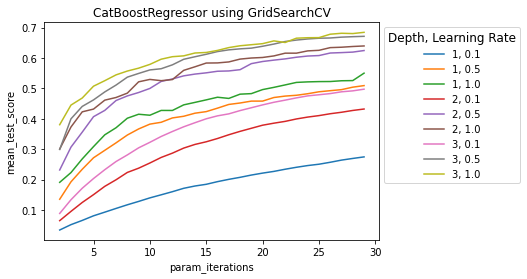

In [166]:
# Lets try to improve the graph using a pdSeries for the hue parameter
hue = cv_results[["param_depth", "param_learning_rate"]].apply(
    lambda row: f"{row.param_depth}, {row.param_learning_rate}", axis=1)

# Plotting the final data
sns.lineplot(data=cv_results, x="param_iterations", y="mean_test_score", 
             hue=hue).set(title='CatBoostRegressor using GridSearchCV')
plt.legend(bbox_to_anchor=(1, 1), title='Depth, Learning Rate', title_fontsize=12)

### XGBoost
-more info here: https://xgboost.readthedocs.io/en/stable/get_started.html

In [170]:
from xgboost import XGBRegressor

In [171]:
# Split data into X and y (features and labels)
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train["SalePrice"]
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val["SalePrice"]

In [172]:
# Building a simple CatBoostRefressor model to start
model = XGBRegressor()

# fit the model on train set
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [175]:
# make predictions on train set
train_preds = model.predict(X_train)

# make predictions on validation set
val_preds = model.predict(X_valid)

scores = {"Training MAE":   mean_absolute_error(y_train, train_preds),
          "Valid MAE":      mean_absolute_error(y_valid, val_preds),
          "Training RMSLE": rmsle(y_train, abs(train_preds)),
          "Valid RMSLE":    rmsle(y_valid, abs(val_preds)),
          "Training R^2":   r2_score(y_train, train_preds),
          "Valid R^2":      r2_score(y_valid, val_preds)}
scores

{'Training MAE': 4958.514079039855,
 'Valid MAE': 6449.994007628693,
 'Training RMSLE': 0.25023037451209423,
 'Valid RMSLE': 0.28093568034539407,
 'Training R^2': 0.8963543293163568,
 'Valid R^2': 0.8678745415617466}

In [212]:
bst = XGBRegressor(n_estimators=5, max_depth=6, learning_rate=1, objective='reg:squarederror')
bst.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='', learning_rate=1,
             max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
             max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=5, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [213]:
# make predictions on train set
train_preds = bst.predict(X_train)

# make predictions on validation set
val_preds = bst.predict(X_valid)

scores = {"Training MAE":   mean_absolute_error(y_train, train_preds),
          "Valid MAE":      mean_absolute_error(y_valid, val_preds),
          "Training RMSLE": rmsle(y_train, abs(train_preds)),
          "Valid RMSLE":    rmsle(y_valid, abs(val_preds)),
          "Training R^2":   r2_score(y_train, train_preds),
          "Valid R^2":      r2_score(y_valid, val_preds)}
scores

{'Training MAE': 7528.867839567161,
 'Valid MAE': 9063.60367657101,
 'Training RMSLE': 0.40869666516975944,
 'Valid RMSLE': 0.5223862821801536,
 'Training R^2': 0.7729159864339072,
 'Valid R^2': 0.7434965806133746}

### Tuning parameters of XGBoostRegressor using RandomizedSearchCV

In [180]:
# Different hyperparams for our CatBoostRegressor Model
xgboost_grid = {"n_estimators": np.arange(2, 30),
                "learning_rate": [0.1, 0.5, 1.0],
                "objective": ["binary:logistic", "binary:logitraw", "binary:hinge"],
                "max_depth": [2, 3, 4]}

# Setup grid hyperparams search for CatBoostRegressor
rs_xgboost = RandomizedSearchCV(XGBRegressor(),
                         param_distributions=xgboost_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparm search model
rs_xgboost.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\xgboost\core.py", line 575, in inner_f
    return f(**kwargs)
  File "c:\users\rebce\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py", line 972, 

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          n_estimators=100, n_jobs=None,
                                 

In [181]:
rs_xgboost.best_params_

{'objective': 'binary:hinge',
 'n_estimators': 17,
 'max_depth': 4,
 'learning_rate': 0.1}

In [183]:
rs_xgboost.best_score_

-1.8311450776242792

In [190]:
rs_xgboost.cv_results_

{'mean_fit_time': array([4.20189157, 6.31423779, 4.40656428, 5.20454307, 5.34551277,
        4.62203879, 7.20864725, 4.60046439, 4.61213307, 4.44942579]),
 'std_fit_time': array([0.49757319, 0.37131684, 0.23937164, 0.2071363 , 0.16827648,
        0.32128287, 0.42088434, 0.23292529, 0.31905472, 0.25121094]),
 'mean_score_time': array([0.        , 1.05369916, 0.        , 0.90089388, 1.04831009,
        0.        , 0.96381874, 0.        , 0.        , 0.        ]),
 'std_score_time': array([0.        , 0.06446154, 0.        , 0.08283071, 0.08902817,
        0.        , 0.06706846, 0.        , 0.        , 0.        ]),
 'param_objective': masked_array(data=['binary:logitraw', 'binary:hinge', 'binary:logistic',
                    'binary:hinge', 'binary:hinge', 'binary:logistic',
                    'binary:hinge', 'binary:logitraw', 'binary:logitraw',
                    'binary:logistic'],
              mask=[False, False, False, False, False, False, False, False,
                    Fals

In [185]:
# make predictions on train set
train_preds = rs_xgboost.predict(X_train)

# make predictions on validation set
val_preds = rs_xgboost.predict(X_valid)

scores = {"Training MAE":   mean_absolute_error(y_train, train_preds),
          "Valid MAE":      mean_absolute_error(y_valid, val_preds),
          "Training RMSLE": rmsle(y_train, (train_preds)),
          "Valid RMSLE":    rmsle(y_valid, (val_preds)),
          "Training R^2":   r2_score(y_train, train_preds),
          "Valid R^2":      r2_score(y_valid, val_preds)}
scores

{'Training MAE': 31098.71284761608,
 'Valid MAE': 35216.370016417524,
 'Training RMSLE': 9.43552689624018,
 'Valid RMSLE': 9.54105715904926,
 'Training R^2': -1.8223756065276477,
 'Valid R^2': -1.8055648937337057}

In [191]:
# Lets try to plot the results of the GridSearch using seaborn's lineplot
# Lets first transform the cv_results from GridSearchCV into DataFrame to better manipulation
cv_results = pd.DataFrame(rs_xgboost.cv_results_)

# Splits the dict contained in each params row into 3 other columns
# cv_results[["n_estimators",
#             "learning_rate",
#             "objective",
#             "max_depth"]] = cv_results.params.apply(pd.Series)

# # Drops the old params column
# cv_results = cv_results.drop('params', axis=1)
# cv_results

In [200]:
cv_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mean_fit_time        10 non-null     float64
 1   std_fit_time         10 non-null     float64
 2   mean_score_time      10 non-null     float64
 3   std_score_time       10 non-null     float64
 4   param_objective      10 non-null     object 
 5   param_n_estimators   10 non-null     object 
 6   param_max_depth      10 non-null     object 
 7   param_learning_rate  10 non-null     object 
 8   params               10 non-null     object 
 9   split0_test_score    4 non-null      float64
 10  split1_test_score    4 non-null      float64
 11  split2_test_score    4 non-null      float64
 12  split3_test_score    4 non-null      float64
 13  split4_test_score    4 non-null      float64
 14  mean_test_score      4 non-null      float64
 15  std_test_score       4 non-null      float6

(-1.832, -1.83)

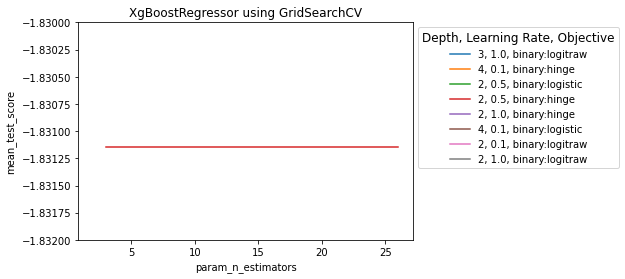

In [197]:
# Lets try to improve the graph using a pdSeries for the hue parameter
hue = cv_results[["param_max_depth", "param_learning_rate", "param_objective"]].apply(
    lambda row: f"{row.param_max_depth}, {row.param_learning_rate}, {row.param_objective}", axis=1)

# Plotting the final data
sns.lineplot(data=cv_results, x="param_n_estimators", y="mean_test_score", 
             hue=hue).set(title='XgBoostRegressor using GridSearchCV')
plt.legend(bbox_to_anchor=(1, 1), title='Depth, Learning Rate, Objective', title_fontsize=12)
plt.ylim(-1.832, -1.830)

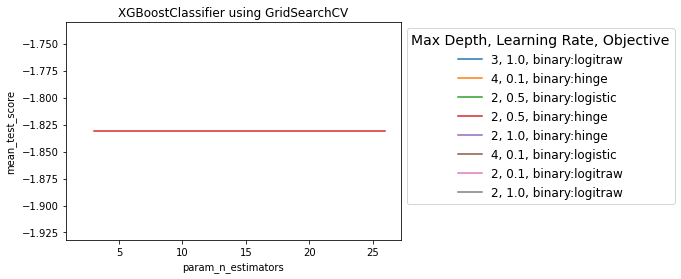

In [193]:
# Plotting the graph using a pdSeries for the hue parameter
hue = cv_results[["param_max_depth", "param_learning_rate", "param_objective"]].apply(
    lambda row: f"{row.param_max_depth}, {row.param_learning_rate}, {row.param_objective}", axis=1)

# Plotting the final data
sns.lineplot(data=cv_results, x="param_n_estimators", y="mean_test_score", 
             hue=hue).set(title='XGBoostClassifier using GridSearchCV')
plt.legend(bbox_to_anchor=(1, 1), 
           title='Max Depth, Learning Rate, Objective', 
           title_fontsize=14,
           fontsize=12)